In [1]:
%reset -f 
import ROOT
import numpy as np

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"
fname = "/volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005*"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

 auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec){

        // ivec = 0 --> Electron Corrections
        // ivec = 1 --> π+ Corrections
        // ivec = 2 --> π- Corrections (NOT UPDATED YET)
        // ivec = 3 --> Proton Corrections (NOT UPDATED YET)

        // Momentum Magnitude
        double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

        // Initializing the correction factor
        double dp = 0;

        // Defining Phi Angle
        double Phi = (180/3.1415926)*atan2(Py, Px);

        // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
        if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
            Phi += 360;
        }

        // Getting Local Phi Angle
        double PhiLocal = Phi - (sec - 1)*60;

        // Applying Shift Functions to Phi Angles (local shifted phi = phi)
        double phi = PhiLocal;

        // For Electron Shift
        if(ivec == 0){
            phi = PhiLocal - 30/pp;
        }

        // For π+ Pion/Proton Shift
        if(ivec == 1 || ivec == 3){
            phi = PhiLocal + (32/(pp-0.05));
        }

        // For π- Pion Shift
        if(ivec == 2){
            phi = PhiLocal - (32/(pp-0.05));
        }
        
        
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //==================================================================================================================================//
        //=======================//=======================//     Electron Corrections     //=======================//=======================//
        //==================================================================================================================================//
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

        if(ivec == 0){
            if(sec == 1){
                dp =     ((1.3189e-06)*phi*phi +  (4.26057e-05)*phi +  (-0.002322628))*pp*pp +  ((-1.1409e-05)*phi*phi +    (2.2188e-05)*phi + (0.02878927))*pp +   ((2.4950e-05)*phi*phi +   (1.6170e-06)*phi + (-0.061816275));
            }
            if(sec == 2){
                dp =    ((-2.9240e-07)*phi*phi +   (3.2448e-07)*phi +  (-0.001848308))*pp*pp +   ((4.4500e-07)*phi*phi +   (4.76324e-04)*phi + (0.02219469))*pp +   ((6.9220e-06)*phi*phi +  (-0.00153517)*phi + (-0.0479058));
            }
            if(sec == 3){
                dp =    ((2.71911e-06)*phi*phi + (1.657148e-05)*phi +  (-0.001822211))*pp*pp + ((-4.96814e-05)*phi*phi + (-3.761117e-04)*phi + (0.02564148))*pp +  ((1.97748e-04)*phi*phi +  (9.58259e-04)*phi + (-0.05818292));
            }
            if(sec == 4){
                dp =    ((1.90966e-06)*phi*phi +  (-2.4761e-05)*phi +   (-0.00231562))*pp*pp +  ((-2.3927e-05)*phi*phi +   (2.25262e-04)*phi +  (0.0291831))*pp +   ((8.0515e-05)*phi*phi + (-6.42098e-04)*phi + (-0.06159197));
            }
            if(sec == 5){
                dp = ((-3.6760323e-06)*phi*phi +  (4.04398e-05)*phi + (-0.0021967515))*pp*pp +  ((4.90857e-05)*phi*phi +  (-4.37437e-04)*phi + (0.02494339))*pp + ((-1.08257e-04)*phi*phi +   (0.00146111)*phi + (-0.0648485));
            }
            if(sec == 6){
                dp =    ((-6.2488e-08)*phi*phi +  (2.23173e-05)*phi +   (-0.00227522))*pp*pp +   ((1.8372e-05)*phi*phi +   (-7.5227e-05)*phi +   (0.032636))*pp +  ((-6.6566e-05)*phi*phi +  (-2.4450e-04)*phi + (-0.072293));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //======================//======================//     Electron Corrections (End)     //======================//======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        


        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//     π+ Corrections     //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        if(ivec == 1){
            if(sec == 1){
                dp =   ((-1.7334e-06)*phi*phi +  (1.45112e-05)*phi +  (0.00150721))*pp*pp +    ((6.6234e-06)*phi*phi + (-4.81191e-04)*phi +  (-0.0138695))*pp + ((-3.23625e-06)*phi*phi +   (2.79751e-04)*phi + (0.027726));
            }
            if(sec == 2){
                dp = ((-4.475464e-06)*phi*phi + (-4.11573e-05)*phi +  (0.00204557))*pp*pp +  ((2.468278e-05)*phi*phi +   (9.3590e-05)*phi +   (-0.015399))*pp + ((-1.61547e-05)*phi*phi +   (-2.4206e-04)*phi + (0.0231743));
            }
            if(sec == 3){
                dp =   ((-8.0374e-07)*phi*phi +   (2.8728e-06)*phi +  (0.00152163))*pp*pp +    ((5.1347e-06)*phi*phi +  (3.71709e-04)*phi +  (-0.0165735))*pp +   ((4.0105e-06)*phi*phi + (-5.289869e-04)*phi + (0.02175395));
            }
            if(sec == 4){
                dp =   ((-3.8790e-07)*phi*phi + (-4.78445e-05)*phi + (0.002324725))*pp*pp +   ((6.80543e-06)*phi*phi +  (5.69358e-04)*phi +  (-0.0199162))*pp + ((-1.30264e-05)*phi*phi +  (-5.91606e-04)*phi + (0.03202088));
            }
            if(sec == 5){
                dp =  ((2.198518e-06)*phi*phi + (-1.52535e-05)*phi + (0.001187761))*pp*pp + ((-1.000264e-05)*phi*phi +  (1.63976e-04)*phi + (-0.01429673))*pp +   ((9.4962e-06)*phi*phi +  (-3.86691e-04)*phi + (0.0303695));
            }
            if(sec == 6){
                dp =  ((-3.92944e-07)*phi*phi +  (1.45848e-05)*phi +  (0.00120668))*pp*pp +    ((3.7899e-06)*phi*phi + (-1.98219e-04)*phi +  (-0.0131312))*pp +  ((-3.9961e-06)*phi*phi +  (-1.32883e-04)*phi + (0.0294497));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//  π+ Corrections (End)  //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        



        return dp/pp;
    };
auto fe = dppC(ex, ey, ez, esec, 0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

            
    



    
    
    



double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
    pimPh = pim.Phi()*TMath::RadToDeg()+360;
}


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));







auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);

auto dp = pimP1- pim.P();

if(abs(pimP1 - pim.P()) > abs(pimP2 - pim.P())){
    dp = pimP2- pim.P();
}

if(abs(pimP1 - pim.P()) < abs(pimP2 - pim.P())){
    dp =pimP1 - pim.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pim;



std::vector<double> vals = {ePipPimXC.M()};
return vals;
""")
rdf = rdf.Define("MM","vals[0]")

MM = []

def fit1d(h1,num):
    mx = h1.GetBinCenter(h1.GetMaximumBin())
    fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.55,mx+0.55)
    fy.SetParameters(1,0.9387,0.014,1)
    fy.SetParLimits(0,0,1e7)
    fy.SetParLimits(1,0.9387-0.05,0.9387+0.05)
    #fy.SetParLimits(2,0.01,0.03)
    h1.Fit(fy,"QR")
    mu,sig = fy.GetParameter(1),fy.GetParameter(2)
    fy.SetRange(mu-3*sig, mu+3*sig)
    print("MMsec",num, " = rdf.Filter(\"MM > ",mu-3*sig, "&& MM < ",mu+3*sig,"\")")
    h1.Fit(fy,"QR")
    print("Hi")

d1 = rdf.Filter("pimsec == 1")
MM.append(d1.Histo1D(("hmrho","Missing Mass Sec1; MM",200,0,2), "MM"))

d2 = rdf.Filter("pimsec == 2")
MM.append(d2.Histo1D(("hmrho","Missing Mass Sec2; MM",200,0,2), "MM"))

d3 = rdf.Filter("pimsec == 3")
MM.append(d3.Histo1D(("hmrho","Missing Mass Sec3; MM",200,0,2), "MM"))

d4 = rdf.Filter("pimsec == 4")
MM.append(d4.Histo1D(("hmrho","Missing Mass Sec4; MM",200,0,2), "MM"))

d5 = rdf.Filter("pimsec == 5")
MM.append(d5.Histo1D(("hmrho","Missing Mass Sec5; MM",200,0,2), "MM"))

d6 = rdf.Filter("pimsec == 6")
MM.append(d6.Histo1D(("hmrho","Missing Mass Sec6; MM",200,0,2), "MM"))

count = 1
for i in MM:
    fit1d(i,count)
    count += 1

Welcome to JupyROOT 6.22/06
MMsec 1  = rdf.Filter("MM >  0.8971910773335176 && MM <  0.9802089226664824 ")
Hi
MMsec 2  = rdf.Filter("MM >  0.8966999999999999 && MM <  0.9807 ")
Hi
MMsec 3  = rdf.Filter("MM >  0.8970948449577862 && MM <  0.9803051550422137 ")
Hi
MMsec 4  = rdf.Filter("MM >  0.8966999999999999 && MM <  0.9807 ")
Hi
MMsec 5  = rdf.Filter("MM >  0.8158307822550322 && MM <  1.0966637178590821 ")
Hi
MMsec 6  = rdf.Filter("MM >  0.8966999999999999 && MM <  0.9807 ")
Hi


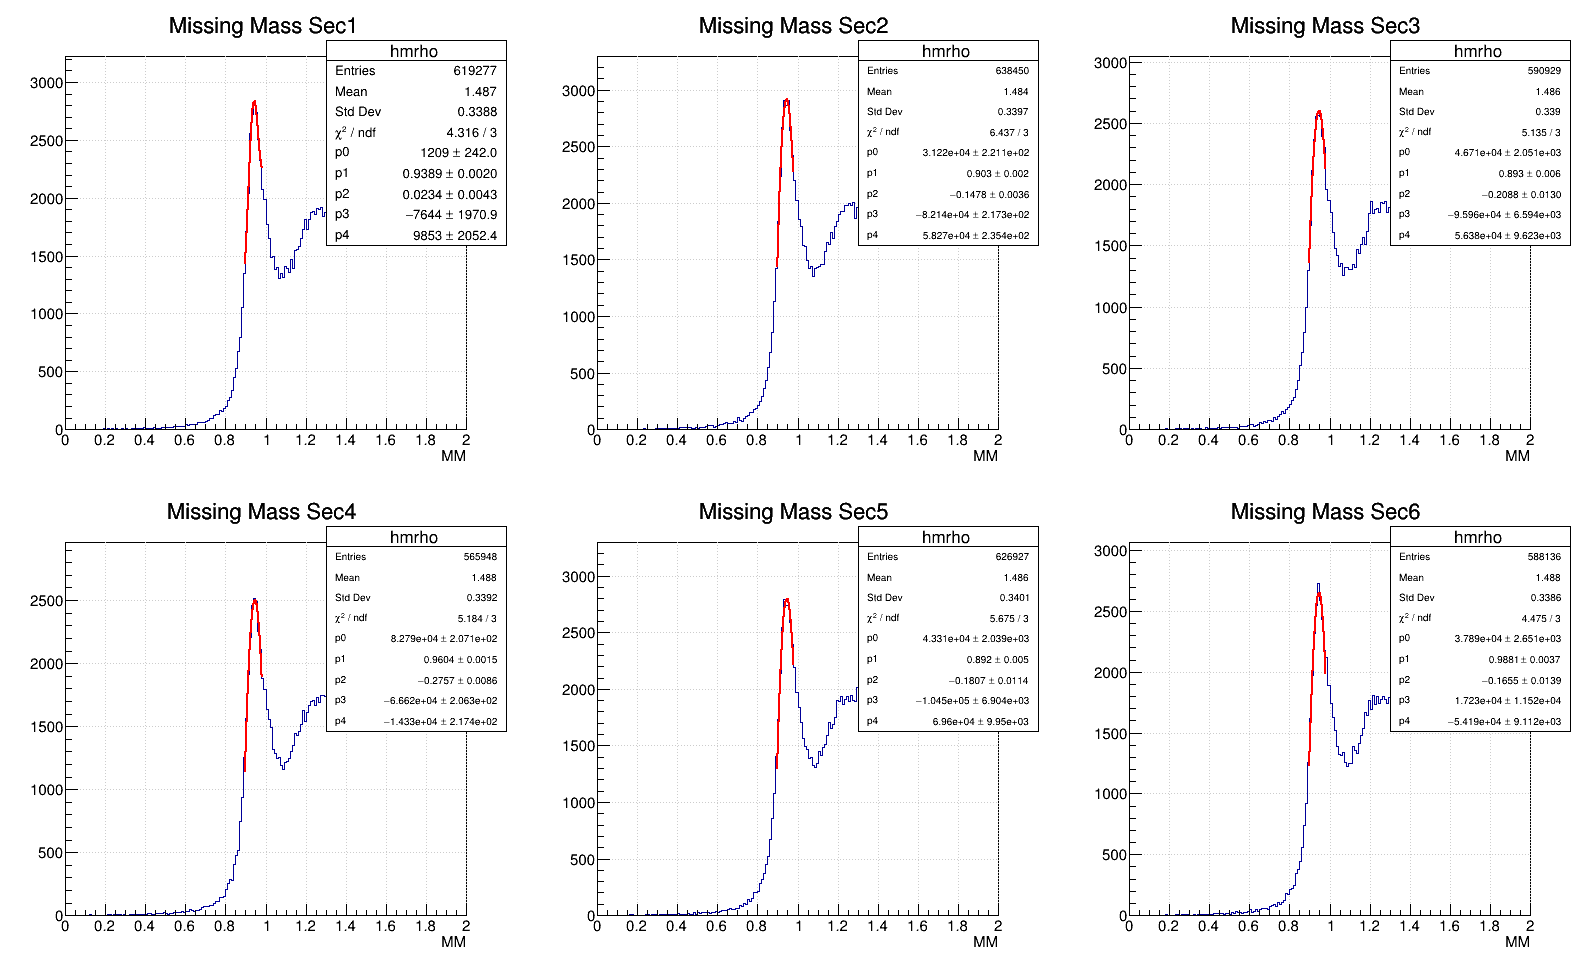

In [2]:

c1 = ROOT.TCanvas("c1","c1", 1600,1000)
c1.Divide(3,2,.01,0.01)
c1.Draw()

for i in range(0,6):
    c1.cd(i+1)
    MM[i].Draw()
#c1.cd(1)
#MMsec1.Draw()

# $\Delta$P

In [2]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"
fname = "/volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005*"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

 auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec){

        // ivec = 0 --> Electron Corrections
        // ivec = 1 --> π+ Corrections
        // ivec = 2 --> π- Corrections (NOT UPDATED YET)
        // ivec = 3 --> Proton Corrections (NOT UPDATED YET)

        // Momentum Magnitude
        double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

        // Initializing the correction factor
        double dp = 0;

        // Defining Phi Angle
        double Phi = (180/3.1415926)*atan2(Py, Px);

        // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
        if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
            Phi += 360;
        }

        // Getting Local Phi Angle
        double PhiLocal = Phi - (sec - 1)*60;

        // Applying Shift Functions to Phi Angles (local shifted phi = phi)
        double phi = PhiLocal;

        // For Electron Shift
        if(ivec == 0){
            phi = PhiLocal - 30/pp;
        }

        // For π+ Pion/Proton Shift
        if(ivec == 1 || ivec == 3){
            phi = PhiLocal + (32/(pp-0.05));
        }

        // For π- Pion Shift
        if(ivec == 2){
            phi = PhiLocal - (32/(pp-0.05));
        }
        
        
          
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //==================================================================================================================================//
        //=======================//=======================//     Electron Corrections     //=======================//=======================//
        //==================================================================================================================================//
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

        if(ivec == 0){
            if(sec == 1){
                dp =     ((1.3189e-06)*phi*phi +  (4.26057e-05)*phi +  (-0.002322628))*pp*pp +  ((-1.1409e-05)*phi*phi +    (2.2188e-05)*phi + (0.02878927))*pp +   ((2.4950e-05)*phi*phi +   (1.6170e-06)*phi + (-0.061816275));
            }
            if(sec == 2){
                dp =    ((-2.9240e-07)*phi*phi +   (3.2448e-07)*phi +  (-0.001848308))*pp*pp +   ((4.4500e-07)*phi*phi +   (4.76324e-04)*phi + (0.02219469))*pp +   ((6.9220e-06)*phi*phi +  (-0.00153517)*phi + (-0.0479058));
            }
            if(sec == 3){
                dp =    ((2.71911e-06)*phi*phi + (1.657148e-05)*phi +  (-0.001822211))*pp*pp + ((-4.96814e-05)*phi*phi + (-3.761117e-04)*phi + (0.02564148))*pp +  ((1.97748e-04)*phi*phi +  (9.58259e-04)*phi + (-0.05818292));
            }
            if(sec == 4){
                dp =    ((1.90966e-06)*phi*phi +  (-2.4761e-05)*phi +   (-0.00231562))*pp*pp +  ((-2.3927e-05)*phi*phi +   (2.25262e-04)*phi +  (0.0291831))*pp +   ((8.0515e-05)*phi*phi + (-6.42098e-04)*phi + (-0.06159197));
            }
            if(sec == 5){
                dp = ((-3.6760323e-06)*phi*phi +  (4.04398e-05)*phi + (-0.0021967515))*pp*pp +  ((4.90857e-05)*phi*phi +  (-4.37437e-04)*phi + (0.02494339))*pp + ((-1.08257e-04)*phi*phi +   (0.00146111)*phi + (-0.0648485));
            }
            if(sec == 6){
                dp =    ((-6.2488e-08)*phi*phi +  (2.23173e-05)*phi +   (-0.00227522))*pp*pp +   ((1.8372e-05)*phi*phi +   (-7.5227e-05)*phi +   (0.032636))*pp +  ((-6.6566e-05)*phi*phi +  (-2.4450e-04)*phi + (-0.072293));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //======================//======================//     Electron Corrections (End)     //======================//======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        


        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//     π+ Corrections     //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        if(ivec == 1){
            if(sec == 1){
                dp =   ((-1.7334e-06)*phi*phi +  (1.45112e-05)*phi +  (0.00150721))*pp*pp +    ((6.6234e-06)*phi*phi + (-4.81191e-04)*phi +  (-0.0138695))*pp + ((-3.23625e-06)*phi*phi +   (2.79751e-04)*phi + (0.027726));
            }
            if(sec == 2){
                dp = ((-4.475464e-06)*phi*phi + (-4.11573e-05)*phi +  (0.00204557))*pp*pp +  ((2.468278e-05)*phi*phi +   (9.3590e-05)*phi +   (-0.015399))*pp + ((-1.61547e-05)*phi*phi +   (-2.4206e-04)*phi + (0.0231743));
            }
            if(sec == 3){
                dp =   ((-8.0374e-07)*phi*phi +   (2.8728e-06)*phi +  (0.00152163))*pp*pp +    ((5.1347e-06)*phi*phi +  (3.71709e-04)*phi +  (-0.0165735))*pp +   ((4.0105e-06)*phi*phi + (-5.289869e-04)*phi + (0.02175395));
            }
            if(sec == 4){
                dp =   ((-3.8790e-07)*phi*phi + (-4.78445e-05)*phi + (0.002324725))*pp*pp +   ((6.80543e-06)*phi*phi +  (5.69358e-04)*phi +  (-0.0199162))*pp + ((-1.30264e-05)*phi*phi +  (-5.91606e-04)*phi + (0.03202088));
            }
            if(sec == 5){
                dp =  ((2.198518e-06)*phi*phi + (-1.52535e-05)*phi + (0.001187761))*pp*pp + ((-1.000264e-05)*phi*phi +  (1.63976e-04)*phi + (-0.01429673))*pp +   ((9.4962e-06)*phi*phi +  (-3.86691e-04)*phi + (0.0303695));
            }
            if(sec == 6){
                dp =  ((-3.92944e-07)*phi*phi +  (1.45848e-05)*phi +  (0.00120668))*pp*pp +    ((3.7899e-06)*phi*phi + (-1.98219e-04)*phi +  (-0.0131312))*pp +  ((-3.9961e-06)*phi*phi +  (-1.32883e-04)*phi + (0.0294497));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//  π+ Corrections (End)  //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        



        return dp/pp;
    };
auto fe = dppC(ex, ey, ez, esec, 0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

            
    



    
    
    



double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
    pimPh = pim.Phi()*TMath::RadToDeg()+360;
}


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));







auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pim);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pim);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pim);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);

auto dp = pimP1- pim.P();

if(abs(pimP1 - pim.P()) > abs(pimP2 - pim.P())){
    dp = pimP2- pim.P();
}

if(abs(pimP1 - pim.P()) < abs(pimP2 - pim.P())){
    dp =pimP1 - pim.P();
    
} 



auto ePipPimX = beam + targ - eleC - pipC - pim;



std::vector<double> vals = {dp,pim.P(),pimPhi,ePipPimX.M()};
return vals;
""")


rdf = rdf.Define("pimP","vals[1]")
rdf = rdf.Define("dp","vals[0]")
rdf = rdf.Define("pimphi","vals[2]")
rdf = rdf.Define("MM","vals[3]")



def fit2d(h2,sec,bins):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,3.5,0.5), numpy.arange(3.5, 4.5, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.5,mx+0.5)
        fy.SetParLimits(2,0.005,0.1)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, 0.03) 
       # gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","pol2(0)",0.5,4)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    if bins == 1:
        fdp.SetLineColor(2)
    elif bins ==2:
        fdp.SetLineColor(1)
    else:
         fdp.SetLineColor(3)
    gr.Fit(fdp, "QR")
    


    
MMsec1  = rdf.Filter("MM >  0.85 && MM <  1.05")
MMsec2  = rdf.Filter("MM >  0.85 && MM <  1.05 ")
MMsec3  = rdf.Filter("MM >  0.85 && MM <  1.05 ")
MMsec4  = rdf.Filter("MM >  0.85 && MM <  1.05 ")
MMsec5  = rdf.Filter("MM >  0.85 && MM <  1.05 ")
MMsec6  = rdf.Filter("MM >  0.85 && MM <  1.05 ")
    
nbins = 250#350
d11 = MMsec1.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = MMsec1.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = MMsec1.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = MMsec2.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = MMsec2.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = MMsec2.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = MMsec3.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = MMsec3.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = MMsec3.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = MMsec4.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = MMsec4.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = MMsec4.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = MMsec5.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = MMsec5.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = MMsec5.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = MMsec6.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = MMsec6.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = MMsec6.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

fit2d(dpp11,1,1)
fit2d(dpp12,1,2)
fit2d(dpp13,1,3)

fit2d(dpp21,2,1)
fit2d(dpp22,2,2)
fit2d(dpp23,2,3)


fit2d(dpp31,3,1)
fit2d(dpp32,3,2)
fit2d(dpp33,3,3)

fit2d(dpp41,4,1)
fit2d(dpp42,4,2)
fit2d(dpp43,4,3)


fit2d(dpp51,5,1)
fit2d(dpp52,5,2)
fit2d(dpp53,5,3)

fit2d(dpp61,6,1)
fit2d(dpp62,6,2)
fit2d(dpp63,6,3)



Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005440.evio.00150-00154.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005441.evio.00570-00574.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005442.evio.00075-00079.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005443.evio.00110-00114.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005444.evio.00330-00334.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/cl

In [3]:
#603 406
rdf.Count()
print(rdf.Count().GetValue())

130421


In [27]:
print(len(dpp12.hys))

7


IndexError: list index out of range

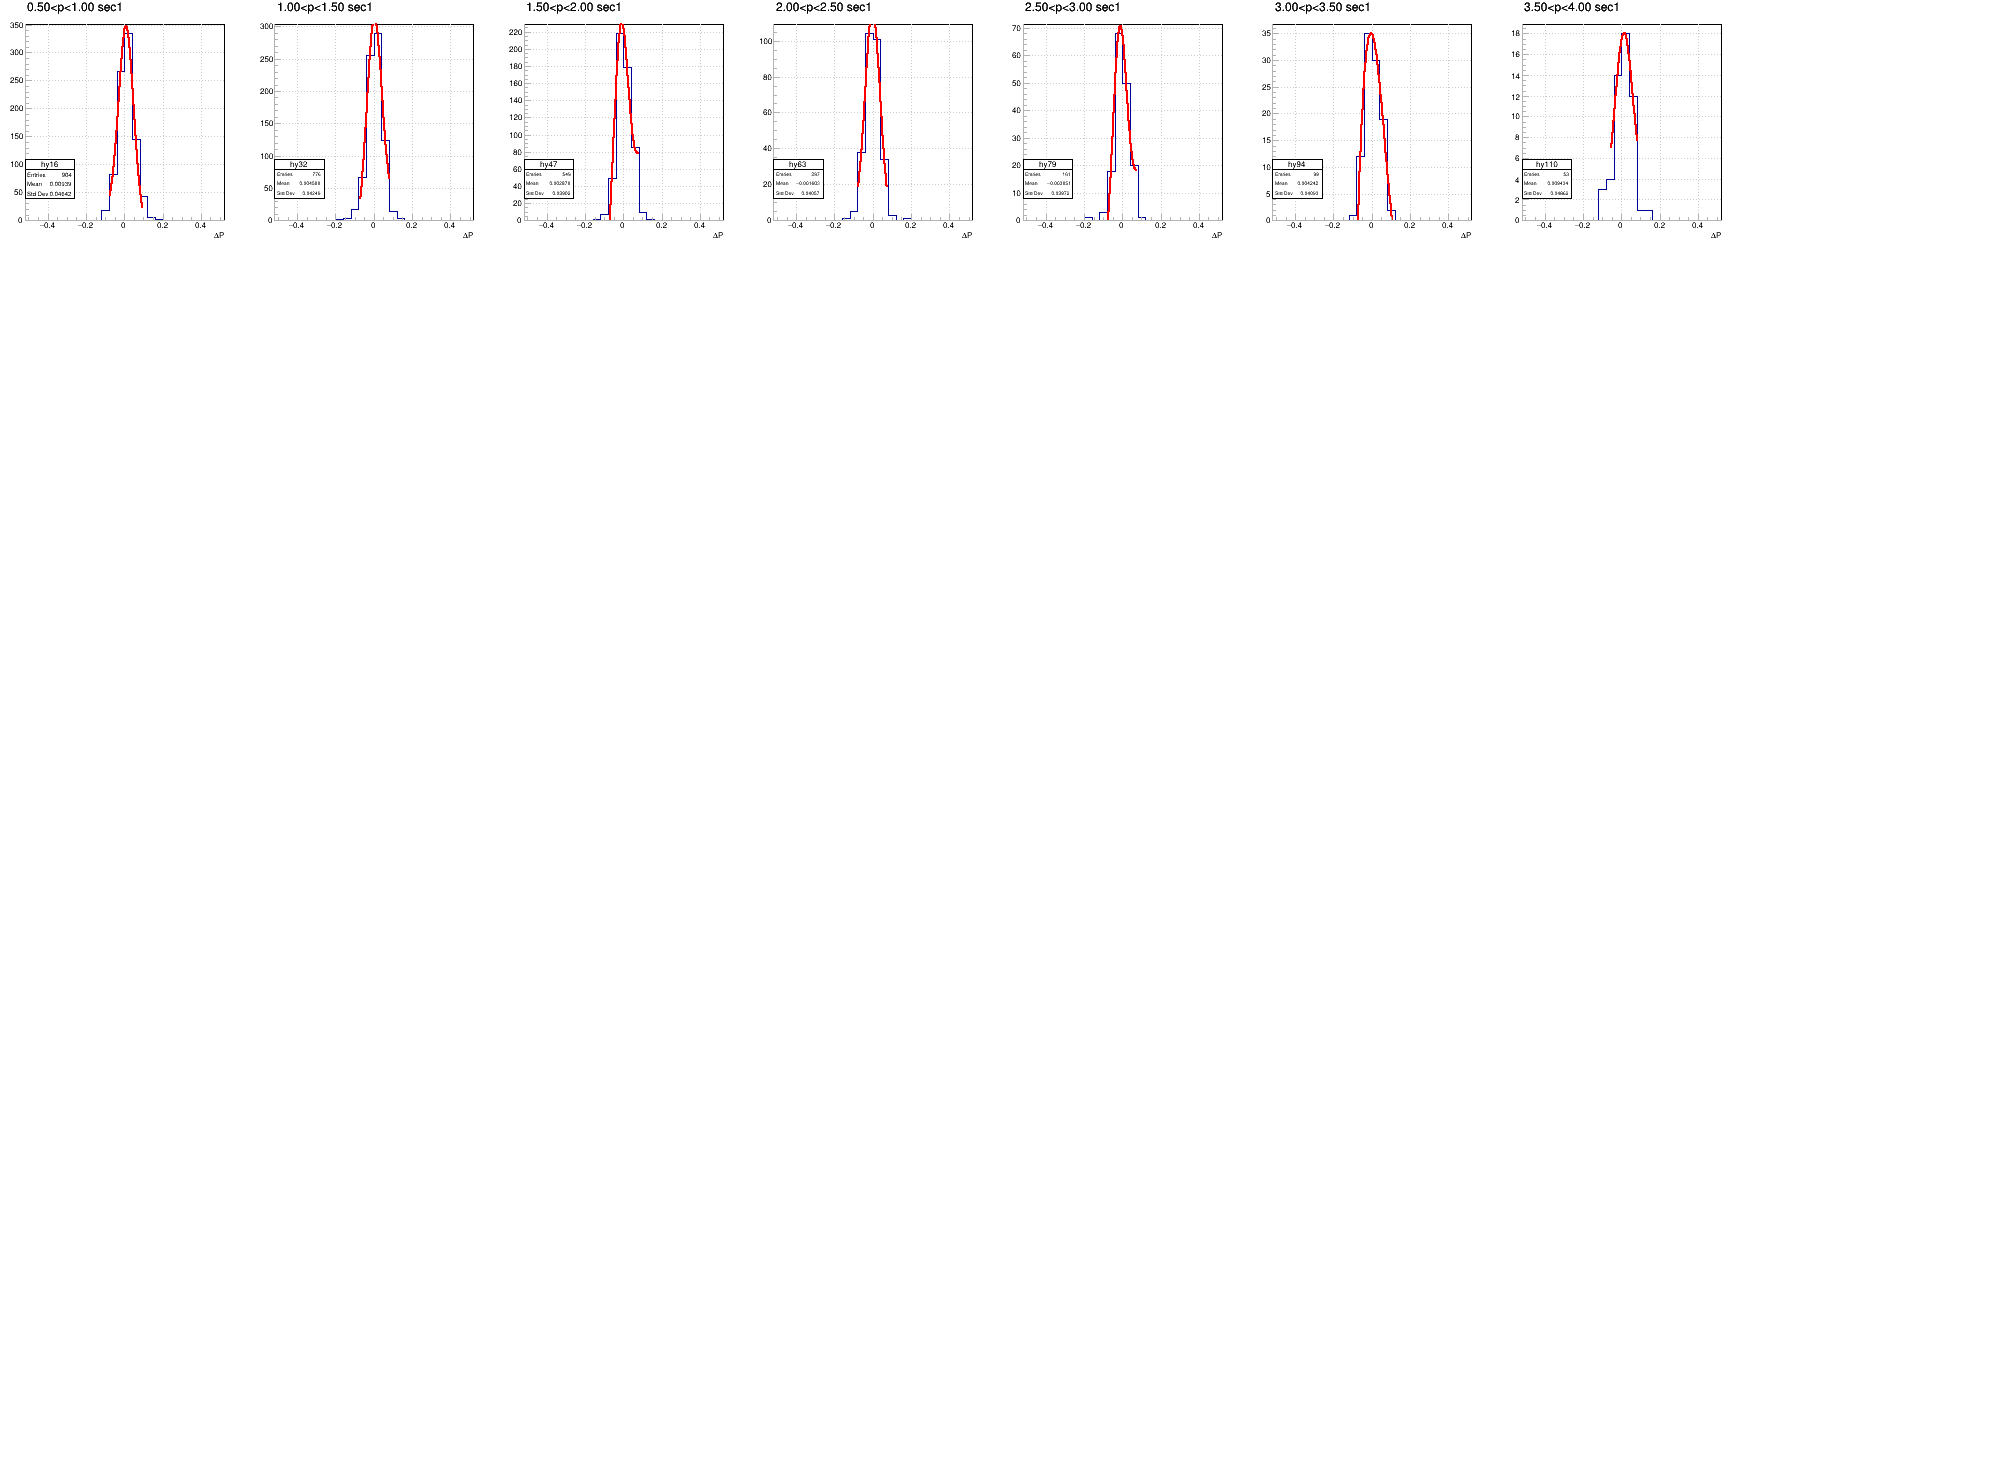

In [19]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp11.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp11.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp21.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp21.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp31.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp31.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp41.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp41.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp51.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp51.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp61.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp61.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

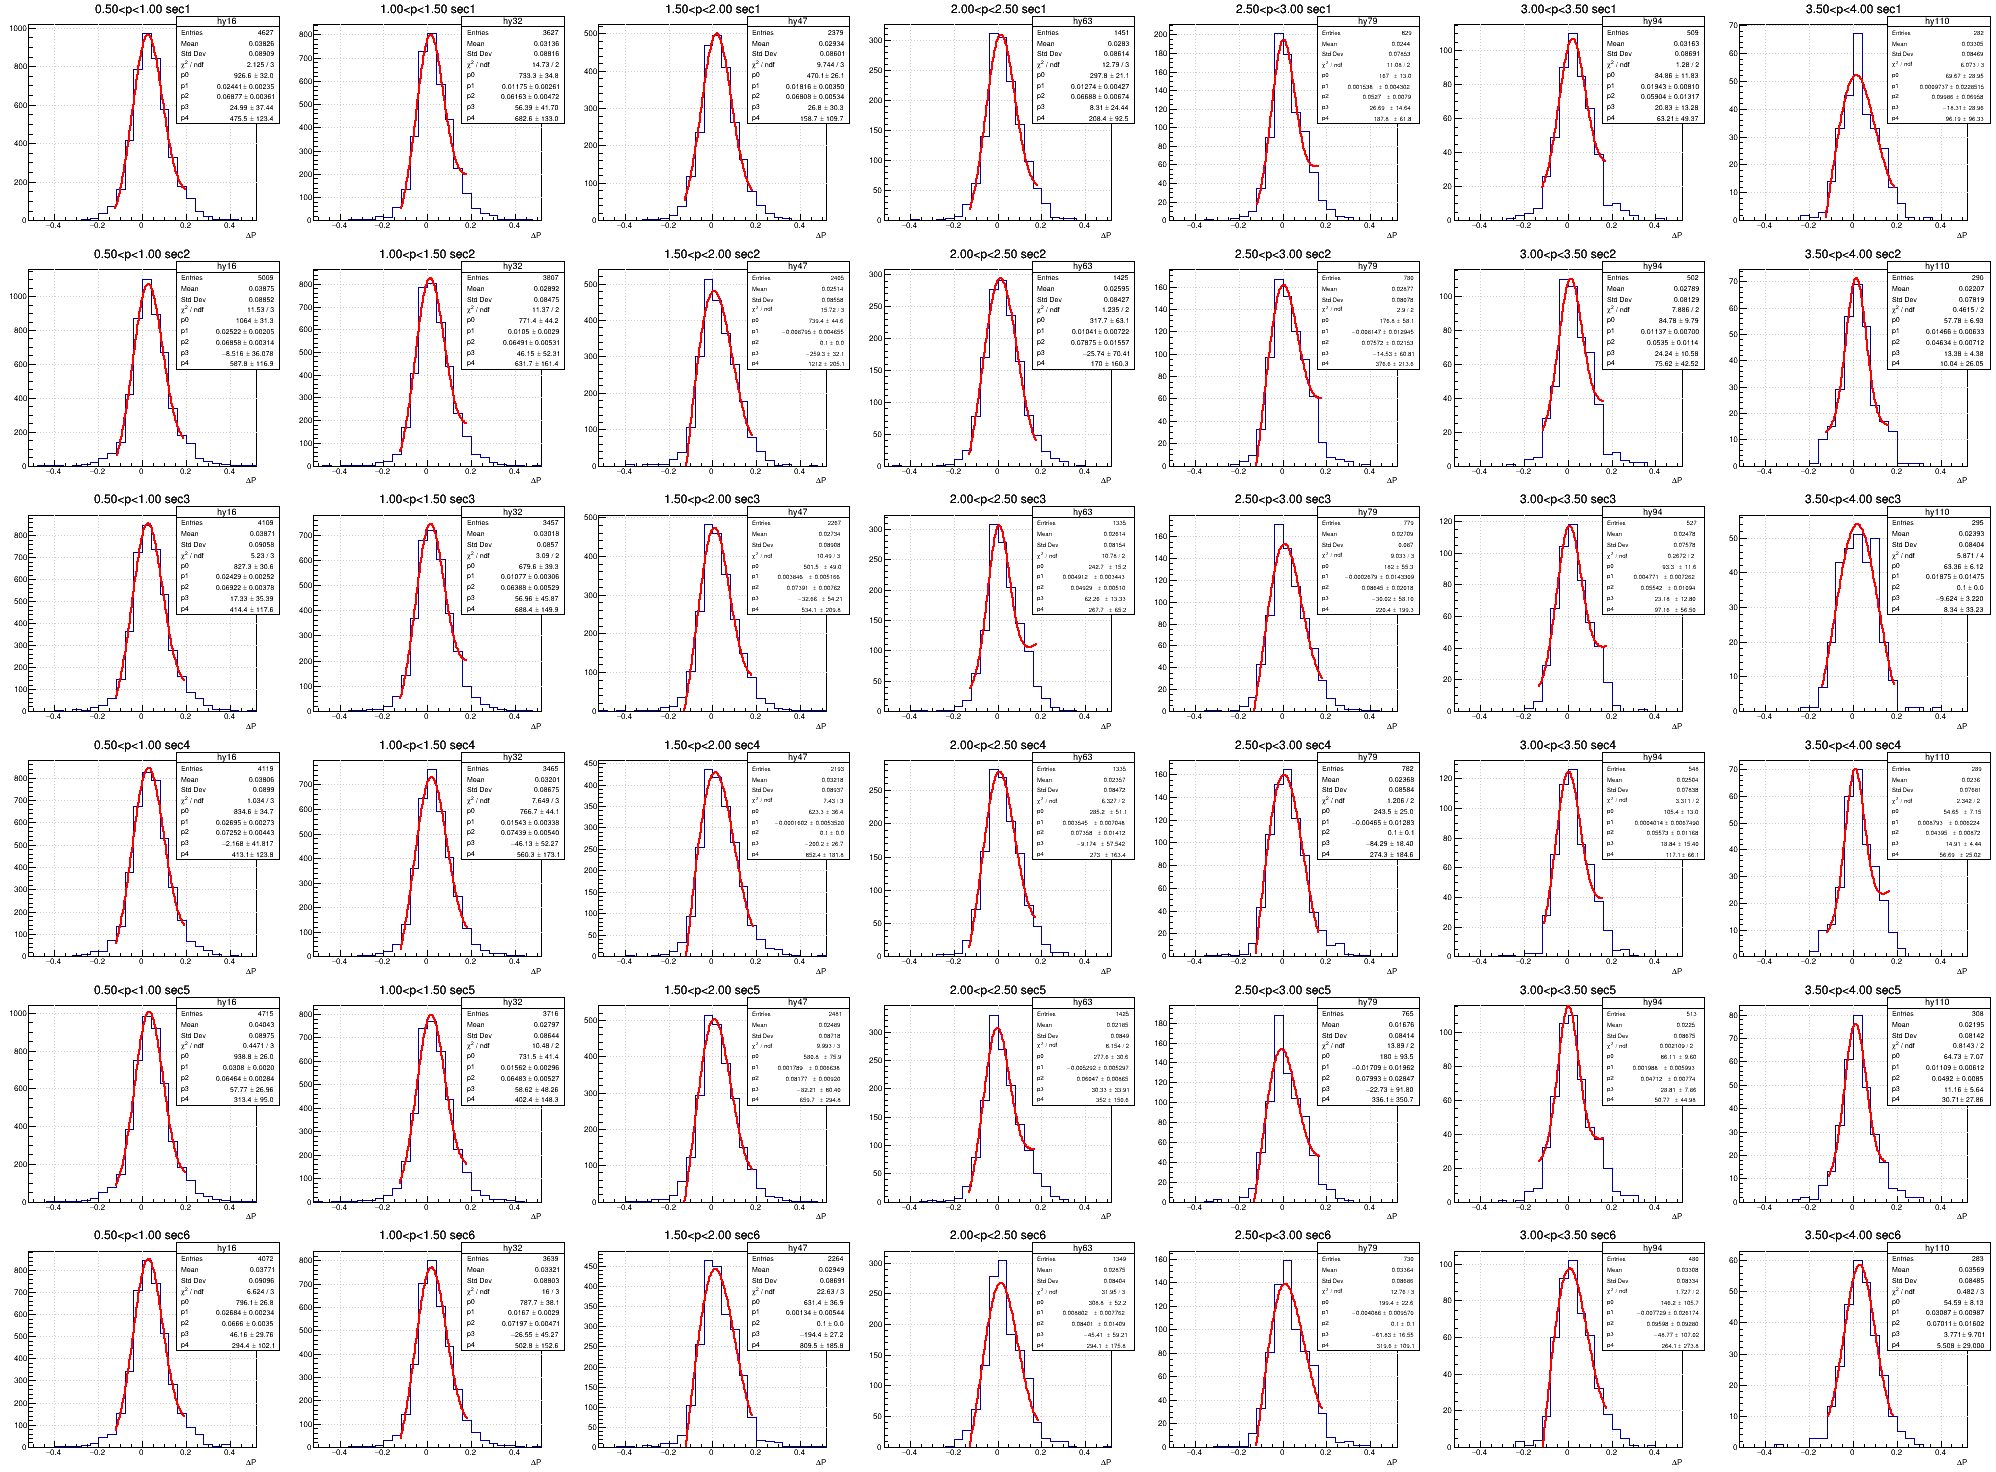

In [4]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(7,6,0.0001,0.0001)
c2.Draw()


for i in range(7):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp12.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp12.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7+1)
    dpp22.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp22.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*2+1)
    dpp32.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp32.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*3+1)
    dpp42.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp42.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*4+1)
    dpp52.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp52.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*5+1)
    dpp62.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp62.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

In [ ]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(7,6,0.0001,0.0001)
c2.Draw()


for i in range(7):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp13.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp13.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7+1)
    dpp23.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp23.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*2+1)
    dpp33.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp33.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*3+1)
    dpp43.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp43.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*4+1)
    dpp53.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp53.hys[i].Draw()   
for i in range(7):
    c2.cd(i+7*5+1)
    dpp63.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp63.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_New.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_1.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_1.png


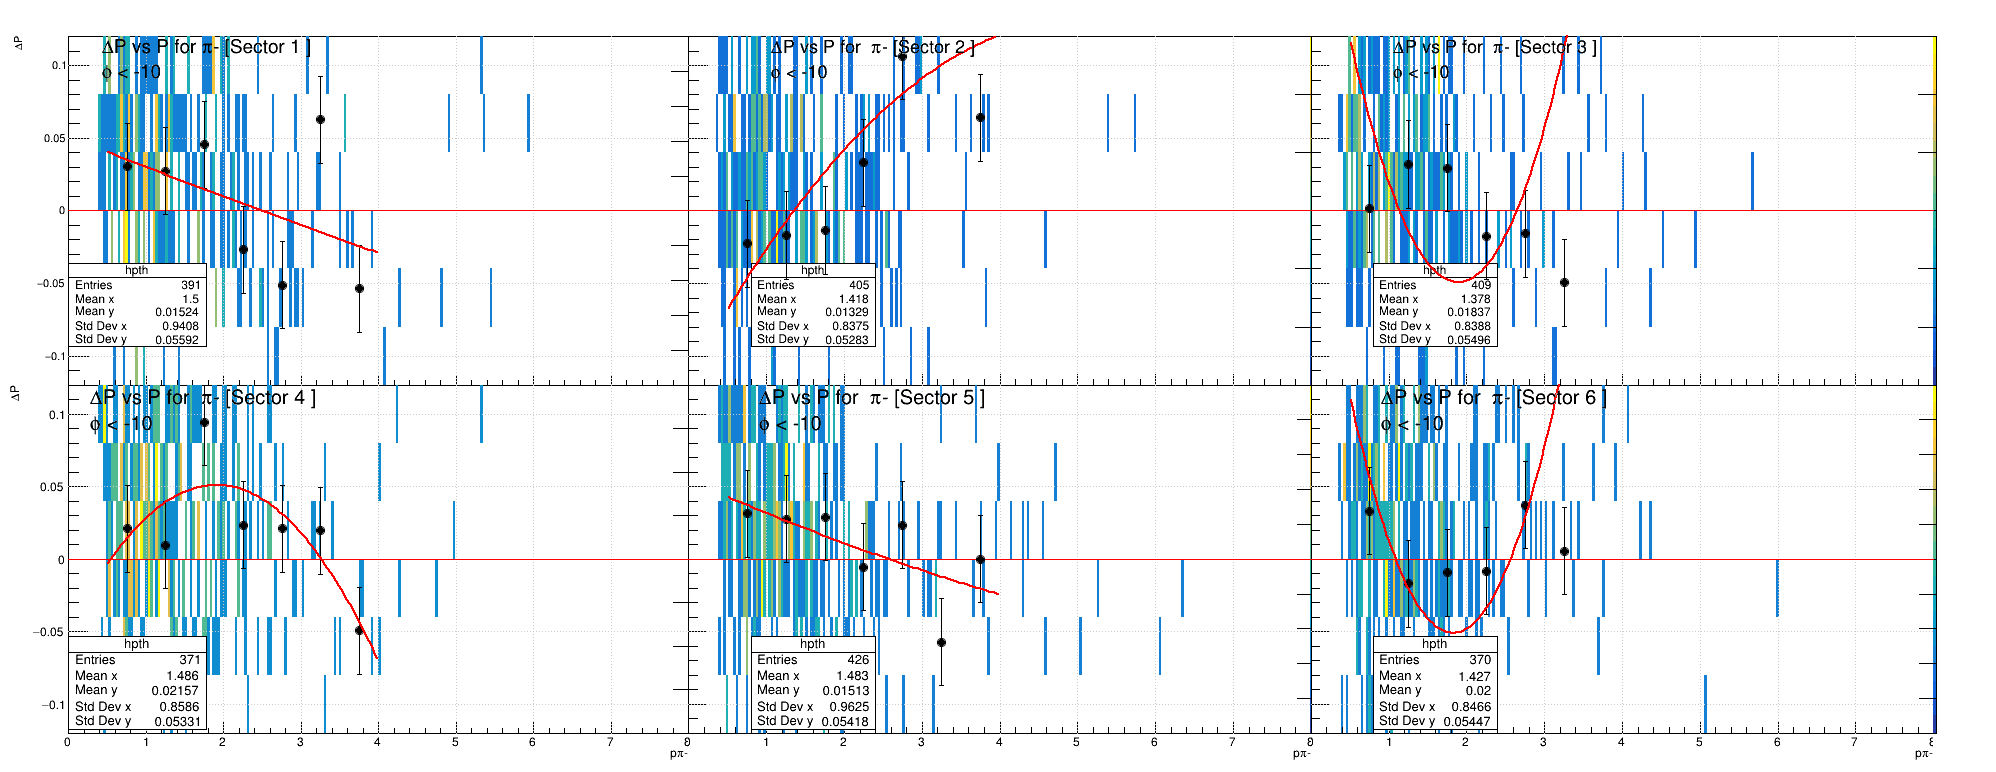

In [4]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.1,0.1)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_2.png


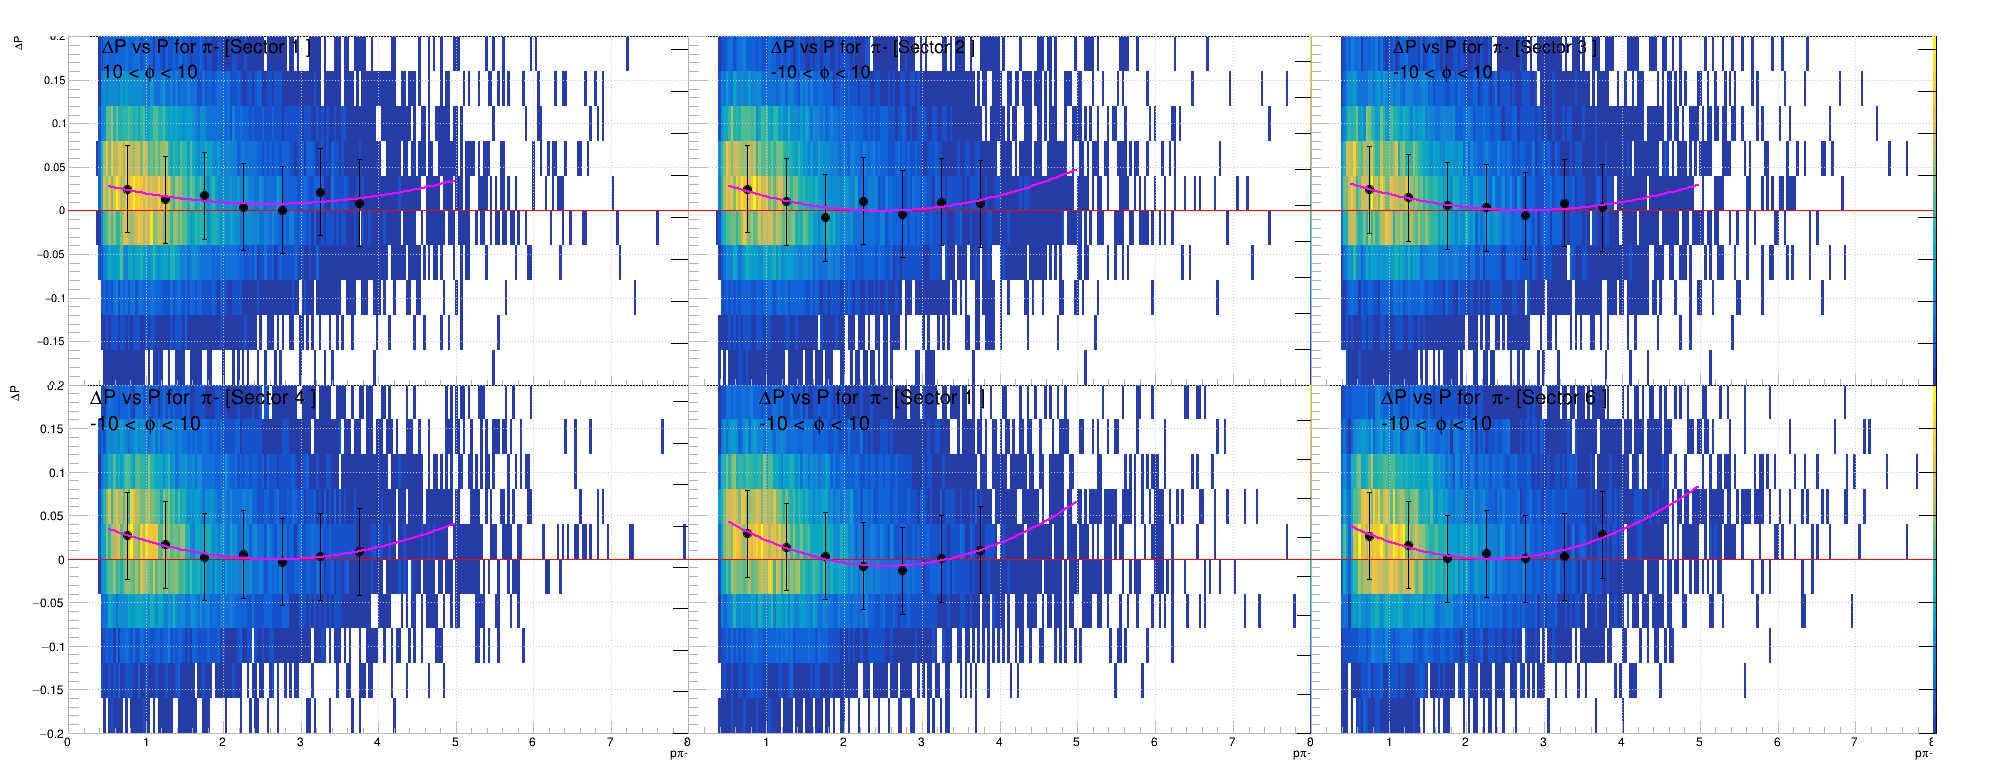

In [16]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_3.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_3.png


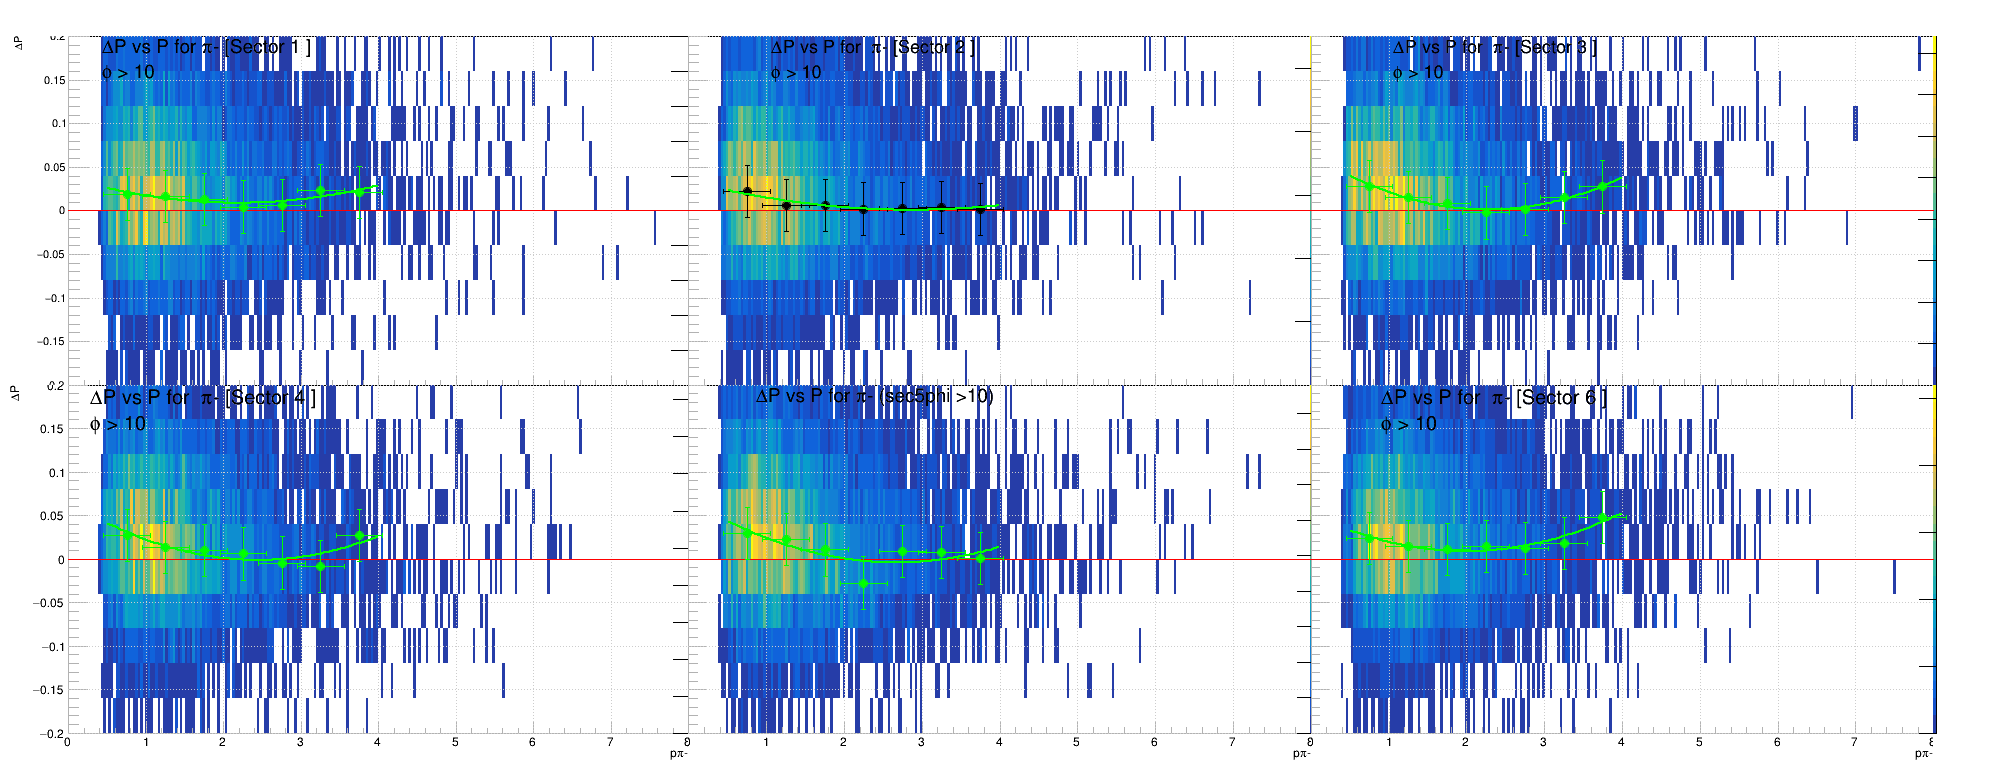

In [22]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp13.Draw("colz")
dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp13.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp23.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp23.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp33.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp33.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp43.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp43.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp53.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp53.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp63.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp63.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.Print("pics/Cont_phi/phi_dp2d_3.png")



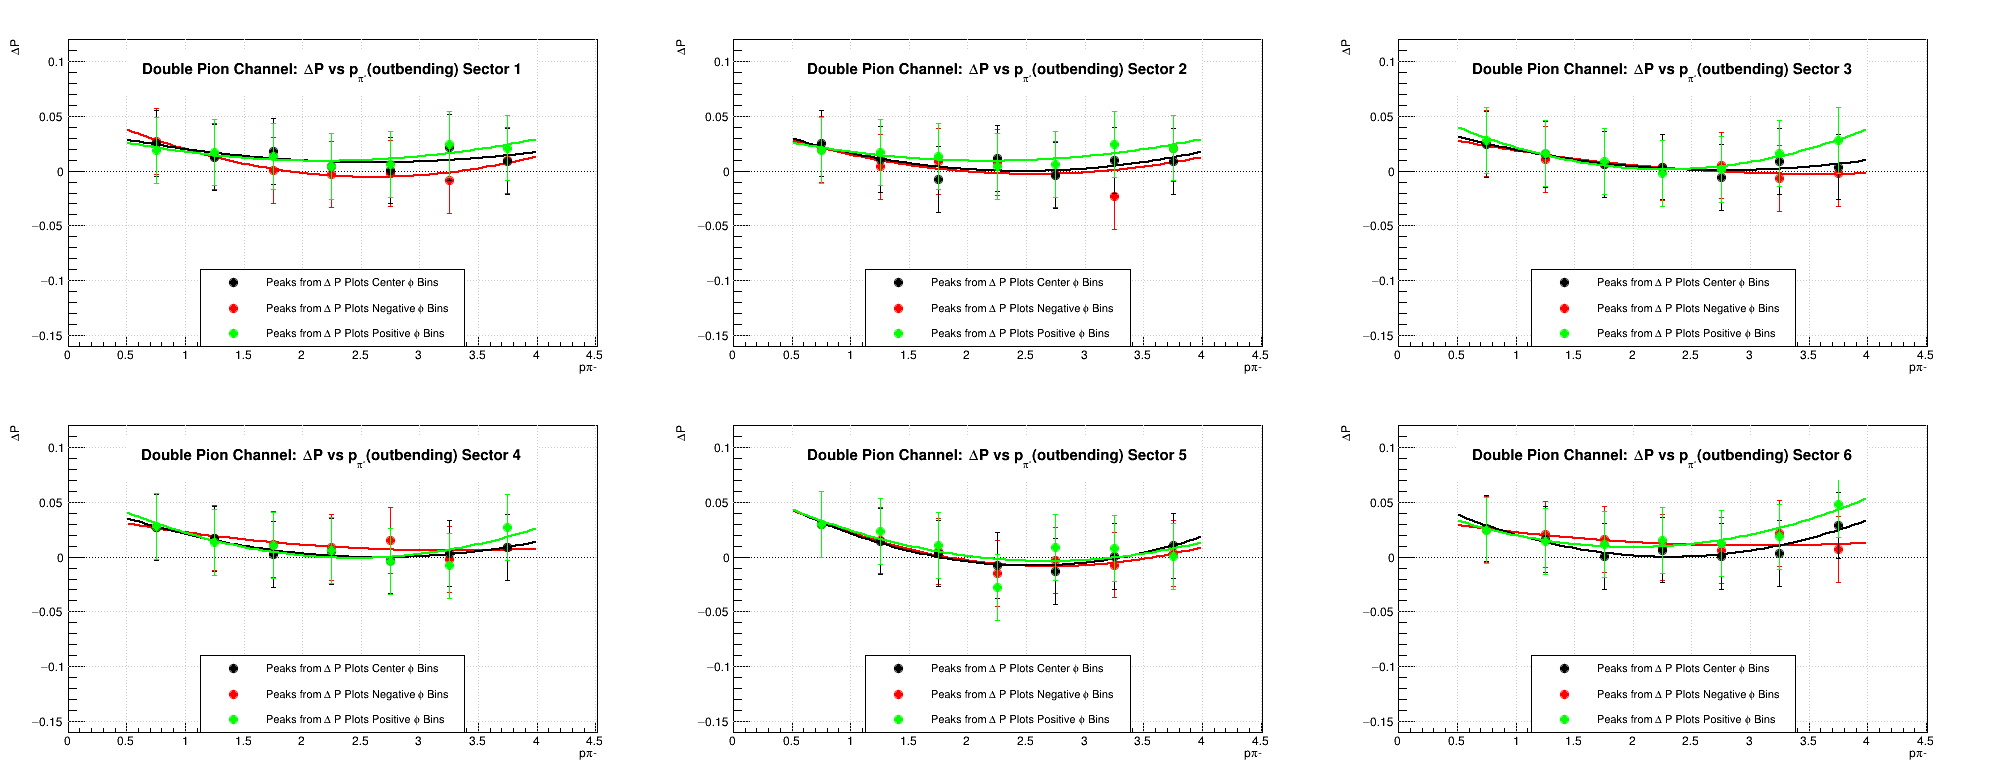

In [2]:
line =  ROOT.TLine(0, 0, 4.5, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.001,0.001)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)

legend = ROOT.TLegend(0.3, 0.3, 0.7, 0.1)
legend.SetNColumns(1)
legend.AddEntry(dpp12.gr,"Peaks from #Delta P Plots Center #phi Bins","P")
legend.AddEntry(dpp11.gr,"Peaks from #Delta P Plots Negative #phi Bins","P")
legend.AddEntry(dpp13.gr,"Peaks from #Delta P Plots Positive #phi Bins","P")


c1.Draw()
c1.cd(1)
dpp11.Draw("axis")
dpp11.GetYaxis().SetRangeUser(-0.15,0.1)
dpp11.GetXaxis().SetRangeUser(0,4.5)
dpp11.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")

dpp11.gr.SetMarkerStyle(8)
dpp12.gr.SetMarkerStyle(8)
dpp13.gr.SetMarkerStyle(8)


dpp11.gr.SetMarkerColor(2)
dpp11.gr.SetLineColor(2)
dpp11.gr.Draw("P")

dpp12.gr.SetMarkerColor(1)
dpp12.gr.SetLineColor(1)
dpp12.gr.Draw("P")

dpp13.gr.SetMarkerColor(3)
dpp13.gr.SetLineColor(3)
dpp13.gr.Draw("P")
legend.Draw()

text1 = ROOT.TPaveText(0.5,0.11,4,0.07)
text1.SetBorderSize(0)
text1.SetFillColor(0)
text1.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 1")
text1.Draw()



c1.cd(2)
dpp21.Draw("axis")
dpp21.GetYaxis().SetRangeUser(-0.15,0.1)
dpp21.GetXaxis().SetRangeUser(0,4.5)
dpp21.SetTitle("")



line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp21.gr.SetMarkerColor(2)
dpp21.gr.SetLineColor(2)
dpp21.gr.Draw("P")

dpp22.gr.SetMarkerColor(1)
dpp22.gr.SetLineColor(1)
dpp22.gr.Draw("P")

dpp13.gr.SetMarkerColor(3)
dpp13.gr.SetLineColor(3)
dpp13.gr.Draw("P")
legend.Draw()

text2 = ROOT.TPaveText(0.5,0.11,4,0.07)
text2.SetBorderSize(0)
text2.SetFillColor(0)
text2.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 2")
text2.Draw()


c1.cd(3)
dpp31.Draw("axis")
dpp31.GetYaxis().SetRangeUser(-0.15,0.1)
dpp31.GetXaxis().SetRangeUser(0,4.5)
dpp31.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp31.gr.SetMarkerColor(2)
dpp31.gr.SetLineColor(2)
dpp31.gr.Draw("P")

dpp32.gr.SetMarkerColor(1)
dpp32.gr.SetLineColor(1)
dpp32.gr.Draw("P")

dpp33.gr.SetMarkerColor(3)
dpp33.gr.SetLineColor(3)
dpp33.gr.Draw("P")
legend.Draw()

text3 = ROOT.TPaveText(0.5,0.11,4,0.07)
text3.SetBorderSize(0)
text3.SetFillColor(0)
text3.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 3")
text3.Draw()


c1.cd(4)
dpp41.Draw("axis")
dpp41.GetYaxis().SetRangeUser(-0.15,0.1)
dpp41.GetXaxis().SetRangeUser(0,4.5)
dpp41.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp41.gr.SetMarkerColor(2)
dpp41.gr.SetLineColor(2)
dpp41.gr.Draw("P")

dpp42.gr.SetMarkerColor(1)
dpp42.gr.SetLineColor(1)
dpp42.gr.Draw("P")

dpp43.gr.SetMarkerColor(3)
dpp43.gr.SetLineColor(3)
dpp43.gr.Draw("P")
legend.Draw()

text4 = ROOT.TPaveText(0.5,0.11,4,0.07)
text4.SetBorderSize(0)
text4.SetFillColor(0)
text4.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 4")
text4.Draw()


c1.cd(5)
dpp51.Draw("axis")
dpp51.GetYaxis().SetRangeUser(-0.15,0.1)
dpp51.GetXaxis().SetRangeUser(0,4.5)
dpp51.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp51.gr.SetMarkerColor(2)
dpp51.gr.SetLineColor(2)
dpp51.gr.Draw("P")

dpp52.gr.SetMarkerColor(1)
dpp52.gr.SetLineColor(1)
dpp52.gr.Draw("P")

dpp53.gr.SetMarkerColor(3)
dpp53.gr.SetLineColor(3)
dpp53.gr.Draw("P")
legend.Draw()


text5 = ROOT.TPaveText(0.5,0.11,4,0.07)
text5.SetBorderSize(0)
text5.SetFillColor(0)
text5.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 5")
text5.Draw()

c1.cd(6)
dpp61.Draw("axis")
dpp61.GetYaxis().SetRangeUser(-0.15,0.1)
dpp61.GetXaxis().SetRangeUser(0,4.5)
dpp61.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp61.gr.SetMarkerColor(2)
dpp61.gr.SetLineColor(2)
dpp61.gr.Draw("P")

dpp62.gr.SetMarkerColor(1)
dpp62.gr.SetLineColor(1)
dpp62.gr.Draw("P")

dpp63.gr.SetMarkerColor(3)
dpp63.gr.SetLineColor(3)
dpp63.gr.Draw("p")
legend.Draw()

text6 = ROOT.TPaveText(0.5,0.11,4,0.07)
text6.SetBorderSize(0)
text6.SetFillColor(0)
text6.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 6")
text6.Draw()

Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


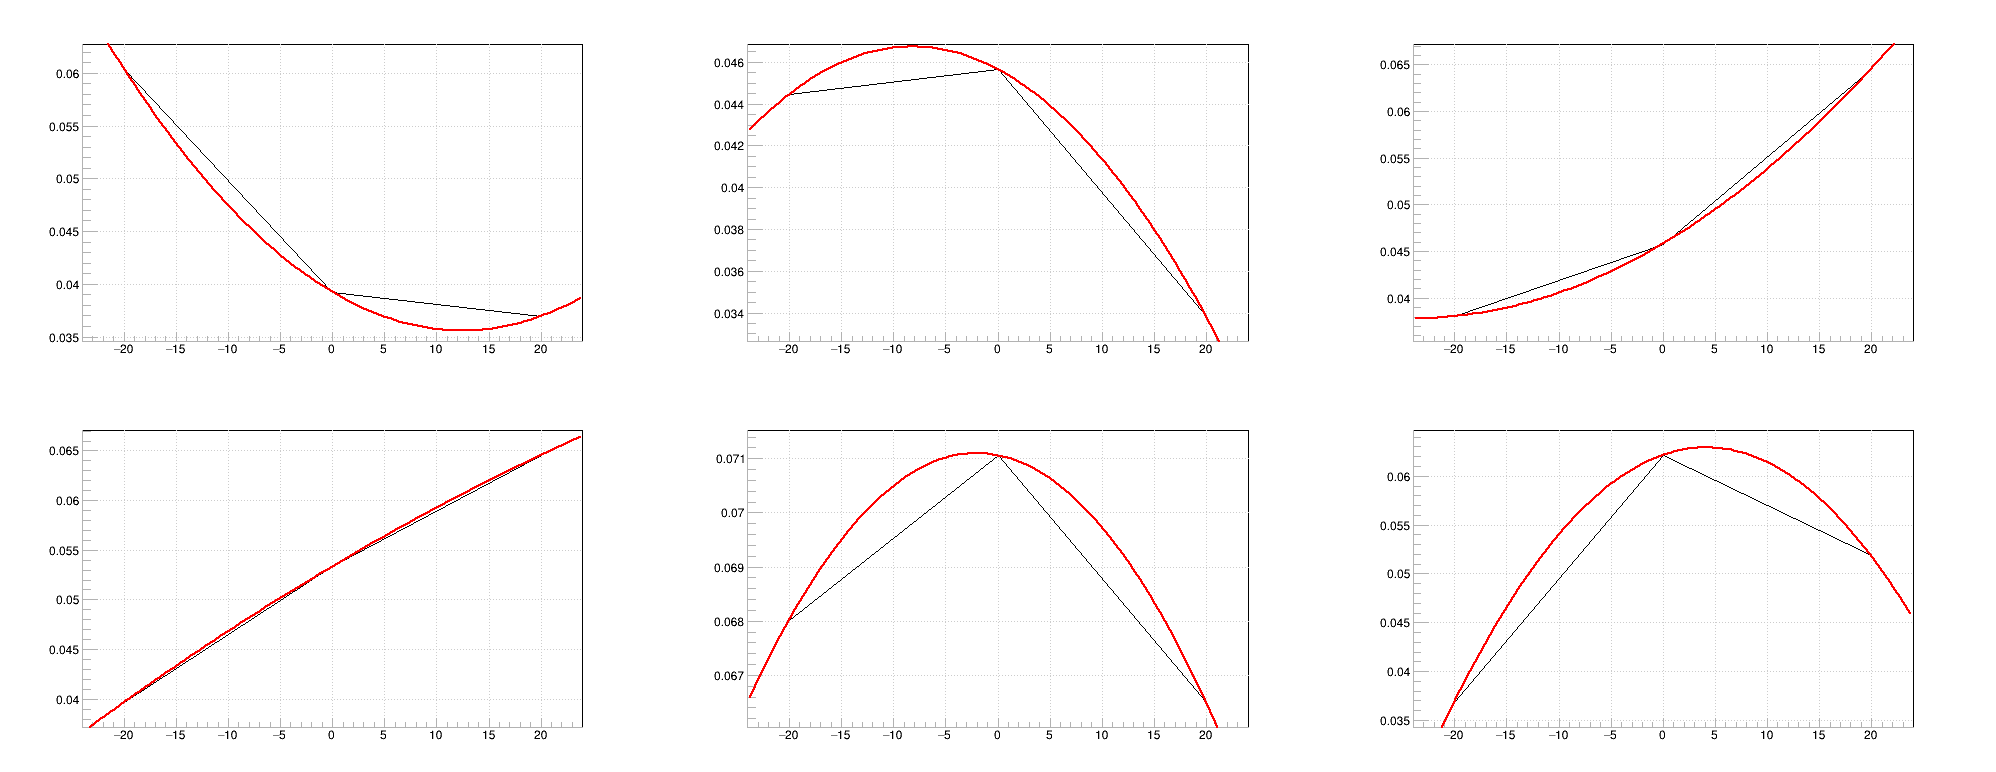

In [18]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(0),dpp12.fdp.GetParameter(0),dpp13.fdp.GetParameter(0)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t10 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t10,"QA")#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(0),dpp22.fdp.GetParameter(0),dpp23.fdp.GetParameter(0)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t20 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t20,"QA")#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(0),dpp32.fdp.GetParameter(0),dpp33.fdp.GetParameter(0)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t30 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t30,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(0),dpp42.fdp.GetParameter(0),dpp43.fdp.GetParameter(0)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t40 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t40,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(0),dpp52.fdp.GetParameter(0),dpp53.fdp.GetParameter(0)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t50 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t50,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(0),dpp62.fdp.GetParameter(0),dpp63.fdp.GetParameter(0)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t60 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t60,"QA")#NewFit(dpphi11,y1)
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")


(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02
(1.7616E-05*phi*phi + 3.5439E-04*phi + -3.7122E-02)*pp  + -1.6286E-05*phi*phi + -2.6545E-04*phi + 4.5659E-02
(-1.6419E-05*phi*phi + -8.1776E-04*phi + -3.2776E-02)*pp  + 1.3734E-05*phi*phi + 6.6125E-04*phi + 4.5784E-02
(8.0912E-06*phi*phi + -8.2672E-04*phi + -4.0495E-02)*pp  + -3.1380E-06*phi*phi + 6.2211E-04*phi + 5.3361E-02
(1.9512E-05*phi*phi + 1.0228E-04*phi + -6.2351E-02)*pp  + -9.5023E-06*phi*phi + -3.7997E-05*phi + 7.1061E-02
(5.8488E-05*phi*phi + -6.4709E-04*phi + -5.3833E-02)*pp  + -4.4462E-05*phi*phi + 3.7529E-04*phi + 6.2130E-02


Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


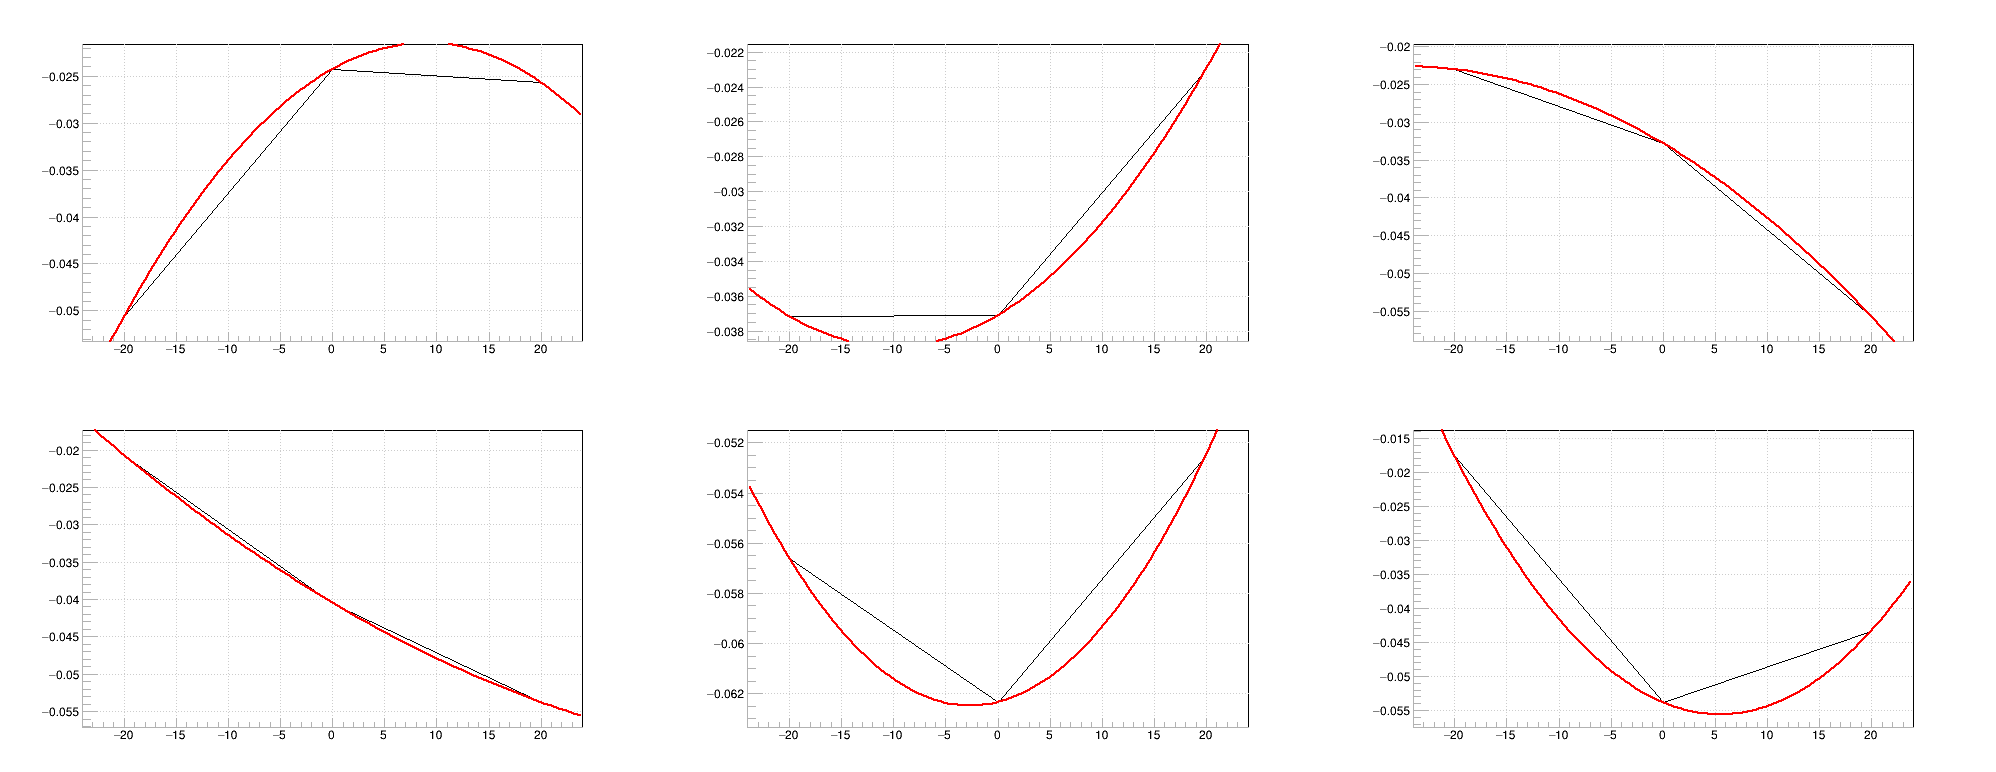

In [19]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(1),dpp12.fdp.GetParameter(1),dpp13.fdp.GetParameter(1)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t1 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t1,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(1),dpp22.fdp.GetParameter(1),dpp23.fdp.GetParameter(1)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t2 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t2,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(1),dpp32.fdp.GetParameter(1),dpp33.fdp.GetParameter(1)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t3 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t3,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(1),dpp42.fdp.GetParameter(1),dpp43.fdp.GetParameter(1)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t4 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t4,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(1),dpp52.fdp.GetParameter(1),dpp53.fdp.GetParameter(1)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t5 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t5,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(1),dpp62.fdp.GetParameter(1),dpp63.fdp.GetParameter(1)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t6 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t6,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print1 = "("+str(format(t1.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t1.GetParameter(1),".4E") )+ "*phi + " + str(format(t1.GetParameter(0),".4E")) + ")*pp + " +str(format(t10.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t10.GetParameter(1),".4E"))+ "*phi + " +str(format(t10.GetParameter(0),".4E"))
print2 = "("+str(format(t2.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t2.GetParameter(1),".4E"))+ "*phi + " + str(format(t2.GetParameter(0),".4E")) + ")*pp  + " +str(format(t20.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t20.GetParameter(1),".4E"))+ "*phi + " +str(format(t20.GetParameter(0),".4E"))
print3 = "("+str(format(t3.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t3.GetParameter(1),".4E") )+ "*phi + " + str(format(t3.GetParameter(0),".4E")) + ")*pp  + " +str(format(t30.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t30.GetParameter(1),".4E"))+ "*phi + " +str(format(t30.GetParameter(0),".4E"))
print4 = "("+str(format(t4.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t4.GetParameter(1),".4E") )+ "*phi + " + str(format(t4.GetParameter(0),".4E")) + ")*pp  + " +str(format(t40.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t40.GetParameter(1),".4E"))+ "*phi + " +str(format(t40.GetParameter(0),".4E"))
print5 = "("+str(format(t5.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t5.GetParameter(1),".4E") )+ "*phi + " + str(format(t5.GetParameter(0),".4E")) + ")*pp  + " +str(format(t50.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t50.GetParameter(1),".4E"))+ "*phi + " +str(format(t50.GetParameter(0),".4E"))
print6 = "("+str(format(t6.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t6.GetParameter(1),".4E") )+ "*phi + " + str(format(t6.GetParameter(0),".4E")) + ")*pp  + " +str(format(t60.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t60.GetParameter(1),".4E"))+ "*phi + " +str(format(t60.GetParameter(0),".4E"))


print(print1)
print(print2)
print(print3)
print(print4)
print(print5)
print(print6)

dp = (7.8044E-06*phi*phi + -9.4703E-05*phi + 4.6696E-03)*pp*pp +(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02;
dp =(-4.6611E-06*phi*phi + -8.1637E-05*phi + 7.5013E-03)*pp*pp +(1.7616E-05*phi*phi + 3.5439E-04*phi + -3.7122E-02)*pp  + -1.6286E-05*phi*phi + -2.6545E-04*phi + 4.5659E-02;
dp =(4.5270E-06*phi*phi + 2.2578E-04*phi + 5.9214E-03)*pp*pp +(-1.6419E-05*phi*phi + -8.1776E-04*phi + -3.2776E-02)*pp  + 1.3734E-05*phi*phi + 6.6125E-04*phi + 4.5784E-02;
dp =(-1.3141E-06*phi*phi + 1.9648E-04*phi + 7.6109E-03)*pp*pp +(8.0912E-06*phi*phi + -8.2672E-04*phi + -4.0495E-02)*pp  + -3.1380E-06*phi*phi + 6.2211E-04*phi + 5.3361E-02;
dp =(-5.4065E-06*phi*phi + -1.6325E-05*phi + 1.2269E-02)*pp*pp +(1.9512E-05*phi*phi + 1.0228E-04*phi + -6.2351E-02)*pp  + -9.5023E-06*phi*phi + -3.7997E-05*phi + 7.1061E-02;
dp =(-1.1882E-05*phi*phi + 2.0101E-04*phi + 1.1635E-02)*pp*pp +(5.8488E-05*phi*phi + -6.4709E-04*phi + -5.3833E-02)*pp  + -4.4462E-05*

Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed
Error in <TLinearFitter::Eval>: Matrix inversion failed
Error in <TDecompChol::Decompose()>: matrix not positive definite
Error in <TDecompChol::Solve()>: Decomposition failed


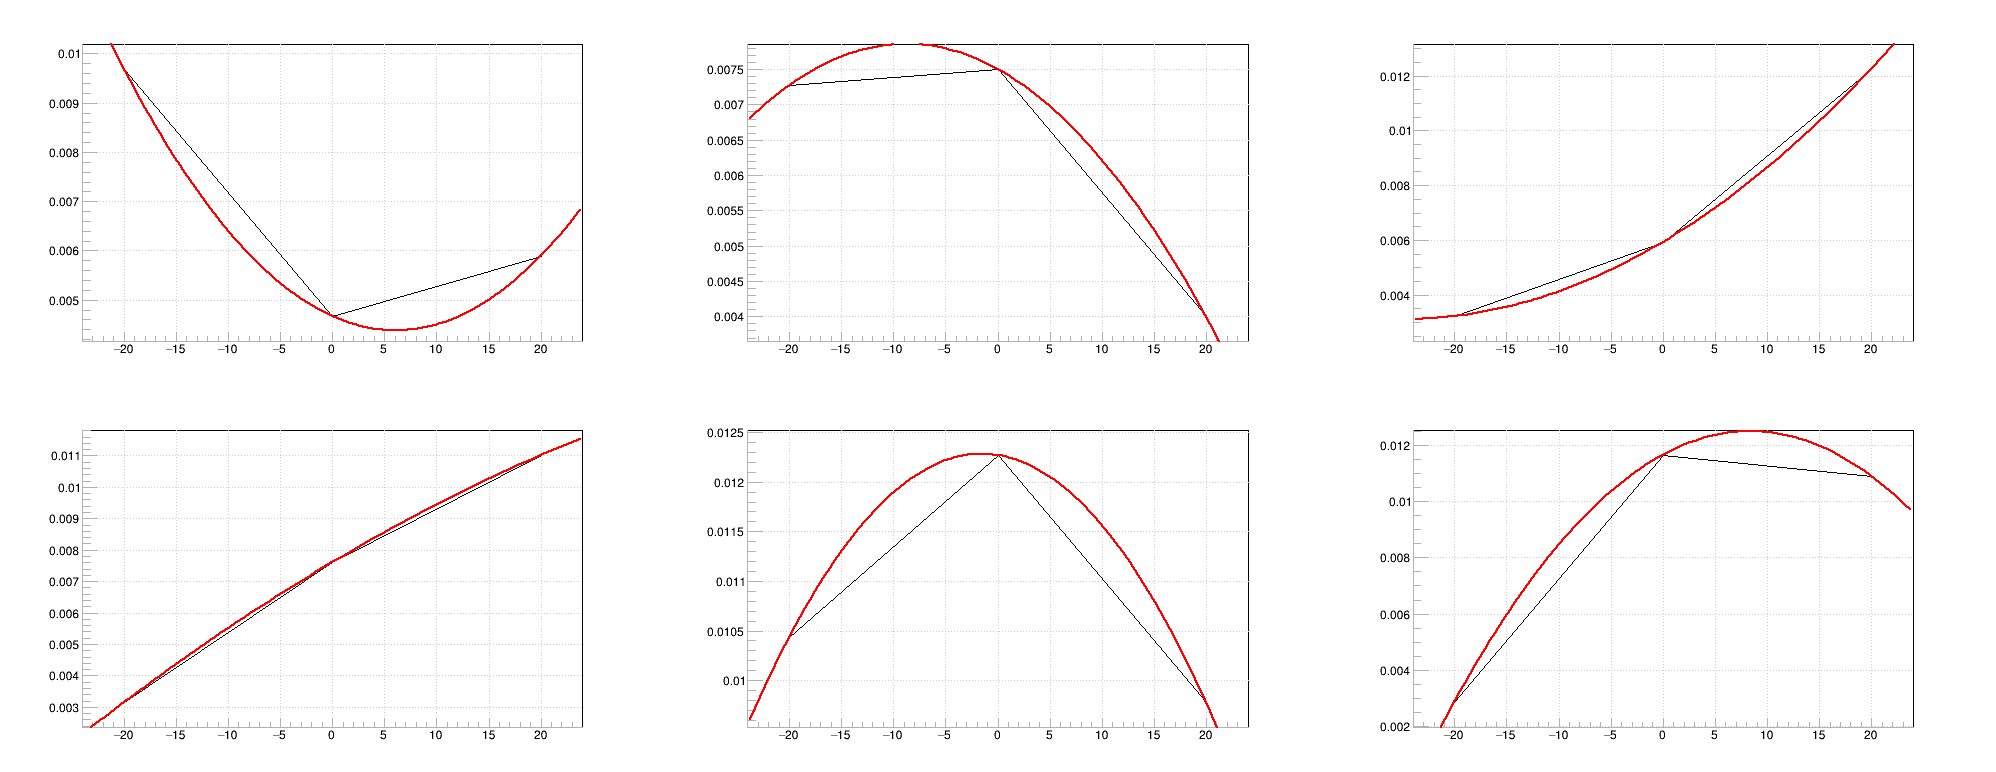

In [20]:
line =  ROOT.TLine(-20, 0, 0, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.01,0.01)
c1.Draw()
c1.cd(1)
xlims = [-20,0,20]
y1 = [dpp11.fdp.GetParameter(2),dpp12.fdp.GetParameter(2),dpp13.fdp.GetParameter(2)]

dpphi11 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi11.SetPoint(dpphi11.GetN(),x,y)
    count = count + 1
    t21 = ROOT.TF1("f1","pol2",-200,200)
    dpphi11.Fit(t21,"QA")
#NewFit(dpphi11,y1)
dpphi11.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(2)
xlims = [-20,0,20]
y1 = [dpp21.fdp.GetParameter(2),dpp22.fdp.GetParameter(2),dpp23.fdp.GetParameter(2)]

dpphi21 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi21.SetPoint(dpphi21.GetN(),x,y)
    count = count + 1
    t22 = ROOT.TF1("f1","pol2",-200,200)
    dpphi21.Fit(t22,"QA")
#NewFit(dpphi11,y1)
dpphi21.Draw("")
#line.SetLineColor(2)
#line.Draw("")


c1.cd(3)
xlims = [-20,0,20]
y1 = [dpp31.fdp.GetParameter(2),dpp32.fdp.GetParameter(2),dpp33.fdp.GetParameter(2)]

dpphi31 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi31.SetPoint(dpphi31.GetN(),x,y)
    count = count + 1
    t23 = ROOT.TF1("f1","pol2",-200,200)
    dpphi31.Fit(t23,"QA")
#NewFit(dpphi11,y1)
dpphi31.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(4)
xlims = [-20,0,20]
y1 = [dpp41.fdp.GetParameter(2),dpp42.fdp.GetParameter(2),dpp43.fdp.GetParameter(2)]

dpphi41 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi41.SetPoint(dpphi41.GetN(),x,y)
    count = count + 1
    t24 = ROOT.TF1("f1","pol2",-200,200)
    dpphi41.Fit(t24,"QA")
#NewFit(dpphi11,y1)
dpphi41.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(5)
xlims = [-20,0,20]
y1 = [dpp51.fdp.GetParameter(2),dpp52.fdp.GetParameter(2),dpp53.fdp.GetParameter(2)]

dpphi51 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi51.SetPoint(dpphi51.GetN(),x,y)
    count = count + 1
    t25 = ROOT.TF1("f1","pol2",-200,200)
    dpphi51.Fit(t25,"QA")
#NewFit(dpphi11,y1)
dpphi51.Draw("")
#line.SetLineColor(2)
#line.Draw("")

c1.cd(6)
xlims = [-20,0,20]
y1 = [dpp61.fdp.GetParameter(2),dpp62.fdp.GetParameter(2),dpp63.fdp.GetParameter(2)]

dpphi61 = ROOT.TGraphErrors()
count = 0
for x in xlims:
    y = y1[count]
    dpphi61.SetPoint(dpphi61.GetN(),x,y)
    count = count + 1
    t26 = ROOT.TF1("f1","pol2",-200,200)
    dpphi61.Fit(t26,"QA")
#NewFit(dpphi11,y1)
dpphi61.Draw("")
#line.SetLineColor(2)
#line.Draw("")

print("dp = ("+str(format(t21.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t21.GetParameter(1),".4E") )+ "*phi + " + str(format(t21.GetParameter(0),".4E") ) +")*pp*pp +" + print1 + ";")
print("dp =("+str(format(t22.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t22.GetParameter(1),".4E") )+ "*phi + " + str(format(t22.GetParameter(0),".4E")) +")*pp*pp +" + print2 + ";")
print("dp =("+str(format(t23.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t23.GetParameter(1),".4E")  )+ "*phi + " + str(format(t23.GetParameter(0),".4E")) +")*pp*pp +" +  print3 + ";")
print("dp =("+str(format(t24.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t24.GetParameter(1),".4E")  )+ "*phi + " + str(format(t24.GetParameter(0),".4E")) +")*pp*pp +" +  print4 + ";")
print("dp =("+str(format(t25.GetParameter(2),".4E") )+"*phi*phi + " +str(format(t25.GetParameter(1),".4E")  )+ "*phi + " + str(format(t25.GetParameter(0),".4E")) +")*pp*pp +" +  print5 + ";")
print("dp =("+str(format(t26.GetParameter(2),".4E"))+"*phi*phi + " +str(format(t26.GetParameter(1),".4E")  )+ "*phi + " + str(format(t26.GetParameter(0),".4E")) +")*pp*pp +" +  print6 + ";")



# e-, $\pi^+$ , $\pi^-$ corrected

In [1]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/lvl1_eppimpip.skim4_005*")
#fname = "/volatile/clas12/trotta/Momentum/Nov2022MomCorr/data/epPipPim.inb.qa.skim4_*"

fname = "/volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005*"
rdf = ROOT.RDataFrame("h22",fname)



rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec){

        // ivec = 0 --> Electron Corrections
        // ivec = 1 --> π+ Corrections
        // ivec = 2 --> π- Corrections (NOT UPDATED YET)
        // ivec = 3 --> Proton Corrections (NOT UPDATED YET)

        // Momentum Magnitude
        double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

        // Initializing the correction factor
        double dp = 0;

        // Defining Phi Angle
        double Phi = (180/3.1415926)*atan2(Py, Px);

        // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
        if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
            Phi += 360;
        }

        // Getting Local Phi Angle
        double PhiLocal = Phi - (sec - 1)*60;

        // Applying Shift Functions to Phi Angles (local shifted phi = phi)
        double phi = PhiLocal;

        // For Electron Shift
        if(ivec == 0){
            phi = PhiLocal - 30/pp;
        }

        // For π+ Pion/Proton Shift
        if(ivec == 1 || ivec == 3){
            phi = PhiLocal + (32/(pp-0.05));
        }

        // For π- Pion Shift
        if(ivec == 2){
            phi = PhiLocal - (32/(pp-0.05));
        }
        
          
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //==================================================================================================================================//
        //=======================//=======================//     Electron Corrections     //=======================//=======================//
        //==================================================================================================================================//
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

        if(ivec == 0){
            if(sec == 1){
                dp =     ((1.3189e-06)*phi*phi +  (4.26057e-05)*phi +  (-0.002322628))*pp*pp +  ((-1.1409e-05)*phi*phi +    (2.2188e-05)*phi + (0.02878927))*pp +   ((2.4950e-05)*phi*phi +   (1.6170e-06)*phi + (-0.061816275));
            }
            if(sec == 2){
                dp =    ((-2.9240e-07)*phi*phi +   (3.2448e-07)*phi +  (-0.001848308))*pp*pp +   ((4.4500e-07)*phi*phi +   (4.76324e-04)*phi + (0.02219469))*pp +   ((6.9220e-06)*phi*phi +  (-0.00153517)*phi + (-0.0479058));
            }
            if(sec == 3){
                dp =    ((2.71911e-06)*phi*phi + (1.657148e-05)*phi +  (-0.001822211))*pp*pp + ((-4.96814e-05)*phi*phi + (-3.761117e-04)*phi + (0.02564148))*pp +  ((1.97748e-04)*phi*phi +  (9.58259e-04)*phi + (-0.05818292));
            }
            if(sec == 4){
                dp =    ((1.90966e-06)*phi*phi +  (-2.4761e-05)*phi +   (-0.00231562))*pp*pp +  ((-2.3927e-05)*phi*phi +   (2.25262e-04)*phi +  (0.0291831))*pp +   ((8.0515e-05)*phi*phi + (-6.42098e-04)*phi + (-0.06159197));
            }
            if(sec == 5){
                dp = ((-3.6760323e-06)*phi*phi +  (4.04398e-05)*phi + (-0.0021967515))*pp*pp +  ((4.90857e-05)*phi*phi +  (-4.37437e-04)*phi + (0.02494339))*pp + ((-1.08257e-04)*phi*phi +   (0.00146111)*phi + (-0.0648485));
            }
            if(sec == 6){
                dp =    ((-6.2488e-08)*phi*phi +  (2.23173e-05)*phi +   (-0.00227522))*pp*pp +   ((1.8372e-05)*phi*phi +   (-7.5227e-05)*phi +   (0.032636))*pp +  ((-6.6566e-05)*phi*phi +  (-2.4450e-04)*phi + (-0.072293));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //======================//======================//     Electron Corrections (End)     //======================//======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        


        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//     π+ Corrections     //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        if(ivec == 1){
            if(sec == 1){
                dp =   ((-1.7334e-06)*phi*phi +  (1.45112e-05)*phi +  (0.00150721))*pp*pp +    ((6.6234e-06)*phi*phi + (-4.81191e-04)*phi +  (-0.0138695))*pp + ((-3.23625e-06)*phi*phi +   (2.79751e-04)*phi + (0.027726));
            }
            if(sec == 2){
                dp = ((-4.475464e-06)*phi*phi + (-4.11573e-05)*phi +  (0.00204557))*pp*pp +  ((2.468278e-05)*phi*phi +   (9.3590e-05)*phi +   (-0.015399))*pp + ((-1.61547e-05)*phi*phi +   (-2.4206e-04)*phi + (0.0231743));
            }
            if(sec == 3){
                dp =   ((-8.0374e-07)*phi*phi +   (2.8728e-06)*phi +  (0.00152163))*pp*pp +    ((5.1347e-06)*phi*phi +  (3.71709e-04)*phi +  (-0.0165735))*pp +   ((4.0105e-06)*phi*phi + (-5.289869e-04)*phi + (0.02175395));
            }
            if(sec == 4){
                dp =   ((-3.8790e-07)*phi*phi + (-4.78445e-05)*phi + (0.002324725))*pp*pp +   ((6.80543e-06)*phi*phi +  (5.69358e-04)*phi +  (-0.0199162))*pp + ((-1.30264e-05)*phi*phi +  (-5.91606e-04)*phi + (0.03202088));
            }
            if(sec == 5){
                dp =  ((2.198518e-06)*phi*phi + (-1.52535e-05)*phi + (0.001187761))*pp*pp + ((-1.000264e-05)*phi*phi +  (1.63976e-04)*phi + (-0.01429673))*pp +   ((9.4962e-06)*phi*phi +  (-3.86691e-04)*phi + (0.0303695));
            }
            if(sec == 6){
                dp =  ((-3.92944e-07)*phi*phi +  (1.45848e-05)*phi +  (0.00120668))*pp*pp +    ((3.7899e-06)*phi*phi + (-1.98219e-04)*phi +  (-0.0131312))*pp +  ((-3.9961e-06)*phi*phi +  (-1.32883e-04)*phi + (0.0294497));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//  π+ Corrections (End)  //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        
        
       
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //==================//==================//    π- Corrections (Updated as of 11-21-2022)    //==================//==================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////



         if(ivec == 2){
            if(sec == 1){
                //dp = (7.8044E-06*phi*phi + -9.4703E-05*phi + 4.6696E-03-0.004)*pp*pp +(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02+0.02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02-0.03;
                dp = (7.8044E-06*phi*phi + -9.4703E-05*phi + 4.6696E-03)*pp*pp +(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02;
            
            
            }
            if(sec == 2){
                dp =(-4.6611E-06*phi*phi + -8.1637E-05*phi + 7.5013E-03)*pp*pp +(1.7616E-05*phi*phi + 3.5439E-04*phi + -3.7122E-02)*pp  + -1.6286E-05*phi*phi + -2.6545E-04*phi + 4.5659E-02;
            
            }

            if(sec == 3){
                dp =(4.5270E-06*phi*phi + 2.2578E-04*phi + 5.9214E-03)*pp*pp +(-1.6419E-05*phi*phi + -8.1776E-04*phi + -3.2776E-02)*pp  + 1.3734E-05*phi*phi + 6.6125E-04*phi + 4.5784E-02;
            }

            if(sec == 4){
                dp =(-1.3141E-06*phi*phi + 1.9648E-04*phi + 7.6109E-03-0.006)*pp*pp +(8.0912E-06*phi*phi + -8.2672E-04*phi + -4.0495E-02+0.03)*pp  + -3.1380E-06*phi*phi + 6.2211E-04*phi + 5.3361E-02-0.04;

            }

            if(sec == 5){
                dp =(-5.4065E-06*phi*phi + -1.6325E-05*phi + 1.2269E-02-0.002)*pp*pp +(1.9512E-05*phi*phi + 1.0228E-04*phi + -6.2351E-02+0.01)*pp  + -9.5023E-06*phi*phi + -3.7997E-05*phi + 7.1061E-02-0.02;
            
            }

            if(sec == 6){
                dp =(-1.1882E-05*phi*phi + 2.0101E-04*phi + 1.1635E-02-0.01)*pp*pp +(5.8488E-05*phi*phi + -6.4709E-04*phi + -5.3833E-02+0.05)*pp  + -4.4462E-05*phi*phi + 3.7529E-04*phi + 6.2130E-02-0.06;
            
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=======================//=======================//      π- Corrections (End)      //=======================//=======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        
        return dp/pp;
    };
auto fe = dppC(ex, ey, ez, esec, 0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

            
    

auto ppPim = pim.P();

 double pimPh = pim.Phi()*TMath::RadToDeg();
   /* if(pimsec >1 && pim.Phi() <0){
        pimPh = pim.Phi()*TMath::RadToDeg()+360-(pimsec-1)*60;
    } else {
        pimPh = pim.Phi()*TMath::RadToDeg()-(pimsec-1)*60;
    }*/
    
    if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pim.Phi()*TMath::RadToDeg()+360;
    }


    pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));



auto ePipPimX_noC = beam + targ - ele- pip - pim;

auto ePipPimX_eC = beam + targ - eleC- pip - pim;

auto ePipPimX_eC_pipC = beam + targ - eleC- pipC - pim;

auto ePipPimXC = beam + targ - eleC - pipC - pimC;



std::vector<double> vals = {ePipPimXC.M(),pim.P(),pimPhi,ePipPimX_eC_pipC.M(),pimC.P(),eleC.P(),pipC.P(),ePipPimX_noC.M(),ePipPimX_eC.M()};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("eppxM","vals[3]")
rdf = rdf.Define("eppxM_eC","vals[7]")
rdf = rdf.Define("eppxM_nC","vals[8]")
rdf = rdf.Define("pimP","vals[1]")
rdf = rdf.Define("pimPC","vals[4]")
rdf = rdf.Define("elePC","vals[5]")
rdf = rdf.Define("pipPC","vals[6]")

rdf = rdf.Define("pimphi","vals[2]")














def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,2,0.5), numpy.arange(2, 4,0.5)))
    print("xlims",xlims)
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.3,mx+0.3)
        fy.SetParLimits(2,0.005,0.045)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    









MMsec1  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05")
MMsec2  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec3  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec4  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec5  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec6  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
    


MM1 = []
MM2 = []
MM3 = []
nbins = 100
sec1E1 = MMsec1.Filter("pimphi < -10 && pimsec == 1")
MM1.append(sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-}  [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && pimsec == 1")
MM2.append(sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec1E3 = MMsec1.Filter("pimphi > 10 && pimsec == 1")
MM3.append(sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))

sec2E1 = MMsec2.Filter("pimphi < -10 && pimsec == 2")
MM1.append(sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && pimsec == 2")
MM2.append(sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec2E3 = MMsec2.Filter("pimphi > 10 && pimsec == 2")
MM3.append(sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))

sec3E1 = MMsec3.Filter("pimphi < -10 && pimsec == 3")
MM1.append(sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && pimsec == 3")
MM2.append(sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec3E3 = MMsec3.Filter("pimphi > 10 && pimsec == 3")
MM3.append(sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))

sec4E1 = MMsec4.Filter("pimphi < -10 && pimsec == 4")
MM1.append(sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && pimsec == 4")
MM2.append(sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec4E3 = MMsec4.Filter("pimphi > 10 && pimsec == 4")
MM3.append(sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))


sec5E1 = MMsec5.Filter("pimphi < -10 && pimsec == 5")
MM1.append(sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && pimsec == 5")
MM2.append(sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec5E3 = MMsec5.Filter("pimphi > 10 && pimsec == 5")
MM3.append(sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))

sec6E1 = MMsec6.Filter("pimphi < -10 && pimsec == 6")
MM1.append(sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && pimsec == 6")
MM2.append(sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))
sec6E3 = MMsec6.Filter("pimphi >10 && pimsec == 6")
MM3.append(sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM_eC"))

line =  ROOT.TLine(0, 0.938, 6, 0.938)



hMM = [MM1,MM2,MM3]
for i in hMM:
    count= 1
    for j in i:
        if count ==3:
            fit2d(j,count)
        else:
            fit2d(j,count)
        count +=1

Welcome to JupyROOT 6.22/06
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]


In [2]:

ucMM1 = []
ucMM2 = []
ucMM3 = []

ucMM1.append(sec1E1.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec1E2.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec1E3.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))


ucMM1.append(sec2E1.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec2E2.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec2E3.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))

ucMM1.append(sec3E1.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec3E2.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec3E3.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))

ucMM1.append(sec4E1.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec4E2.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec4E3.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))


ucMM1.append(sec5E1.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec5E2.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec5E3.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))

ucMM1.append(sec6E1.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM2.append(sec6E2.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))
ucMM3.append(sec6E3.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimP","eppxM_nC"))



def fit2d2(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,2,0.5), numpy.arange(2, 4,0.5)))
    print("xlims",xlims)
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.3,mx+0.3)
        fy.SetParLimits(2,0.005,0.05)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)


hucMM = [ucMM1,ucMM2,ucMM3]
for i in hucMM:
    count= 1
    for j in i:
        fit2d2(j,count)
        count +=1

xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]
xlims [0.5 1.  1.5 2.  2.5 3.  3.5]


10


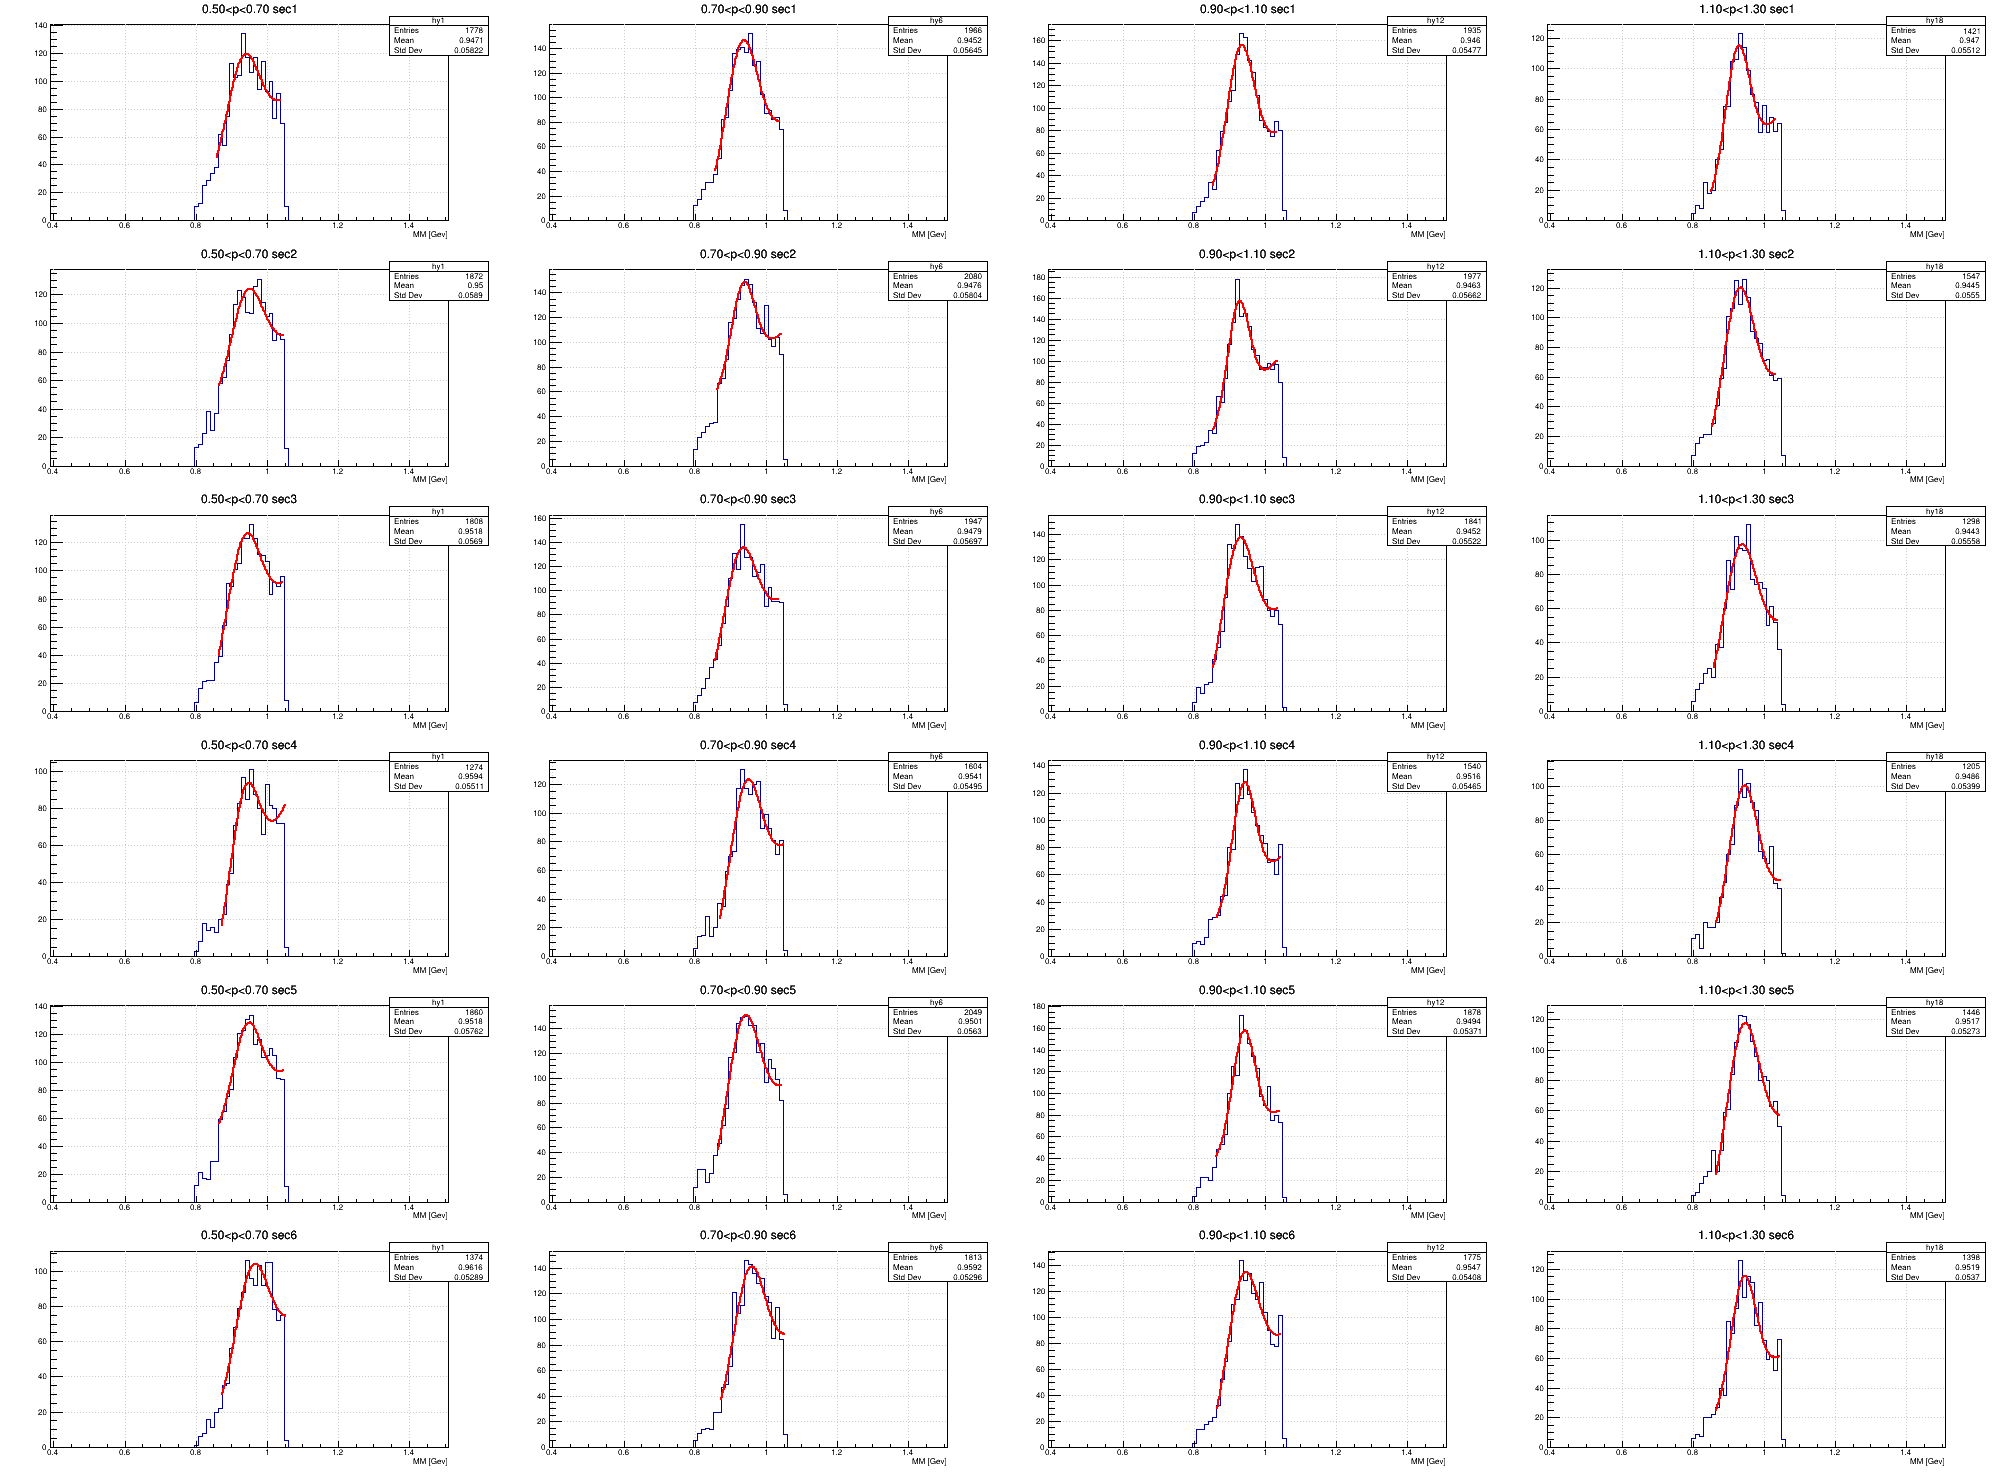

In [3]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(4,6,0.0001,0.0001)
c2.Draw()

print(len(hMM[0][0].hys))
for i in range(4):
    c2.cd(i+1)
    hMM[0][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][0].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4)
    hMM[0][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][1].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*2)
    hMM[0][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][2].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*3)
    hMM[0][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][3].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*4)
    hMM[0][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][4].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*5)
    hMM[0][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[0][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

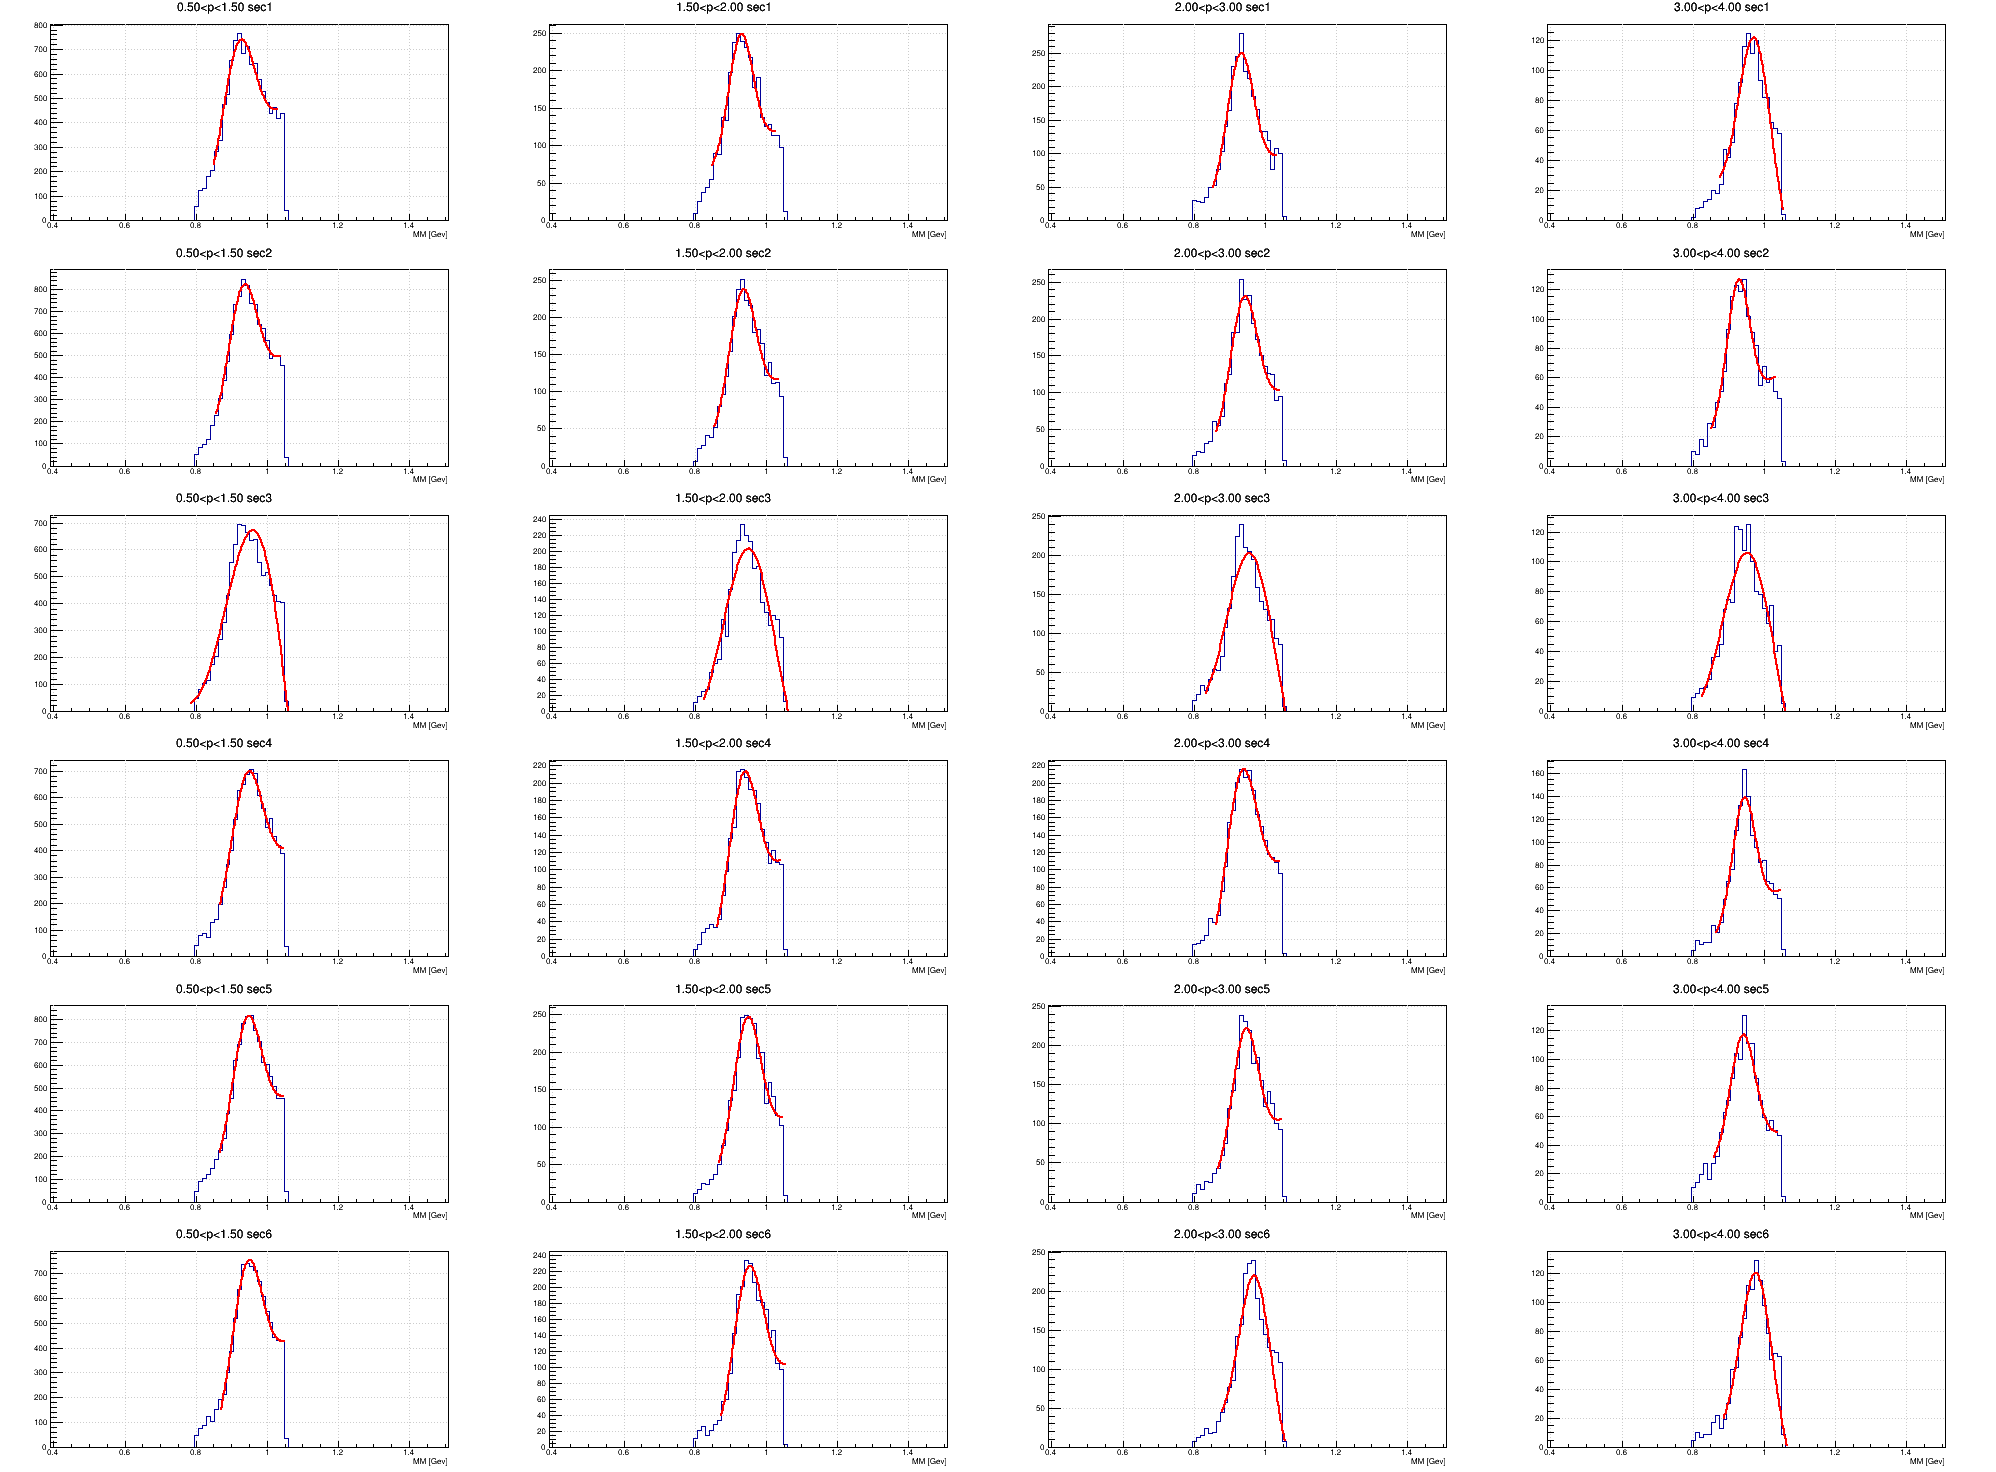

In [5]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(4,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    hMM[1][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][0].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4)
    hMM[1][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][1].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*2)
    hMM[1][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][2].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*3)
    hMM[1][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][3].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*4)
    hMM[1][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][4].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*5)
    hMM[1][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[1][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

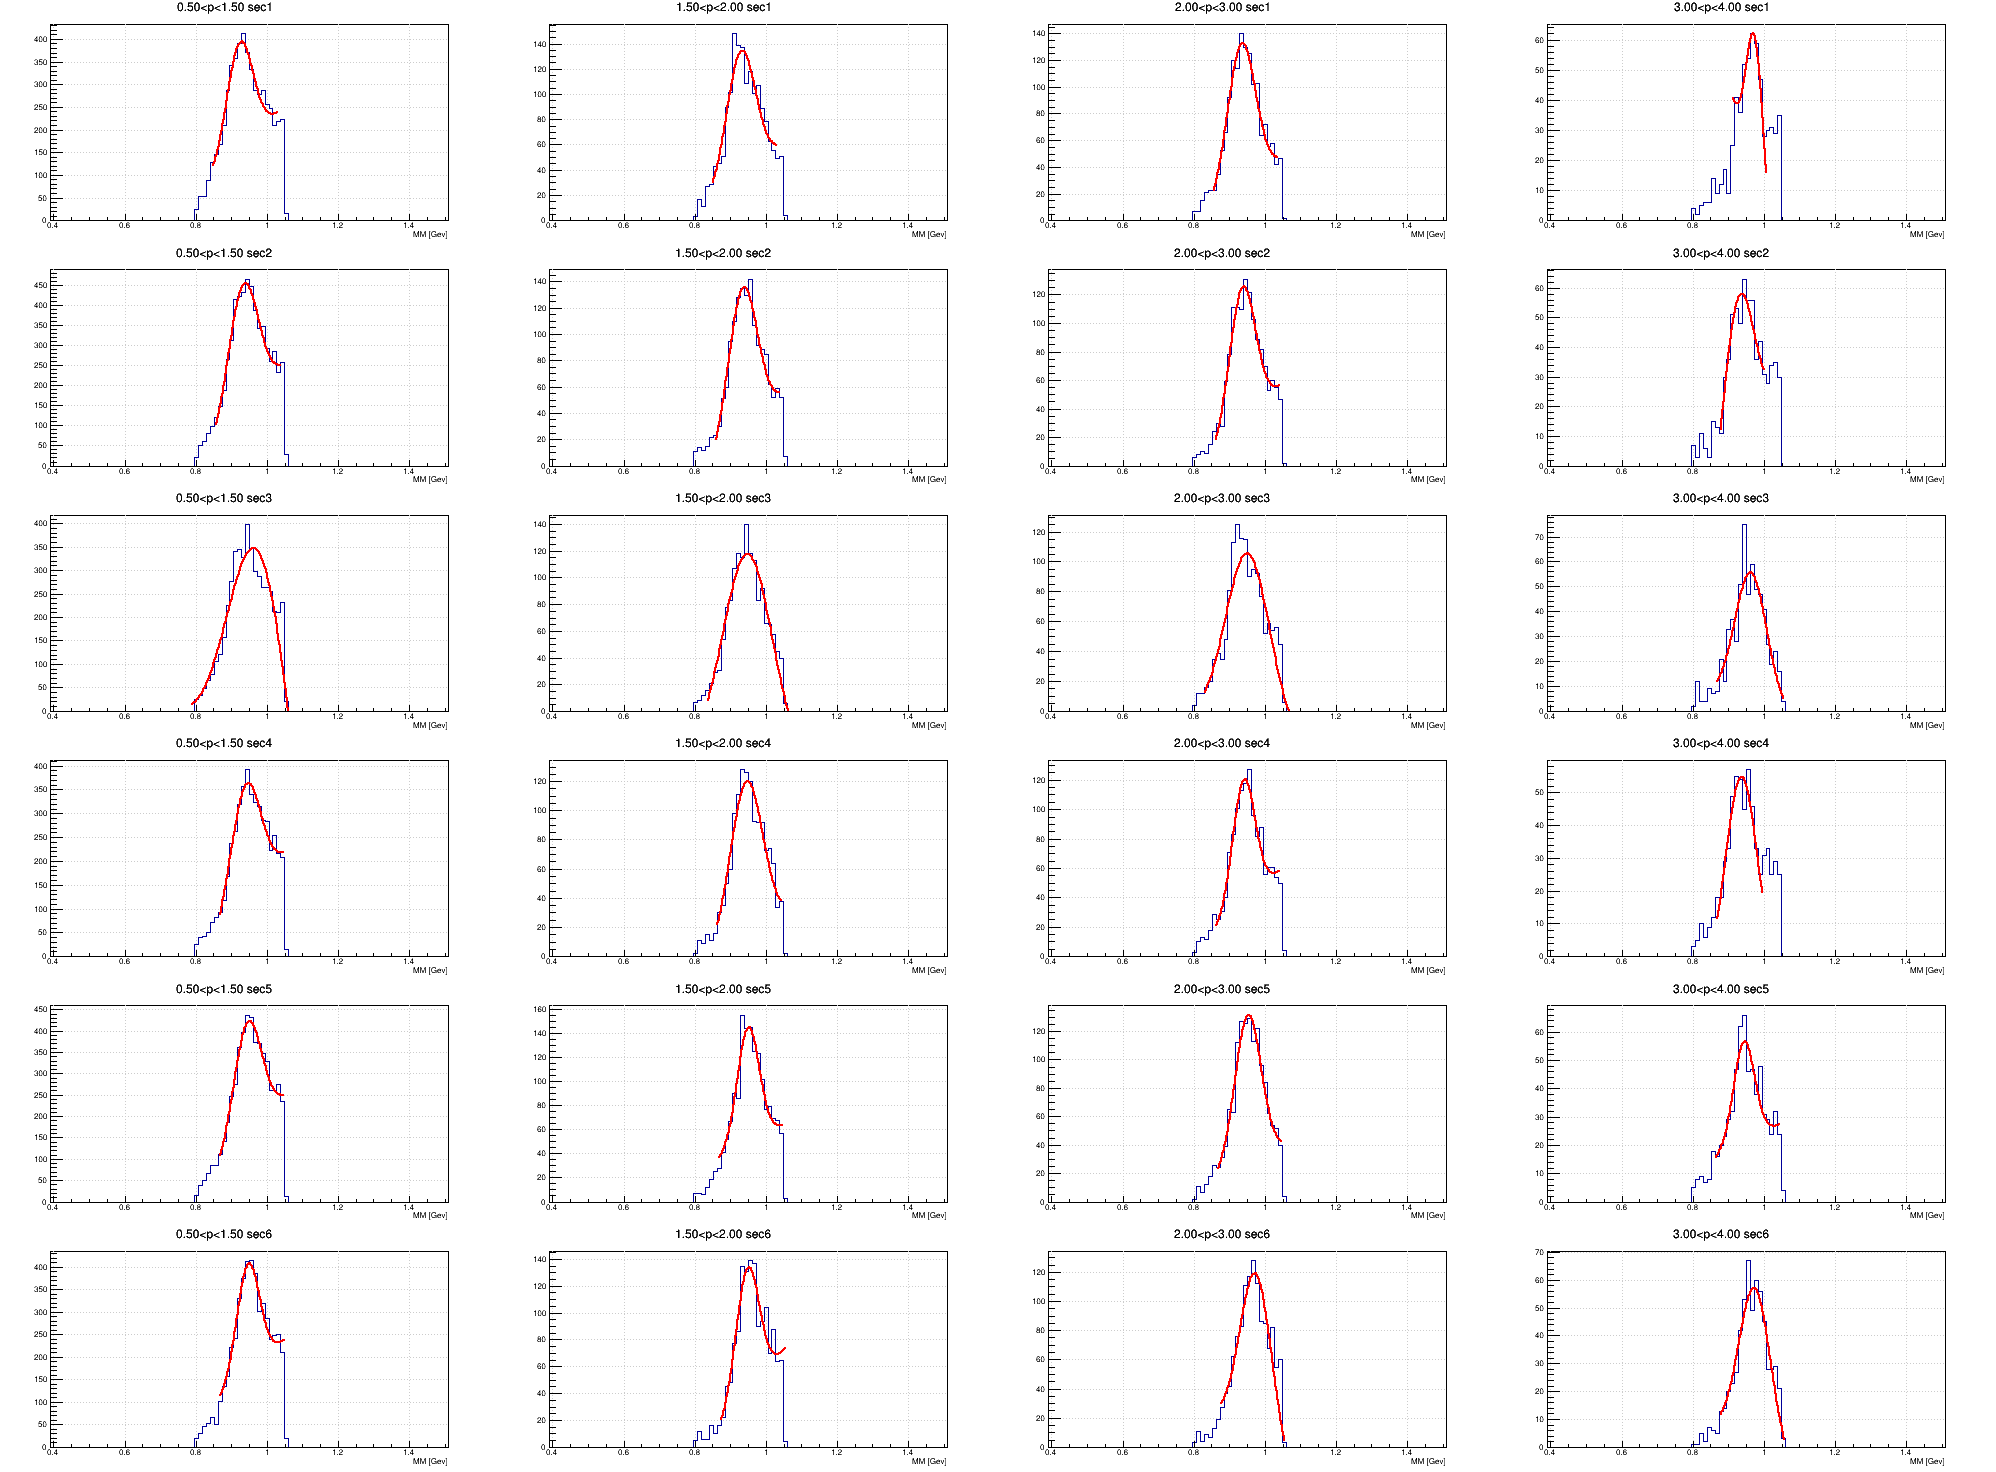

In [6]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(4,6,0.0001,0.0001)
c2.Draw()


for i in range(4):
    c2.cd(i+1)
    hMM[2][0].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][0].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4)
    hMM[2][1].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][1].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*2)
    hMM[2][2].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][2].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*3)
    hMM[2][3].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][3].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*4)
    hMM[2][4].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][4].hys[i].Draw()   
for i in range(4):
    c2.cd(i+1+4*5)
    hMM[2][5].hys[i].GetXaxis().SetRangeUser(0,2)
    hMM[2][5].hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

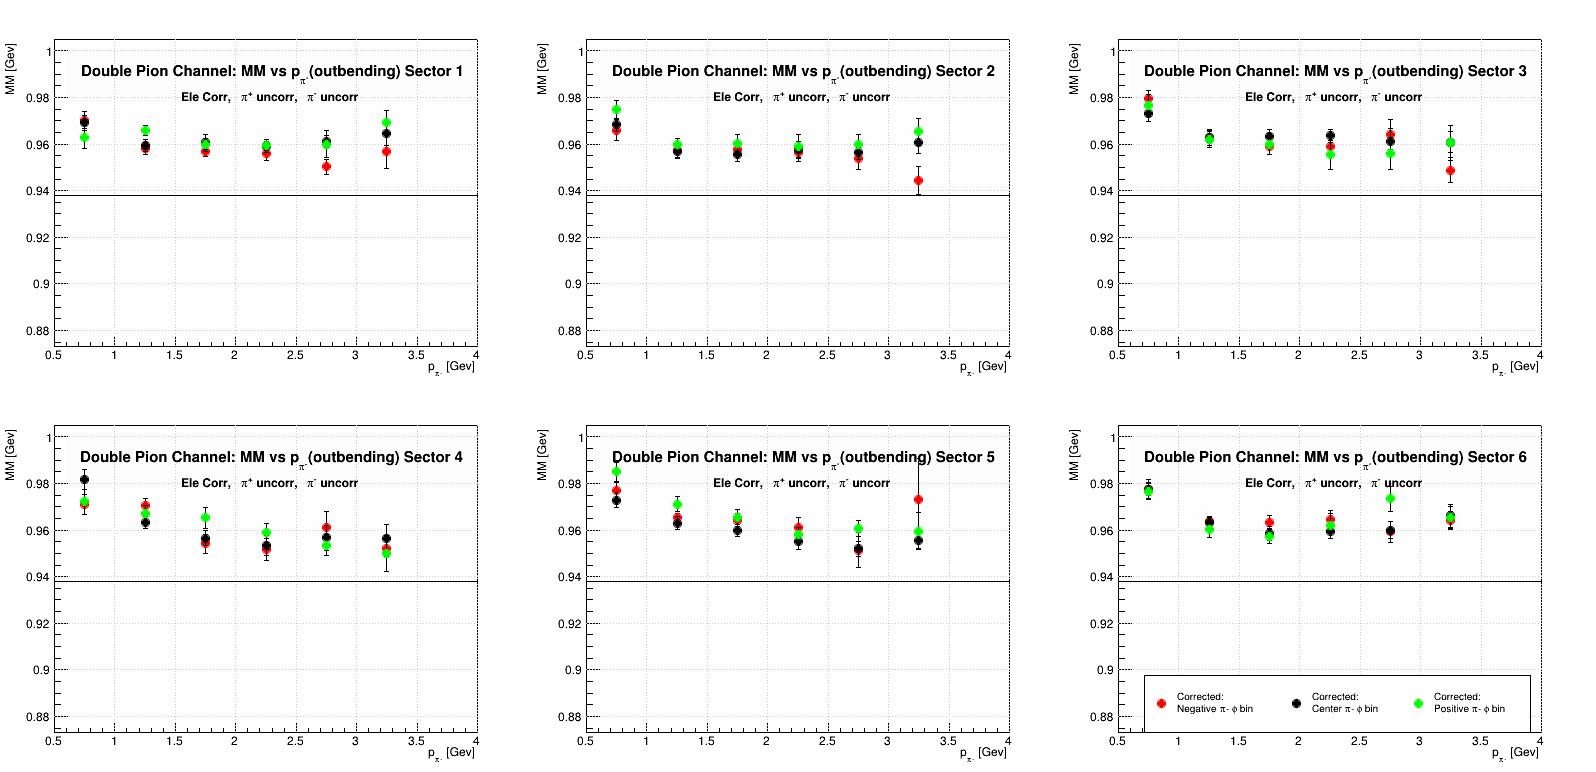

In [3]:
c3 = ROOT.TCanvas("c1","Inbending",1600,800)
c3.Divide(3, 2, 0.001, 0.001)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(0.5, 0.938, 4, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.15, 0.25, 0.88, 0.1)
legend.SetNColumns(3)
legend.AddEntry(hMM[0][0].gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(hMM[1][0].gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(hMM[2][0].gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
#legend.AddEntry(hucMM[0][0].gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
#legend.AddEntry(hucMM[1][0].gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
#legend.AddEntry(hucMM[2][0].gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")

text = []
for i in range(0,6):
    text.append(ROOT.TPaveText(0.6,1,4,0.98))
for i in range(0,6):
    text[i].SetBorderSize(0)
    text[i].SetFillColorAlpha(0,0)
    
    
text2 = []
for i in range(0,6):
    text2.append(ROOT.TPaveText(0.6,1,4,0.96))
for i in range(0,6):
    text2[i].SetBorderSize(0)
    
    
    text2[i].SetFillColorAlpha(0,0)
count = 1

for j in range(0,6):
    c3.cd(count)
   
    hMM[0][j].Draw("axis")
    hMM[0][j].SetTitle("")
    hMM[0][j].GetYaxis().SetRangeUser(0.88,1)
   # hMM[0][j].GetYaxis().SetRangeUser(0.8,1.1)
    hMM[0][j].SetStats(False)
    hMM[0][j].gr.SetMarkerColor(2)
    hMM[0][j].gr.Draw("P")
    hMM[1][j].gr.SetMarkerColor(1)
    hMM[1][j].gr.Draw("P")
    hMM[2][j].gr.SetMarkerColor(3)
    hMM[2][j].gr.Draw("P")
    
    line.SetLineColor(1)
    line.Draw("")
    
    hucMM[0][j].gr.SetLineStyle(2)
    hucMM[0][j].gr.SetLineWidth(3)
    hucMM[0][j].gr.SetLineColor(2)
    #hucMM[0][j].gr.Draw("same")
    hucMM[1][j].gr.SetLineStyle(2)
    hucMM[1][j].gr.SetLineWidth(3)
    hucMM[1][j].gr.SetLineColor(1)
    #hucMM[1][j].gr.Draw("same")
    hucMM[2][j].gr.SetLineStyle(2)
    hucMM[2][j].gr.SetLineWidth(3)
    hucMM[2][j].gr.SetLineColor(3)
    #hucMM[2][j].gr.Draw("same")
    
    text[j].AddText("Double Pion Channel: MM vs p_{#pi^{-}}(outbending) Sector "+ str(j+1) +"")
    text[j].Draw()
    
    text2[j].AddText("Ele Corr, #pi^{+} uncorr, #pi^{-} uncorr")
    text2[j].SetTextSize(0.035)
    text2[j].Draw()
   
   
    
    count +=1
    if j ==5:
        legend.Draw()

NameError: name 'MMsec1E1' is not defined

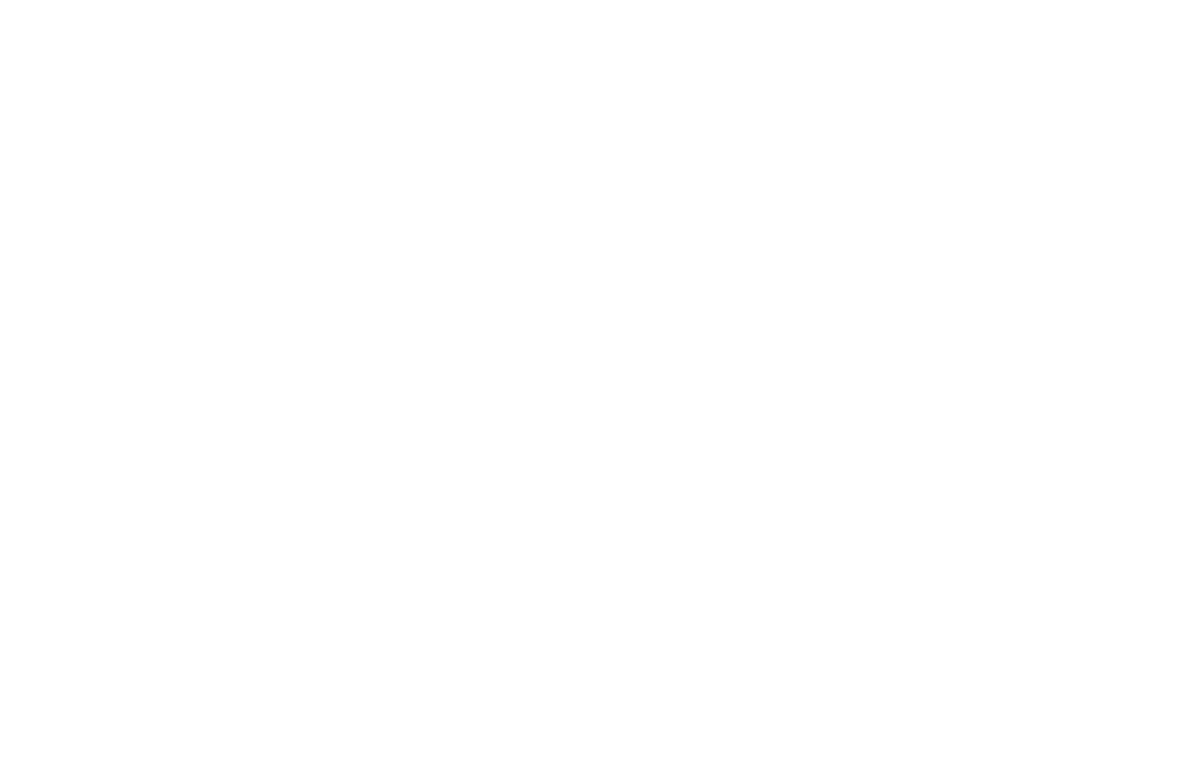

In [169]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.000, 0.000)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(1, 0.938, 4, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(MMsec1E1.gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(MMsec1E2.gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(MMsec1E3.gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(MMsec1E1P.gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(MMsec1E2P.gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(MMsec1E3P.gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")







c3.cd(1)
MMsec1E1.Draw("axis")

MMsec1E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec1E1.SetStats(False)
MMsec1E1.gr.SetMarkerColor(2)
MMsec1E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec1E2.gr.Draw("P")
MMsec1E3.gr.SetMarkerColor(3)
MMsec1E3.gr.Draw("P")

MMsec1E1P.gr.SetLineColor(2)
MMsec1E1P.gr.SetLineStyle(2)
MMsec1E1P.gr.Draw("same")
MMsec1E2P.gr.SetLineStyle(2)
MMsec1E2P.gr.Draw("same")
MMsec1E3P.gr.SetLineColor(3)
MMsec1E3P.gr.SetLineStyle(2)
MMsec1E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(2)
MMsec2E1.Draw("axis")
MMsec2E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec2E1.SetStats(False)
MMsec2E1.gr.SetMarkerColor(2)
MMsec2E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec2E2.gr.Draw("P")
MMsec2E3.gr.SetMarkerColor(3)
MMsec2E3.gr.Draw("P")



MMsec2E1P.gr.SetLineColor(2)
MMsec2E1P.gr.SetLineStyle(2)
MMsec2E1P.gr.Draw("same")
MMsec2E2P.gr.SetLineStyle(2)
MMsec2E2P.gr.Draw("same")
MMsec2E3P.gr.SetLineColor(3)
MMsec2E3P.gr.SetLineStyle(2)
MMsec2E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(3)
MMsec3E1.Draw("axis")
MMsec3E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec3E1.SetStats(False)
MMsec3E1.gr.SetMarkerColor(2)
MMsec3E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec3E2.gr.Draw("P")
MMsec3E3.gr.SetMarkerColor(3)
MMsec3E3.gr.Draw("P")


MMsec3E1P.gr.SetLineColor(2)
MMsec3E1P.gr.SetLineStyle(2)
MMsec3E1P.gr.Draw("same")
MMsec3E2P.gr.SetLineStyle(2)
MMsec3E2P.gr.Draw("same")
MMsec3E3P.gr.SetLineColor(3)
MMsec3E3P.gr.SetLineStyle(2)
MMsec3E3P.gr.Draw("same")
#legend.Draw() 


c3.cd(4)
MMsec4E1.Draw("axis")
MMsec4E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec4E1.SetStats(False)
MMsec4E1.gr.SetMarkerColor(2)
MMsec4E1.gr.Draw("p")
line.SetLineColor(2)
line.Draw("")
MMsec4E2.gr.Draw("p")
MMsec4E3.gr.SetMarkerColor(3)
MMsec4E3.gr.Draw("p")




MMsec4E1P.gr.SetLineColor(2)
MMsec4E1P.gr.SetLineStyle(2)
MMsec4E1P.gr.Draw("same")
MMsec4E2P.gr.SetLineStyle(2)
MMsec4E2P.gr.Draw("same")
MMsec4E3P.gr.SetLineColor(3)
MMsec4E3P.gr.SetLineStyle(2)
MMsec4E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(5)
MMsec5E1.Draw("axis")
MMsec5E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec5E1.SetStats(False)
MMsec5E1.gr.SetMarkerColor(2)
MMsec5E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec5E2.gr.Draw("P")
MMsec5E3.gr.SetMarkerColor(3)
MMsec5E3.gr.Draw(" P")



MMsec5E1P.gr.SetLineColor(2)
MMsec5E1P.gr.SetLineStyle(2)
MMsec5E1P.gr.Draw("same")
MMsec5E2P.gr.SetLineStyle(2)
MMsec5E2P.gr.Draw("same")
MMsec5E3P.gr.SetLineColor(3)
MMsec5E3P.gr.SetLineStyle(2)
MMsec5E3P.gr.Draw("same")
#legend.Draw() 

c3.cd(6)
MMsec6E1.Draw("axis")
MMsec6E1.GetYaxis().SetRangeUser(0.89,0.99)
MMsec6E1.SetStats(False)
MMsec6E1.gr.SetMarkerColor(2)
MMsec6E1.gr.Draw("P")
line.SetLineColor(2)
line.Draw("")
MMsec6E2.gr.Draw("P")
MMsec6E3.gr.SetMarkerColor(3)
MMsec6E3.gr.Draw("P")
#legend.Draw() 
MMsec6E1P.gr.SetLineColor(2)
MMsec6E1P.gr.SetLineStyle(2)
MMsec6E1P.gr.Draw("same")

MMsec6E2P.gr.SetLineStyle(2)
MMsec6E2P.gr.Draw("same")
MMsec6E3P.gr.SetLineColor(3)
MMsec6E3P.gr.SetLineStyle(2)
MMsec6E3P.gr.Draw("same")
legend.Draw() 
c3.Print("pics/Cont_phi/Pim_phi_correction.png")


In [16]:


def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(4,6,1), numpy.arange(6, 9,1)))
    print("xlims",xlims)
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.3,mx+0.3)
        fy.SetParLimits(2,0.005,0.045)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    
    
MM1e = []
MM2e = []
MM3e = []
nbins = 100
sec1E1 = MMsec1.Filter("pimphi < -10 && esec == 1")
MM1e.append(sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && esec == 1")
MM2e.append(sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec1E3 = MMsec1.Filter("pimphi > 10 && esec == 1")
MM3e.append(sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))

sec2E1 = MMsec2.Filter("pimphi < -10 && esec == 2")
MM1e.append(sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && esec == 2")
MM2e.append(sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec2E3 = MMsec2.Filter("pimphi > 10 && esec == 2")
MM3e.append(sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))

sec3E1 = MMsec3.Filter("pimphi < -10 && esec == 3")
MM1e.append(sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && esec == 3")
MM2e.append(sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec3E3 = MMsec3.Filter("pimphi > 10 && esec == 3")
MM3e.append(sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))

sec4E1 = MMsec4.Filter("pimphi < -10 && esec == 4")
MM1e.append(sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && esec == 4")
MM2e.append(sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec4E3 = MMsec4.Filter("pimphi > 10 && esec == 4")
MM3e.append(sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))


sec5E1 = MMsec5.Filter("pimphi < -10 && esec == 5")
MM1e.append(sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && esec == 5")
MM2e.append(sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec5E3 = MMsec5.Filter("pimphi > 10 && esec == 5")
MM3e.append(sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))

sec6E1 = MMsec6.Filter("pimphi < -10 && esec == 6")
MM1e.append(sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && esec == 6")
MM2e.append(sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))
sec6E3 = MMsec6.Filter("pimphi >10 && esec == 6")
MM3e.append(sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxMC"))

line =  ROOT.TLine(0, 0.938, 6, 0.938)



hMMe = [MM1e,MM2e,MM3e]
for i in hMMe:
    count= 1
    for j in i:
        fit2d(j,count)
        count +=1
        
        
unMM1e = []
unMM2e = []
unMM3e = []
nbins = 100
sec1E1 = MMsec1.Filter("pimphi < -10 && esec == 1")
unMM1e.append(sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-}  [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && esec == 1")
unMM2e.append(sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec1E3 = MMsec1.Filter("pimphi > 10 && esec == 1")
unMM3e.append(sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 1]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))

sec2E1 = MMsec2.Filter("pimphi < -10 && esec == 2")
unMM1e.append(sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && esec == 2")
unMM2e.append(sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec2E3 = MMsec2.Filter("pimphi > 10 && esec == 2")
unMM3e.append(sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 2]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))

sec3E1 = MMsec3.Filter("pimphi < -10 && esec == 3")
unMM1e.append(sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && esec == 3")
unMM2e.append(sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec3E3 = MMsec3.Filter("pimphi > 10 && esec == 3")
unMM3e.append(sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 3]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))

sec4E1 = MMsec4.Filter("pimphi < -10 && esec == 4")
unMM1e.append(sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && esec == 4")
unMM2e.append(sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec4E3 = MMsec4.Filter("pimphi > 10 && esec == 4")
unMM3e.append(sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 4]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))


sec5E1 = MMsec5.Filter("pimphi < -10 && esec == 5")
unMM1e.append(sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && esec == 5")
unMM2e.append(sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec5E3 = MMsec5.Filter("pimphi > 10 && esec == 5")
unMM3e.append(sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 5]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))

sec6E1 = MMsec6.Filter("pimphi < -10 && esec == 6")
unMM1e.append(sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{e-} [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && esec == 6")
unMM2e.append(sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))
sec6E3 = MMsec6.Filter("pimphi >10 && esec == 6")
unMM3e.append(sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi- [Sector 6]  ;p_{e-} [Gev];MM [Gev]",nbins,4,10,nbins,0.4,1.5),"elePC","eppxM"))



hucMMe = [unMM1e,unMM2e,unMM3e]
for i in hucMMe:
    count= 1
    for j in i:
        fit2d(j,count)
        count +=1

xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]
xlims [4 5 6 7 8]


IndexError: list index out of range

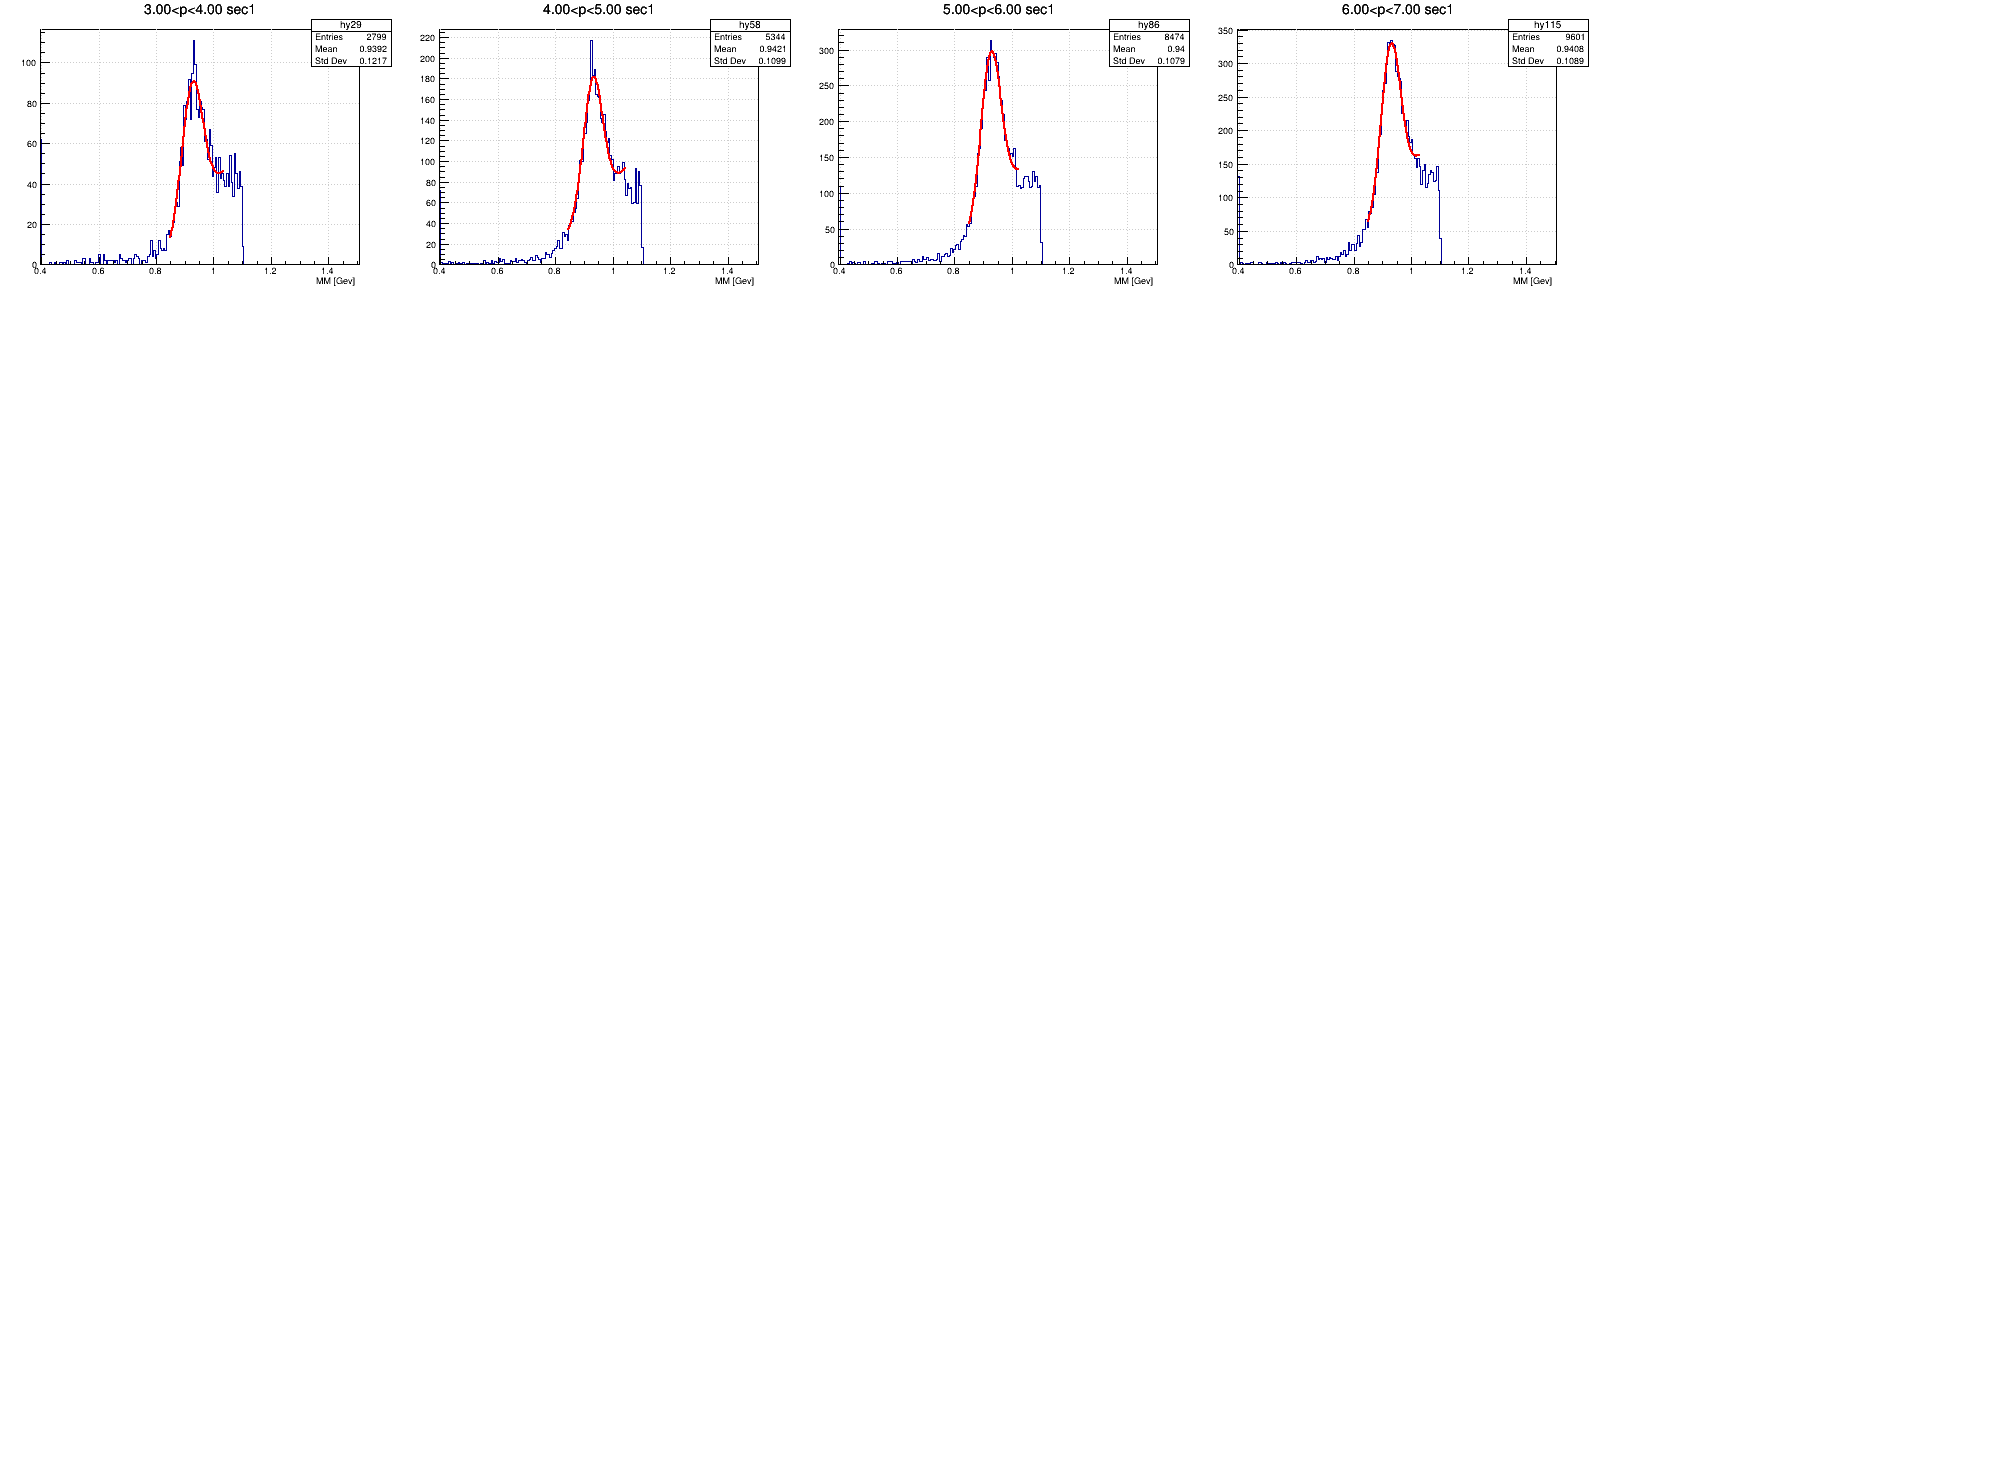

In [13]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,5,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E1e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    MMsec2E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E1e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    MMsec3E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E1e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    MMsec4E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E1e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    MMsec5E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E1e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    MMsec6E1e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E1e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

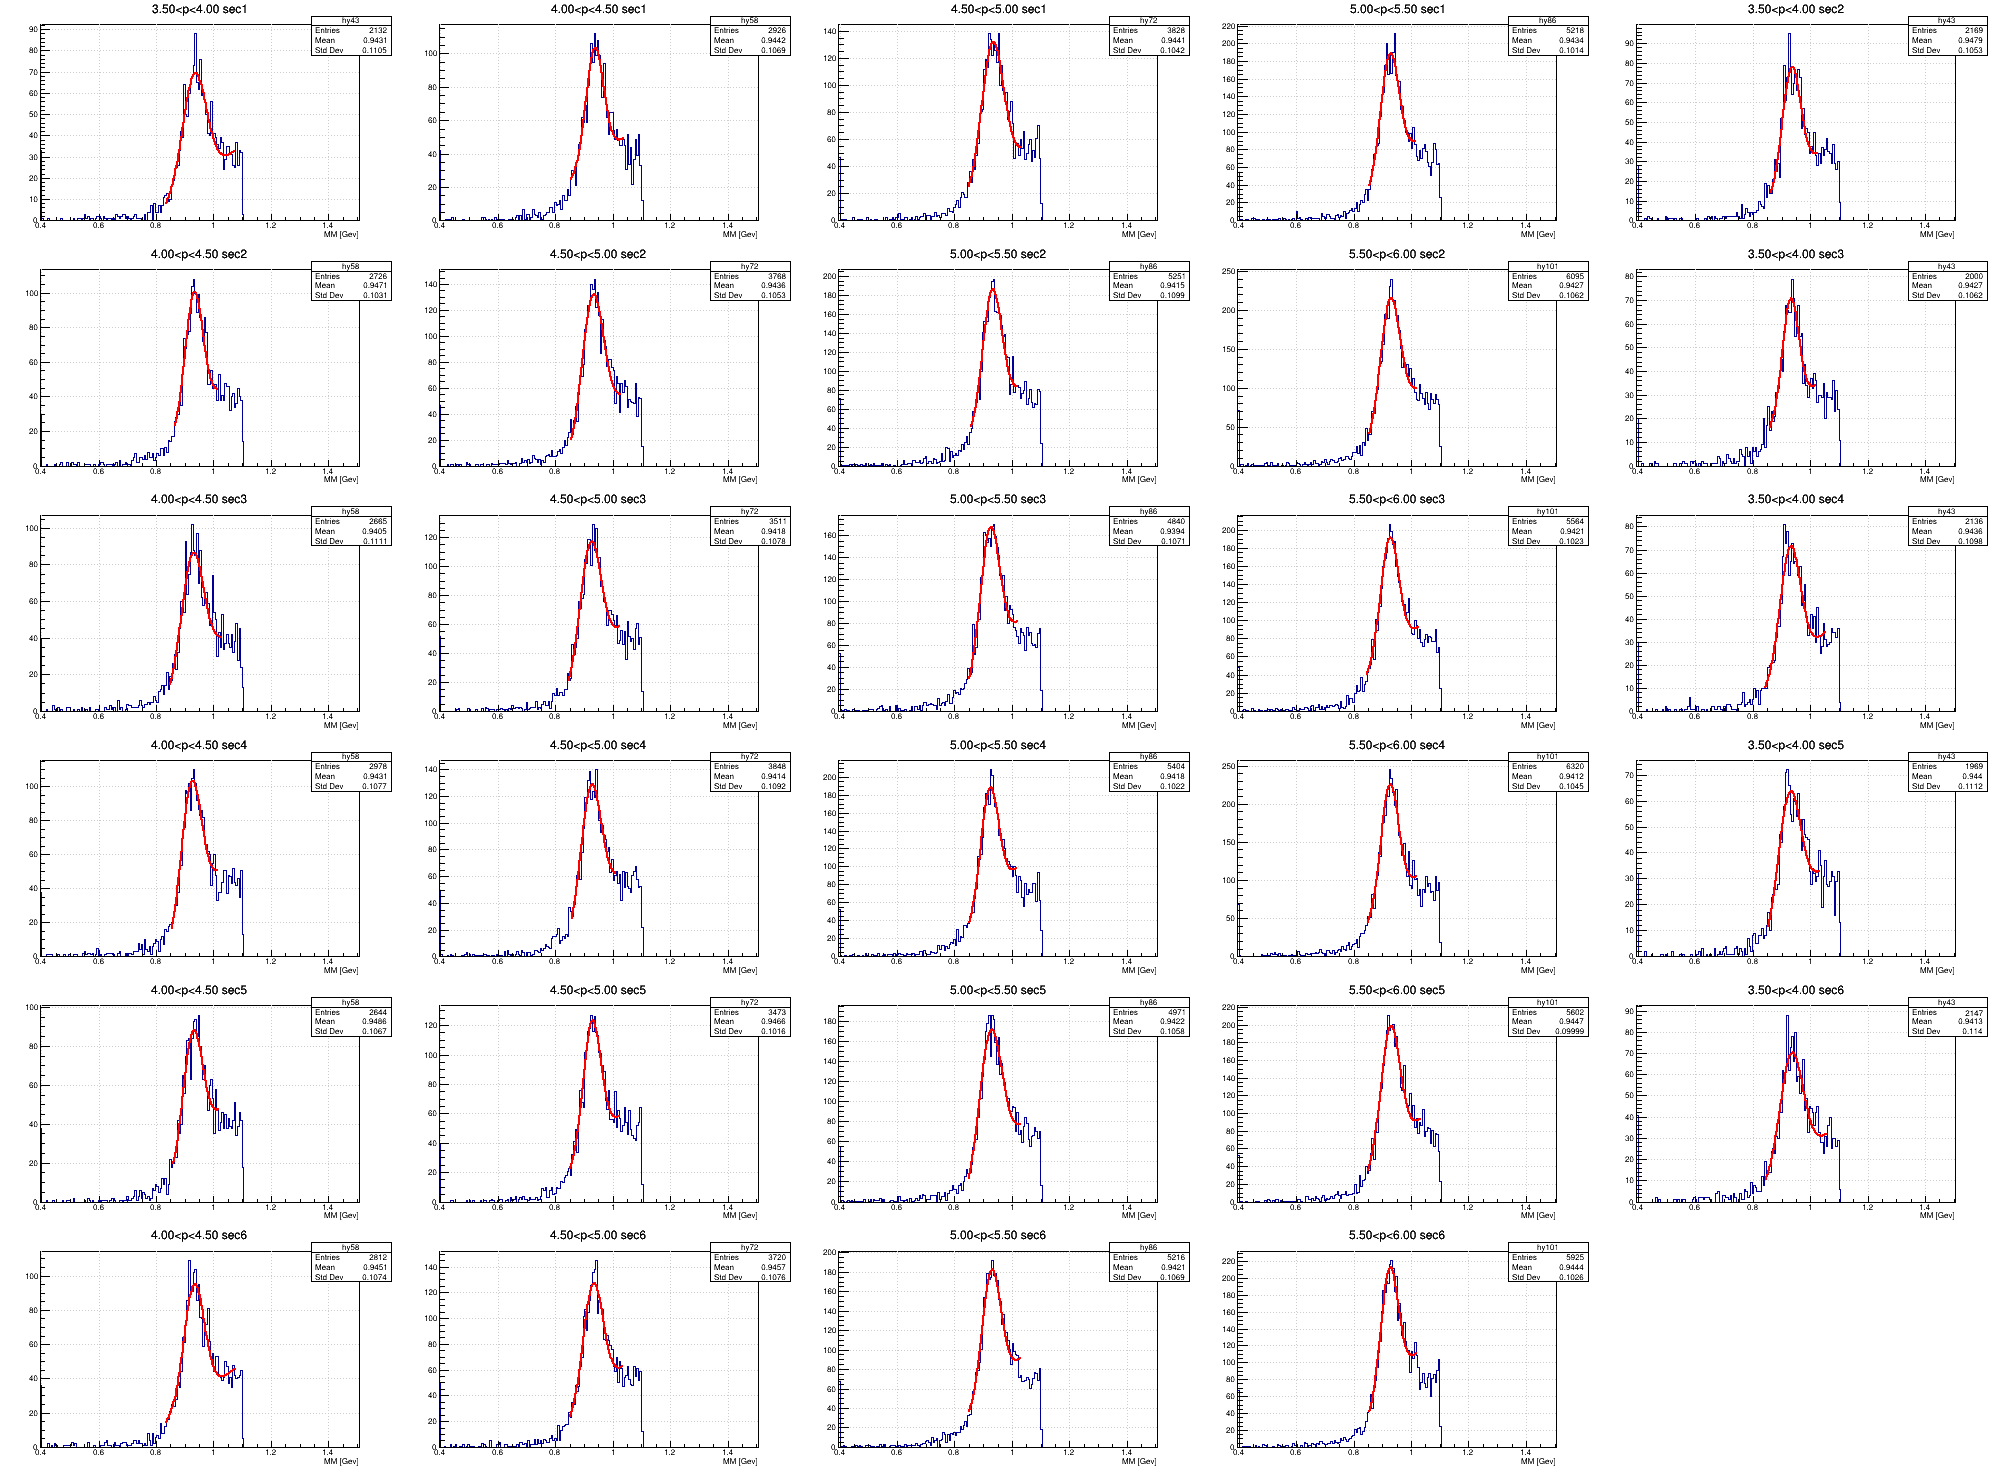

In [13]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,6,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E2e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+5)
    MMsec2E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E2e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+10)
    MMsec3E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E2e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+15)
    MMsec4E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E2e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+20)
    MMsec5E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E2e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+25)
    MMsec6E2e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E2e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

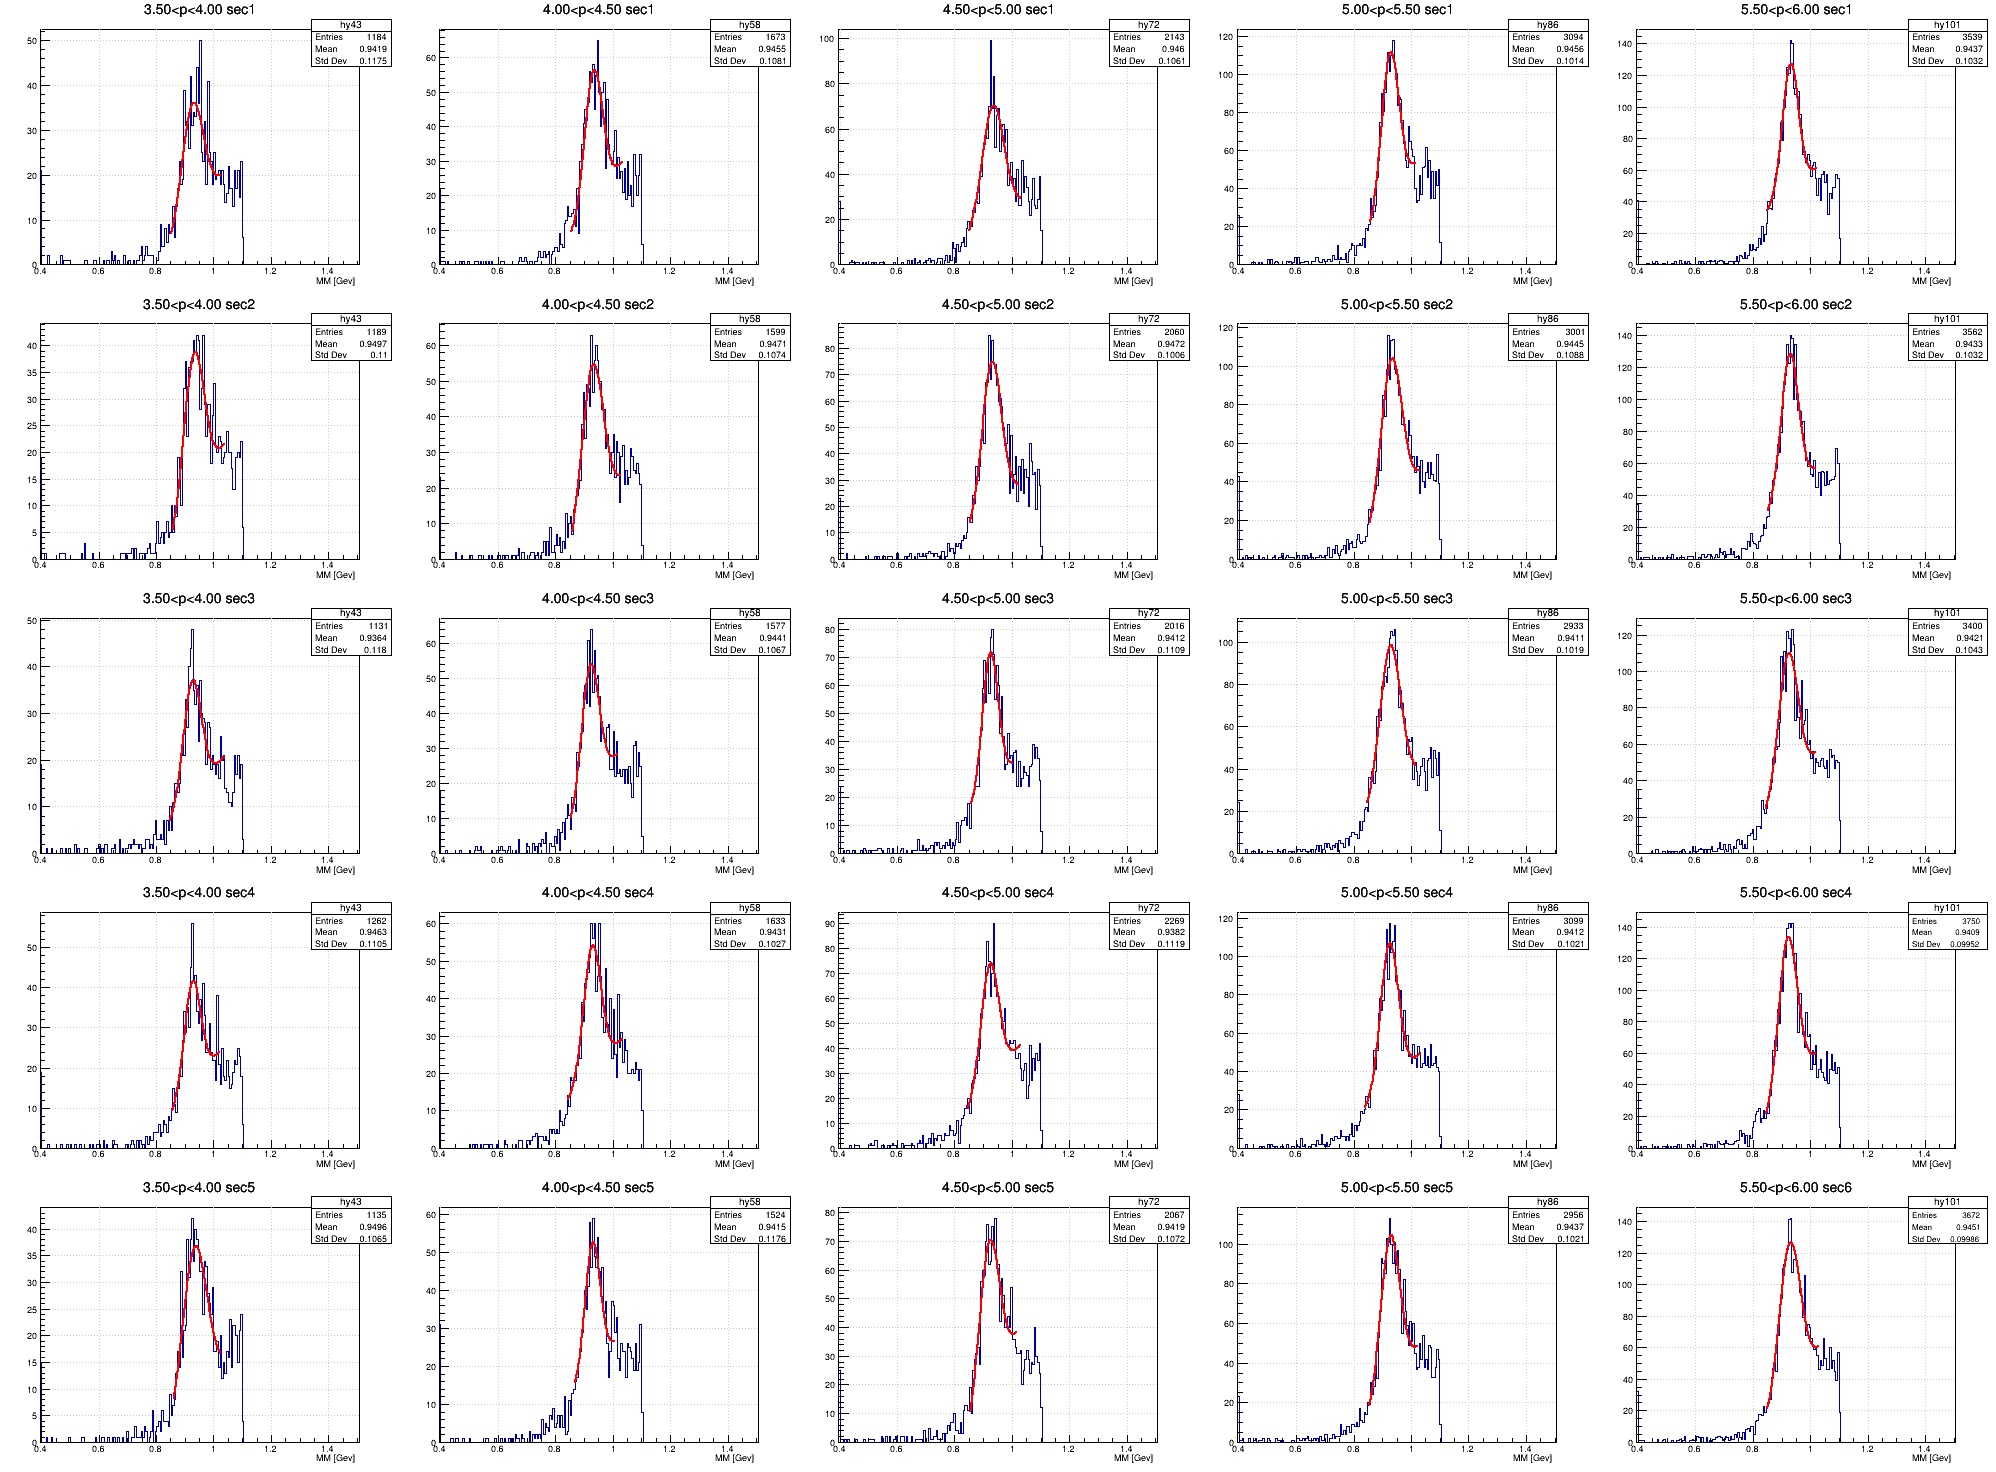

In [12]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(5,6,0.0001,0.0001)
c2.Draw()


for i in range(5):
    c2.cd(i+1)
    MMsec1E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec1E3e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+6)
    MMsec2E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec2E3e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+11)
    MMsec3E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec3E3e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+16)
    MMsec4E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec4E3e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+21)
    MMsec5E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec5E3e.hys[i].Draw()   
for i in range(5):
    c2.cd(i+26)
    MMsec6E3e.hys[i].GetXaxis().SetRangeUser(0,2)
    MMsec6E3e.hys[i].Draw()   
    
    
#c2.Print("pics/dp1d_1.png")

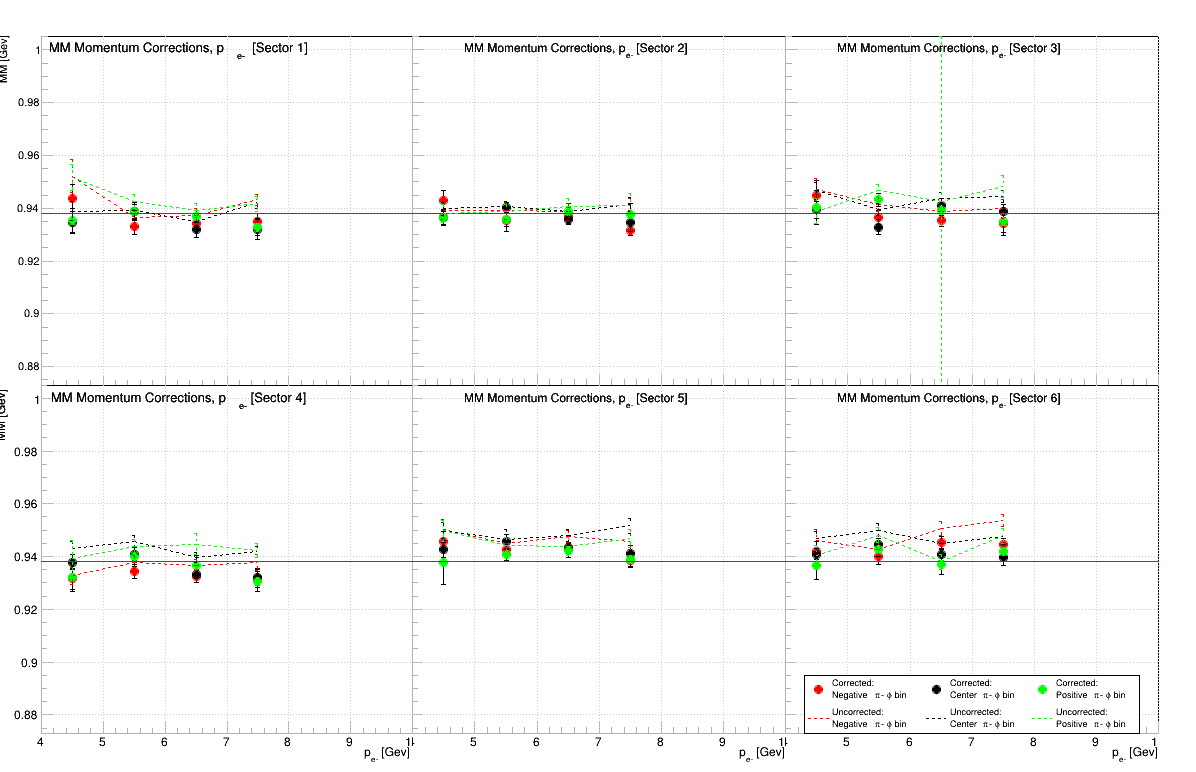

In [18]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.00, 0.00)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(4, 0.938, 10, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(hMMe[0][0].gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(hMMe[1][0].gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(hMMe[2][0].gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(hucMMe[0][0].gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(hucMMe[1][0].gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(hucMMe[2][0].gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")


count = 1

for j in range(0,6):
    c3.cd(count)
    hMMe[0][j].Draw("axis")
    hMMe[0][j].GetYaxis().SetRangeUser(0.88,1)
    #hMM[0][j].GetYaxis().SetRangeUser(0.8,1.1)
    hMMe[0][j].SetStats(False)
    hMMe[0][j].gr.SetMarkerColor(2)
    hMMe[0][j].gr.Draw("P")
    hMMe[1][j].gr.SetMarkerColor(1)
    hMMe[1][j].gr.Draw("P")
    hMMe[2][j].gr.SetMarkerColor(3)
    hMMe[2][j].gr.Draw("P")
    
    line.SetLineColor(2)
    line.Draw("")
    
    hucMMe[0][j].gr.SetLineStyle(2)
    hucMMe[0][j].gr.SetLineColor(2)
    hucMMe[0][j].gr.Draw("same")
    hucMMe[1][j].gr.SetLineStyle(2)
    hucMMe[1][j].gr.SetLineColor(1)
    hucMMe[1][j].gr.Draw("same")
    hucMMe[2][j].gr.SetLineStyle(2)
    hucMMe[2][j].gr.SetLineColor(3)
    hucMMe[2][j].gr.Draw("same")
    count +=1
    if j ==5:
        legend.Draw() 

In [2]:



def fit2d(h2,sec):
   #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,2,1), numpy.arange(2, 4.5,1)))
    print("xlims",xlims)
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.5,mx+0.5)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.3,mx+0.3)
        fy.SetParLimits(2,0.005,0.045)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1))
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)

MM1p = []
MM2p = []
MM3p = []
nbins = 100
sec1E1 = MMsec1.Filter("pimphi < -10 && pipsec == 1")
MM1p.append(sec1E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+}  [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec1E2 = MMsec1.Filter("pimphi > -10 && pimphi < 10 && pipsec == 1")
MM2p.append(sec1E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec1E3 = MMsec1.Filter("pimphi > 10 && pipsec == 1")
MM3p.append(sec1E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 1]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))

sec2E1 = MMsec2.Filter("pimphi < -10 && pipsec == 2")
MM1p.append(sec2E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec2E2 = MMsec2.Filter("pimphi > -10 && pimphi < 10 && pipsec == 2")
MM2p.append(sec2E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec2E3 = MMsec2.Filter("pimphi > 10 && pipsec == 2")
MM3p.append(sec2E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 2]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))

sec3E1 = MMsec3.Filter("pimphi < -10 && pipsec == 3")
MM1p.append(sec3E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec3E2 = MMsec3.Filter("pimphi > -10 && pimphi < 10 && pipsec == 3")
MM2p.append(sec3E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec3E3 = MMsec3.Filter("pimphi > 10 && pipsec == 3")
MM3p.append(sec3E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 3]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))

sec4E1 = MMsec4.Filter("pimphi < -10 && pipsec == 4")
MM1p.append(sec4E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi-} [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec4E2 = MMsec4.Filter("pimphi > -10 && pimphi < 10 && pipsec == 4")
MM2p.append(sec4E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec4E3 = MMsec4.Filter("pimphi > 10 && pipsec == 4")
MM3p.append(sec4E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 4]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))


sec5E1 = MMsec5.Filter("pimphi < -10 && pipsec == 5")
MM1p.append(sec5E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec5E2 = MMsec5.Filter("pimphi > -10 && pimphi < 10 && pipsec == 5")
MM2p.append(sec5E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec5E3 = MMsec5.Filter("pimphi > 10 && pipsec == 5")
MM3p.append(sec5E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 5]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))

sec6E1 = MMsec6.Filter("pimphi < -10 && pipsec == 6")
MM1p.append(sec6E1.Histo2D(("hpth","MM Momentum Corrections, p_{#pi+} [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec6E2 = MMsec6.Filter("pimphi > -10 && pimphi < 10 && pipsec == 6")
MM2p.append(sec6E2.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))
sec6E3 = MMsec6.Filter("pimphi >10 && pipsec == 6")
MM3p.append(sec6E3.Histo2D(("hpth","MM Momentum Corrections #pi+ [Sector 6]  ;p_{#pi+} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pipPC","eppxMC"))




hMMp = [MM1p,MM2p,MM3p]
for i in hMMp:
    count= 1
    for j in i:
        if count ==3:
            fit2d(j,count)
        else:
            fit2d(j,count)
        count +=1
        

ucMM1p = []
ucMM2p = []
ucMM3p = []

ucMM1p.append(sec1E1.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec1E2.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec1E3.Histo2D(("hpth","MM Momentum #pi- [Sector 1]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))


ucMM1p.append(sec2E1.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec2E2.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec2E3.Histo2D(("hpth","MM Momentum #pi- [Sector 2]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))

ucMM1p.append(sec3E1.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec3E2.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec3E3.Histo2D(("hpth","MM Momentum #pi- [Sector 3]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))

ucMM1p.append(sec4E1.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec4E2.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec4E3.Histo2D(("hpth","MM Momentum #pi- [Sector 4]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))


ucMM1p.append(sec5E1.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec5E2.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec5E3.Histo2D(("hpth","MM Momentum #pi- [Sector 5]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))

ucMM1p.append(sec6E1.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM2p.append(sec6E2.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))
ucMM3p.append(sec6E3.Histo2D(("hpth","MM Momentum #pi- [Sector 6]  ;p_{#pi-} [Gev];MM [Gev]",nbins,0.5,4,nbins,0.4,1.5),"pimPC","eppxM"))




hucMMp = [ucMM1p,ucMM2p,ucMM3p]
for i in hucMMp:
    count= 1
    for j in i:
        fit2d(j,count)
        count +=1

xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3.  4. ]
xlims [0.5 1.5 2.  3

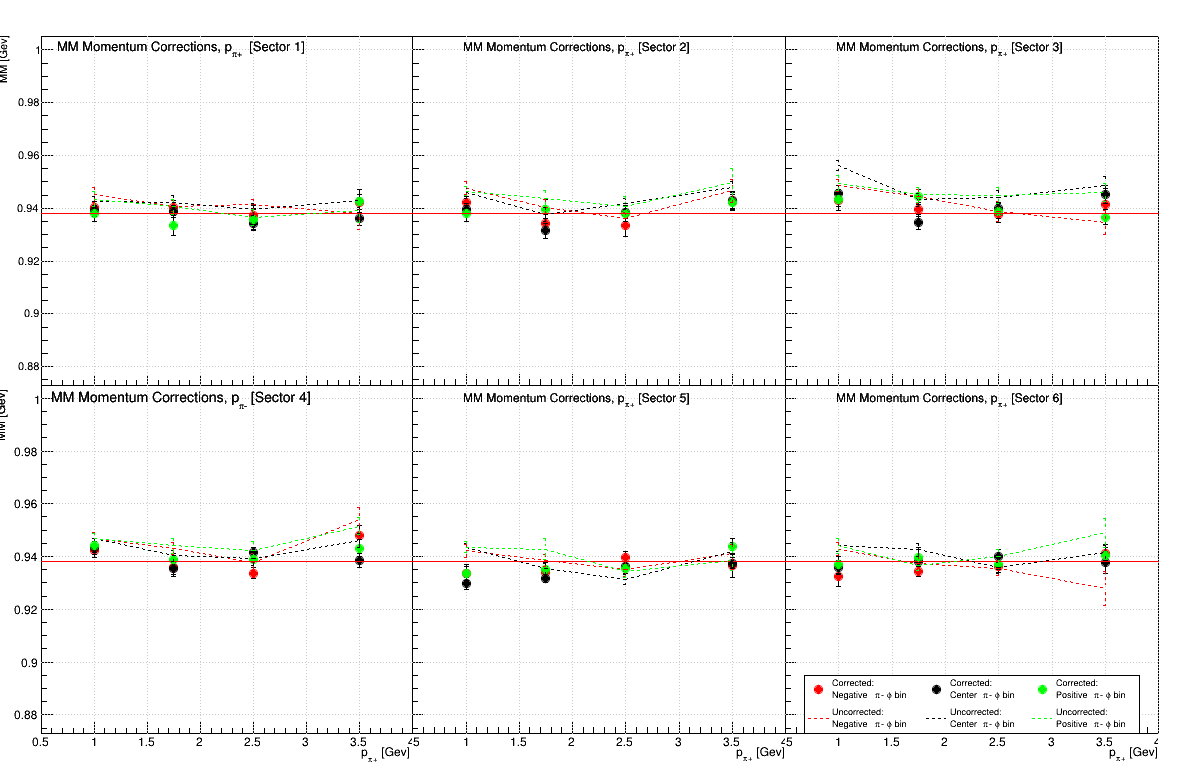

In [4]:
c3 = ROOT.TCanvas("c1","Inbending",1200,800)
c3.Divide(3, 2, 0.00, 0.00)
c3.SetGrid()
ROOT.gStyle.SetAxisColor(16,'xy')
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.45)
ROOT.gStyle.SetLegendTextSize(0.0275)
c3.Draw()

line =  ROOT.TLine(0.5, 0.938, 4, 0.938)

#legend = ROOT.TLegend(0.6,0.7,0.9,0.9);
legend = ROOT.TLegend(0.05, 0.25, 0.95, 0.1)
legend.SetNColumns(3)
legend.AddEntry(hMMp[0][0].gr,"#splitline{Corrected:}{Negative #pi- #phi bin}","P")
legend.AddEntry(hMMp[1][0].gr,"#splitline{Corrected:}{Center #pi- #phi bin}","P")
legend.AddEntry(hMMp[2][0].gr,"#splitline{Corrected:}{Positive #pi- #phi bin}","P")
legend.AddEntry(hucMMp[0][0].gr,"#splitline{Uncorrected:}{Negative #pi- #phi bin}","l")
legend.AddEntry(hucMMp[1][0].gr,"#splitline{Uncorrected:}{Center #pi- #phi bin}","l")
legend.AddEntry(hucMMp[2][0].gr,"#splitline{Uncorrected:}{Positive #pi- #phi bin}","l")


count = 1

for j in range(0,6):
    c3.cd(count)
    hMMp[0][j].Draw("axis")
    hMMp[0][j].GetYaxis().SetRangeUser(0.88,1)
    #hMM[0][j].GetYaxis().SetRangeUser(0.8,1.1)
    hMMp[0][j].SetStats(False)
    hMMp[0][j].gr.SetMarkerColor(2)
    hMMp[0][j].gr.Draw("P")
    hMMp[1][j].gr.SetMarkerColor(1)
    hMMp[1][j].gr.Draw("P")
    hMMp[2][j].gr.SetMarkerColor(3)
    hMMp[2][j].gr.Draw("P")
    
    line.SetLineColor(2)
    line.Draw("")
    
    hucMMp[0][j].gr.SetLineStyle(2)
    hucMMp[0][j].gr.SetLineColor(2)
    hucMMp[0][j].gr.Draw("same")
    hucMMp[1][j].gr.SetLineStyle(2)
    hucMMp[1][j].gr.SetLineColor(1)
    hucMMp[1][j].gr.Draw("same")
    hucMMp[2][j].gr.SetLineStyle(2)
    hucMMp[2][j].gr.SetLineColor(3)
    hucMMp[2][j].gr.Draw("same")
    count +=1
    if j ==5:
        legend.Draw() 

## delta P Correction

In [3]:
%reset -f 
import ROOT, numpy

ROOT.gStyle.SetOptFit(1)
ROOT.gStyle.SetGridColor(17)
ROOT.gStyle.SetPadGridX(1)
ROOT.gStyle.SetPadGridY(1)

#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/skim8_005*")
#rdf = ROOT.RDataFrame("h22","/volatile/clas12/kenjo/ntuple_epippimp/inb/lvl1_eppimpip.skim4_005*")
#fname = "/lustre19/expphy/volatile/clas12/trotta/wagon/RhoWagon/PyAnalysis/data/inb/epPipPim.inb.qa.nSidis_005*"



fname = "/volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005*"
    


rdf = ROOT.RDataFrame("h22",fname)


rdf = rdf.Define("vals","""
auto ele = ROOT::Math::PxPyPzMVector(ex,ey,ez,0);
auto pip = ROOT::Math::PxPyPzMVector(pipx,pipy,pipz,0.1395);
auto pim = ROOT::Math::PxPyPzMVector(pimx,pimy,pimz,0.1395);
auto beam = ROOT::Math::PxPyPzMVector(0,0,10.6041,0);
auto targ = ROOT::Math::PxPyPzMVector(0,0,0,0.938);

 auto dppC = [&](float Px, float Py, float Pz, int sec, int ivec){

        // ivec = 0 --> Electron Corrections
        // ivec = 1 --> π+ Corrections
        // ivec = 2 --> π- Corrections (NOT UPDATED YET)
        // ivec = 3 --> Proton Corrections (NOT UPDATED YET)

        // Momentum Magnitude
        double pp = sqrt(Px*Px + Py*Py + Pz*Pz);

        // Initializing the correction factor
        double dp = 0;

        // Defining Phi Angle
        double Phi = (180/3.1415926)*atan2(Py, Px);

        // (Initial) Shift of the Phi Angle (done to realign sectors whose data is separated when plotted from ±180˚)
        if(((sec == 4 || sec == 3) && Phi < 0) || (sec > 4 && Phi < 90)){
            Phi += 360;
        }

        // Getting Local Phi Angle
        double PhiLocal = Phi - (sec - 1)*60;

        // Applying Shift Functions to Phi Angles (local shifted phi = phi)
        double phi = PhiLocal;

        // For Electron Shift
        if(ivec == 0){
            phi = PhiLocal - 30/pp;
        }

        // For π+ Pion/Proton Shift
        if(ivec == 1 || ivec == 3){
            phi = PhiLocal + (32/(pp-0.05));
        }

        // For π- Pion Shift
        if(ivec == 2){
            phi = PhiLocal - (32/(pp-0.05));
        }
        
           //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //==================================================================================================================================//
        //=======================//=======================//     Electron Corrections     //=======================//=======================//
        //==================================================================================================================================//
        //////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////

        if(ivec == 0){
            if(sec == 1){
                dp =     ((1.3189e-06)*phi*phi +  (4.26057e-05)*phi +  (-0.002322628))*pp*pp +  ((-1.1409e-05)*phi*phi +    (2.2188e-05)*phi + (0.02878927))*pp +   ((2.4950e-05)*phi*phi +   (1.6170e-06)*phi + (-0.061816275));
            }
            if(sec == 2){
                dp =    ((-2.9240e-07)*phi*phi +   (3.2448e-07)*phi +  (-0.001848308))*pp*pp +   ((4.4500e-07)*phi*phi +   (4.76324e-04)*phi + (0.02219469))*pp +   ((6.9220e-06)*phi*phi +  (-0.00153517)*phi + (-0.0479058));
            }
            if(sec == 3){
                dp =    ((2.71911e-06)*phi*phi + (1.657148e-05)*phi +  (-0.001822211))*pp*pp + ((-4.96814e-05)*phi*phi + (-3.761117e-04)*phi + (0.02564148))*pp +  ((1.97748e-04)*phi*phi +  (9.58259e-04)*phi + (-0.05818292));
            }
            if(sec == 4){
                dp =    ((1.90966e-06)*phi*phi +  (-2.4761e-05)*phi +   (-0.00231562))*pp*pp +  ((-2.3927e-05)*phi*phi +   (2.25262e-04)*phi +  (0.0291831))*pp +   ((8.0515e-05)*phi*phi + (-6.42098e-04)*phi + (-0.06159197));
            }
            if(sec == 5){
                dp = ((-3.6760323e-06)*phi*phi +  (4.04398e-05)*phi + (-0.0021967515))*pp*pp +  ((4.90857e-05)*phi*phi +  (-4.37437e-04)*phi + (0.02494339))*pp + ((-1.08257e-04)*phi*phi +   (0.00146111)*phi + (-0.0648485));
            }
            if(sec == 6){
                dp =    ((-6.2488e-08)*phi*phi +  (2.23173e-05)*phi +   (-0.00227522))*pp*pp +   ((1.8372e-05)*phi*phi +   (-7.5227e-05)*phi +   (0.032636))*pp +  ((-6.6566e-05)*phi*phi +  (-2.4450e-04)*phi + (-0.072293));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //======================//======================//     Electron Corrections (End)     //======================//======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        


        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//     π+ Corrections     //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        if(ivec == 1){
            if(sec == 1){
                dp =   ((-1.7334e-06)*phi*phi +  (1.45112e-05)*phi +  (0.00150721))*pp*pp +    ((6.6234e-06)*phi*phi + (-4.81191e-04)*phi +  (-0.0138695))*pp + ((-3.23625e-06)*phi*phi +   (2.79751e-04)*phi + (0.027726));
            }
            if(sec == 2){
                dp = ((-4.475464e-06)*phi*phi + (-4.11573e-05)*phi +  (0.00204557))*pp*pp +  ((2.468278e-05)*phi*phi +   (9.3590e-05)*phi +   (-0.015399))*pp + ((-1.61547e-05)*phi*phi +   (-2.4206e-04)*phi + (0.0231743));
            }
            if(sec == 3){
                dp =   ((-8.0374e-07)*phi*phi +   (2.8728e-06)*phi +  (0.00152163))*pp*pp +    ((5.1347e-06)*phi*phi +  (3.71709e-04)*phi +  (-0.0165735))*pp +   ((4.0105e-06)*phi*phi + (-5.289869e-04)*phi + (0.02175395));
            }
            if(sec == 4){
                dp =   ((-3.8790e-07)*phi*phi + (-4.78445e-05)*phi + (0.002324725))*pp*pp +   ((6.80543e-06)*phi*phi +  (5.69358e-04)*phi +  (-0.0199162))*pp + ((-1.30264e-05)*phi*phi +  (-5.91606e-04)*phi + (0.03202088));
            }
            if(sec == 5){
                dp =  ((2.198518e-06)*phi*phi + (-1.52535e-05)*phi + (0.001187761))*pp*pp + ((-1.000264e-05)*phi*phi +  (1.63976e-04)*phi + (-0.01429673))*pp +   ((9.4962e-06)*phi*phi +  (-3.86691e-04)*phi + (0.0303695));
            }
            if(sec == 6){
                dp =  ((-3.92944e-07)*phi*phi +  (1.45848e-05)*phi +  (0.00120668))*pp*pp +    ((3.7899e-06)*phi*phi + (-1.98219e-04)*phi +  (-0.0131312))*pp +  ((-3.9961e-06)*phi*phi +  (-1.32883e-04)*phi + (0.0294497));
            }
        }

        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=========================//=========================//  π+ Corrections (End)  //=========================//=========================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        
      
      
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //==================//==================//    π- Corrections (Updated as of 01-13-2023)    //==================//==================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        

       
        if(ivec == 2){
            if(sec == 1){
                 //dp = (7.8044E-06*phi*phi + -9.4703E-05*phi + 4.6696E-03)*pp*pp +(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02;  
                 dp = (7.8044E-06*phi*phi + -9.4703E-05*phi + 4.6696E-03)*pp*pp +(-3.4668E-05*phi*phi + 6.2280E-04*phi + -2.4273E-02)*pp + 2.3566E-05*phi*phi + -5.8519E-04*phi + 3.9226E-02;
            
            }
            if(sec == 2){
                dp =(-4.6611E-06*phi*phi + -8.1637E-05*phi + 7.5013E-03)*pp*pp +(1.7616E-05*phi*phi + 3.5439E-04*phi + -3.7122E-02)*pp  + -1.6286E-05*phi*phi + -2.6545E-04*phi + 4.5659E-02;
            
            }

            if(sec == 3){
                dp =(4.5270E-06*phi*phi + 2.2578E-04*phi + 5.9214E-03)*pp*pp +(-1.6419E-05*phi*phi + -8.1776E-04*phi + -3.2776E-02)*pp  + 1.3734E-05*phi*phi + 6.6125E-04*phi + 4.5784E-02;
            }

            if(sec == 4){
                dp =(-1.3141E-06*phi*phi + 1.9648E-04*phi + 7.6109E-03-0.006)*pp*pp +(8.0912E-06*phi*phi + -8.2672E-04*phi + -4.0495E-02+0.03)*pp  + -3.1380E-06*phi*phi + 6.2211E-04*phi + 5.3361E-02-0.04;

            }

            if(sec == 5){
                dp =(-5.4065E-06*phi*phi + -1.6325E-05*phi + 1.2269E-02-0.002)*pp*pp +(1.9512E-05*phi*phi + 1.0228E-04*phi + -6.2351E-02+0.01)*pp  + -9.5023E-06*phi*phi + -3.7997E-05*phi + 7.1061E-02-0.02;
            
            }

            if(sec == 6){
                dp =(-1.1882E-05*phi*phi + 2.0101E-04*phi + 1.1635E-02-0.01)*pp*pp +(5.8488E-05*phi*phi + -6.4709E-04*phi + -5.3833E-02+0.05)*pp  + -4.4462E-05*phi*phi + 3.7529E-04*phi + 6.2130E-02-0.06;
            
            }
        }
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        //====================================================================================================================================//
        //=======================//=======================//      π- Corrections (End)      //=======================//=======================//
        //====================================================================================================================================//
        ////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////////
        
        
        




        return dp/pp;
    };
auto fe = dppC(ex, ey, ez, esec, 0) + 1;
auto fpip = dppC(pipx, pipy, pipz, pipsec, 1) + 1;
auto fpim = dppC(pimx, pimy, pimz, pimsec, 2) + 1;

    
auto eleC = ROOT::Math::PxPyPzMVector(ex*fe, ey*fe, ez*fe, 0);
auto pipC = ROOT::Math::PxPyPzMVector(pipx*fpip, pipy*fpip, pipz*fpip, 0.13957);
auto pimC = ROOT::Math::PxPyPzMVector(pimx*fpim, pimy*fpim, pimz*fpim, 0.13957);

   

double pimPh = pimC.Phi()*TMath::RadToDeg();

if(((pimsec == 4 || pimsec == 3) && pimPh < 0) || (pimsec > 4 && pimPh < 90)){
          pimPh = pimC.Phi()*TMath::RadToDeg()+360;
    }


pimPh = pimPh- (pimsec - 1)*60;


auto pimPhi = pimPh - (32/(pim.P()-0.05));





auto TbeamPim = ROOT::Math::VectorUtil::Angle(beam,pimC);
auto TelePim = ROOT::Math::VectorUtil::Angle(eleC,pimC);
auto TpipPim = ROOT::Math::VectorUtil::Angle(pipC,pimC);
auto TbeamEle = ROOT::Math::VectorUtil::Angle(eleC,beam);
auto TbeamPip = ROOT::Math::VectorUtil::Angle(beam,pipC);
auto TelePip = ROOT::Math::VectorUtil::Angle(eleC,pipC);

auto K = 2*(eleC.E()+pipC.E()-beam.E()-targ.E());
auto Q = 2*(beam.P()*cos(TbeamPim)-eleC.P()*cos(TelePim)-pipC.P()*cos(TpipPim));
auto W1 = (pipC.M()*pipC.M()+pim.M()*pim.M()-2*beam.E()*eleC.E()+2*beam.P()*eleC.P()*cos(TbeamEle)-2*pipC.E()*beam.E()+2*beam.P()*pipC.P()*cos(TbeamPip));
auto W2 = -2*targ.E()*eleC.E()-2*targ.E()*pipC.E()+2*targ.E()*beam.E()+2*eleC.E()*pipC.E()-2*eleC.P()*pipC.P()*cos(TelePip);
auto W = W1+W2;


auto A = Q*Q-K*K;
auto B = 2*Q*W;
auto C = W*W - (pim.M()*pim.M())*(K*K);


auto pimP1 = (-B+sqrt(B*B-4*A*C))/(2*A);
auto pimP2 = (-B-sqrt(B*B-4*A*C))/(2*A);


auto ppPim = pim.P();
double dppim;



auto dp =pimP1- pimC.P();

if(abs(pimP1 - pimC.P()) > abs(pimP2 - pimC.P())){
    dp = pimP2- pimC.P();
}

if(abs(pimP1 - pimC.P()) < abs(pimP2 - pimC.P())){
    dp =pimP1 - pimC.P();
    
} 


auto ePipPimX = beam + targ - eleC- pip - pim;
auto ePipPimXC = beam + targ - eleC - pipC - pimC;



std::vector<double> vals = {ePipPimXC.M(),dp, pimC.P(),pimPhi};
return vals;
""")


rdf = rdf.Define("eppxMC","vals[0]")
rdf = rdf.Define("dp","vals[1]")
rdf = rdf.Define("pimP","vals[2]")
rdf = rdf.Define("pimphi","vals[3]")




def fit2d(h2,sec,bins):
    #xlims = numpy.concatenate((numpy.arange(0.4, 1.5, 0.15), numpy.arange(1.5, 3.1, 0.3)))
    xlims = numpy.concatenate((numpy.arange(0.5,3.5,0.5), numpy.arange(3.5, 4, 0.5)))
    #xlims = numpy.arange(4,7,0.5)
    gx = h2.GetXaxis()
    hys = []
    gr = ROOT.TGraphErrors()
    #gr.SetMarkerSize(2)
    gr.SetMarkerStyle(20)
    for x1,x2 in zip(xlims[:-1], xlims[1:]): 
        ib1,ib2 = gx.FindBin(x1), gx.FindBin(x2)
        hy = h2.ProjectionY(f"hy{ib1}",ib1,ib2)
        hy.SetDirectory(0)
        hys.append(hy)
        mx = hy.GetBinCenter(hy.GetMaximumBin())
        fy = ROOT.TF1("fy","gaus(0)+pol1(3)",mx-0.75,mx+0.75)
        fy.SetParameters(1,mx,0.1,1,1)
        fy.SetParLimits(0,0,1e7)
        fy.SetParLimits(1,mx-0.2,mx+0.2)
        #fy.SetParLimits(2,0.005,0.02)
        hy.Fit(fy,"QR")
        mu,sig = fy.GetParameter(1),fy.GetParameter(2)
        fy.SetRange(mu-2*sig, mu+2*sig)
        hy.Fit(fy,"QR")
        hy.SetTitle("{:.2f}<p<{:.2f} sec{:.0f}".format(x1,x2,sec))
        gr.SetPoint(gr.GetN(), x1/2+x2/2, fy.GetParameter(1))
        #gr.SetPointError(gr.GetN()-1, 0, fy.GetParError(1)) 
        gr.SetPointError(gr.GetN()-1, 0, 0.05) 
        hy.Fit(fy,"QR")
    setattr(h2,"hys",hys)
    setattr(h2,"gr",gr)
    fdp = ROOT.TF1("fdp","pol2(0)",0.5,4)
    fdp.SetParameters(0,0,0)
    setattr(h2,"fdp",fdp)
    if bins == 1:
        fdp.SetLineColor(2)
    elif bins ==2:
        fdp.SetLineColor(1)
    else:
         fdp.SetLineColor(3)
    gr.Fit(fdp, "QR")
    
    
MMsec1  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05")
MMsec2  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec3  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec4  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec5  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")
MMsec6  = rdf.Filter("eppxMC >  0.8 && eppxMC <  1.05 ")

nbins = 350#350


d11 = MMsec1.Filter("pimsec == 1 && pimphi < -10")
dpp11 = d11.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d12 = MMsec1.Filter("pimsec == 1 && pimphi > -10 && pimphi < 10")
dpp12 = d12.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d13 = MMsec1.Filter("pimsec == 1 && pimphi > 10")
dpp13 = d13.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d21 = MMsec2.Filter("pimsec == 2 && pimphi < -10")
dpp21 = d21.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d22 = MMsec2.Filter("pimsec == 2 && pimphi > -10 && pimphi < 10")
dpp22 = d22.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d23 = MMsec2.Filter("pimsec == 2 && pimphi > 10")
dpp23 = d23.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 2 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")


d31 = MMsec3.Filter("pimsec == 3 && pimphi < -10")
dpp31 = d31.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d32 = MMsec3.Filter("pimsec == 3 && pimphi > -10 && pimphi < 10")
dpp32 = d32.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d33 = MMsec3.Filter("pimsec == 3 && pimphi > 10")
dpp33 = d33.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 3 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d41 = MMsec4.Filter("pimsec == 4 && pimphi < -10")
dpp41 = d41.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d42 = MMsec4.Filter("pimsec == 4 && pimphi > -10 && pimphi < 10")
dpp42 = d42.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d43 = MMsec4.Filter("pimsec == 4 && pimphi > 10")
dpp43 = d43.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 4 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d51 = MMsec5.Filter("pimsec == 5 && pimphi < -10")
dpp51 = d51.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 5 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d52 = MMsec5.Filter("pimsec == 5 && pimphi > -10 && pimphi < 10")
dpp52 = d52.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 1 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d53 = MMsec5.Filter("pimsec == 5 && pimphi > 10")
dpp53 = d53.Histo2D(("hpth","#DeltaP vs P for #pi- (sec5phi >10);p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")

d61 = MMsec6.Filter("pimsec == 6 && pimphi < -10")
dpp61 = d61.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi < -10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d62 = MMsec6.Filter("pimsec == 6 && pimphi > -10 && pimphi < 10")
dpp62 = d62.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{-10 < #phi < 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")
d63 = MMsec6.Filter("pimsec == 6 && pimphi > 10")
dpp63 = d63.Histo2D(("hpth","#splitline{#DeltaP vs P for #pi- [Sector 6 ]}{#phi > 10};p#pi-;#DeltaP",nbins,0,8,nbins,-5,5),"pimP","dp")



fit2d(dpp11,1,1)
fit2d(dpp21,2,1)
fit2d(dpp31,3,1)
fit2d(dpp41,4,1)
fit2d(dpp51,5,1)
fit2d(dpp61,6,1)

fit2d(dpp12,1,2)
fit2d(dpp22,2,2)
fit2d(dpp32,3,2)
fit2d(dpp42,4,2)
fit2d(dpp52,5,2)
fit2d(dpp62,6,2)



fit2d(dpp13,1,3)
fit2d(dpp23,2,3)
fit2d(dpp33,3,3)
fit2d(dpp43,4,3)
fit2d(dpp53,5,3)
fit2d(dpp63,6,3)




Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005440.evio.00150-00154.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005441.evio.00570-00574.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005442.evio.00075-00079.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005443.evio.00110-00114.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/clas12/trotta/Momentum/Nov2022MomCorr/outData/epPipPim.outb.qa.rec_clas_005444.evio.00330-00334.hipo.root
Error in <TChain::LoadTree>: Cannot find tree with name h22 in file /volatile/cl

In [ ]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp11.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp11.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp21.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp21.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp31.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp31.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp41.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp41.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp51.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp51.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp61.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp61.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi1_1d.png")

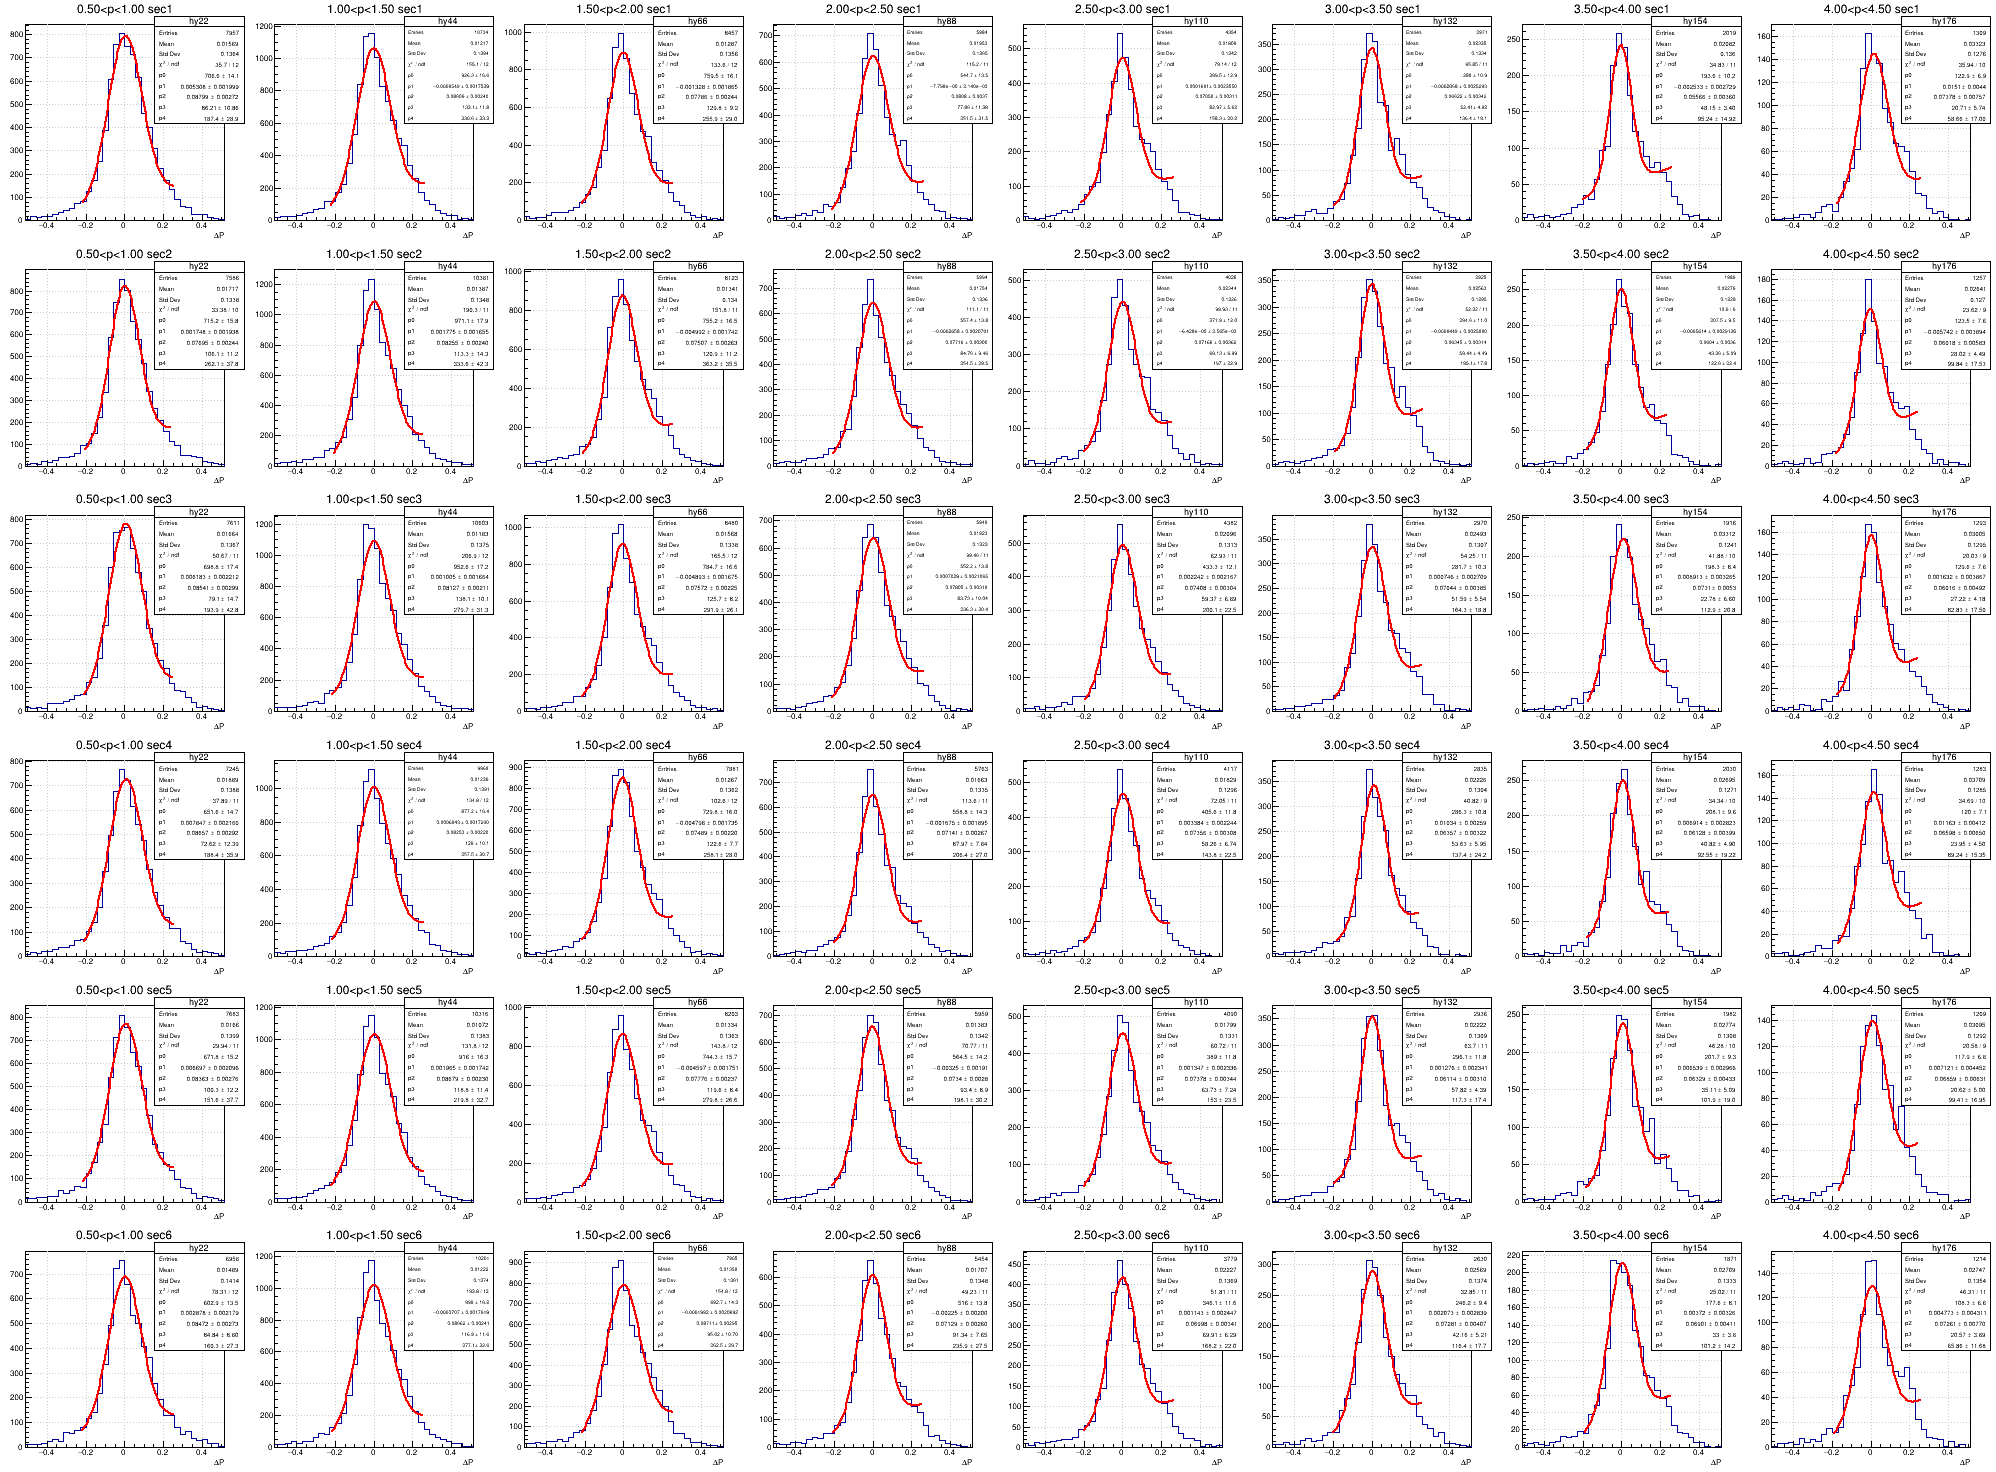

In [16]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp12.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp12.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp22.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp22.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp32.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp32.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp42.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp42.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp52.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp52.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp62.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp62.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi2_1d.png")

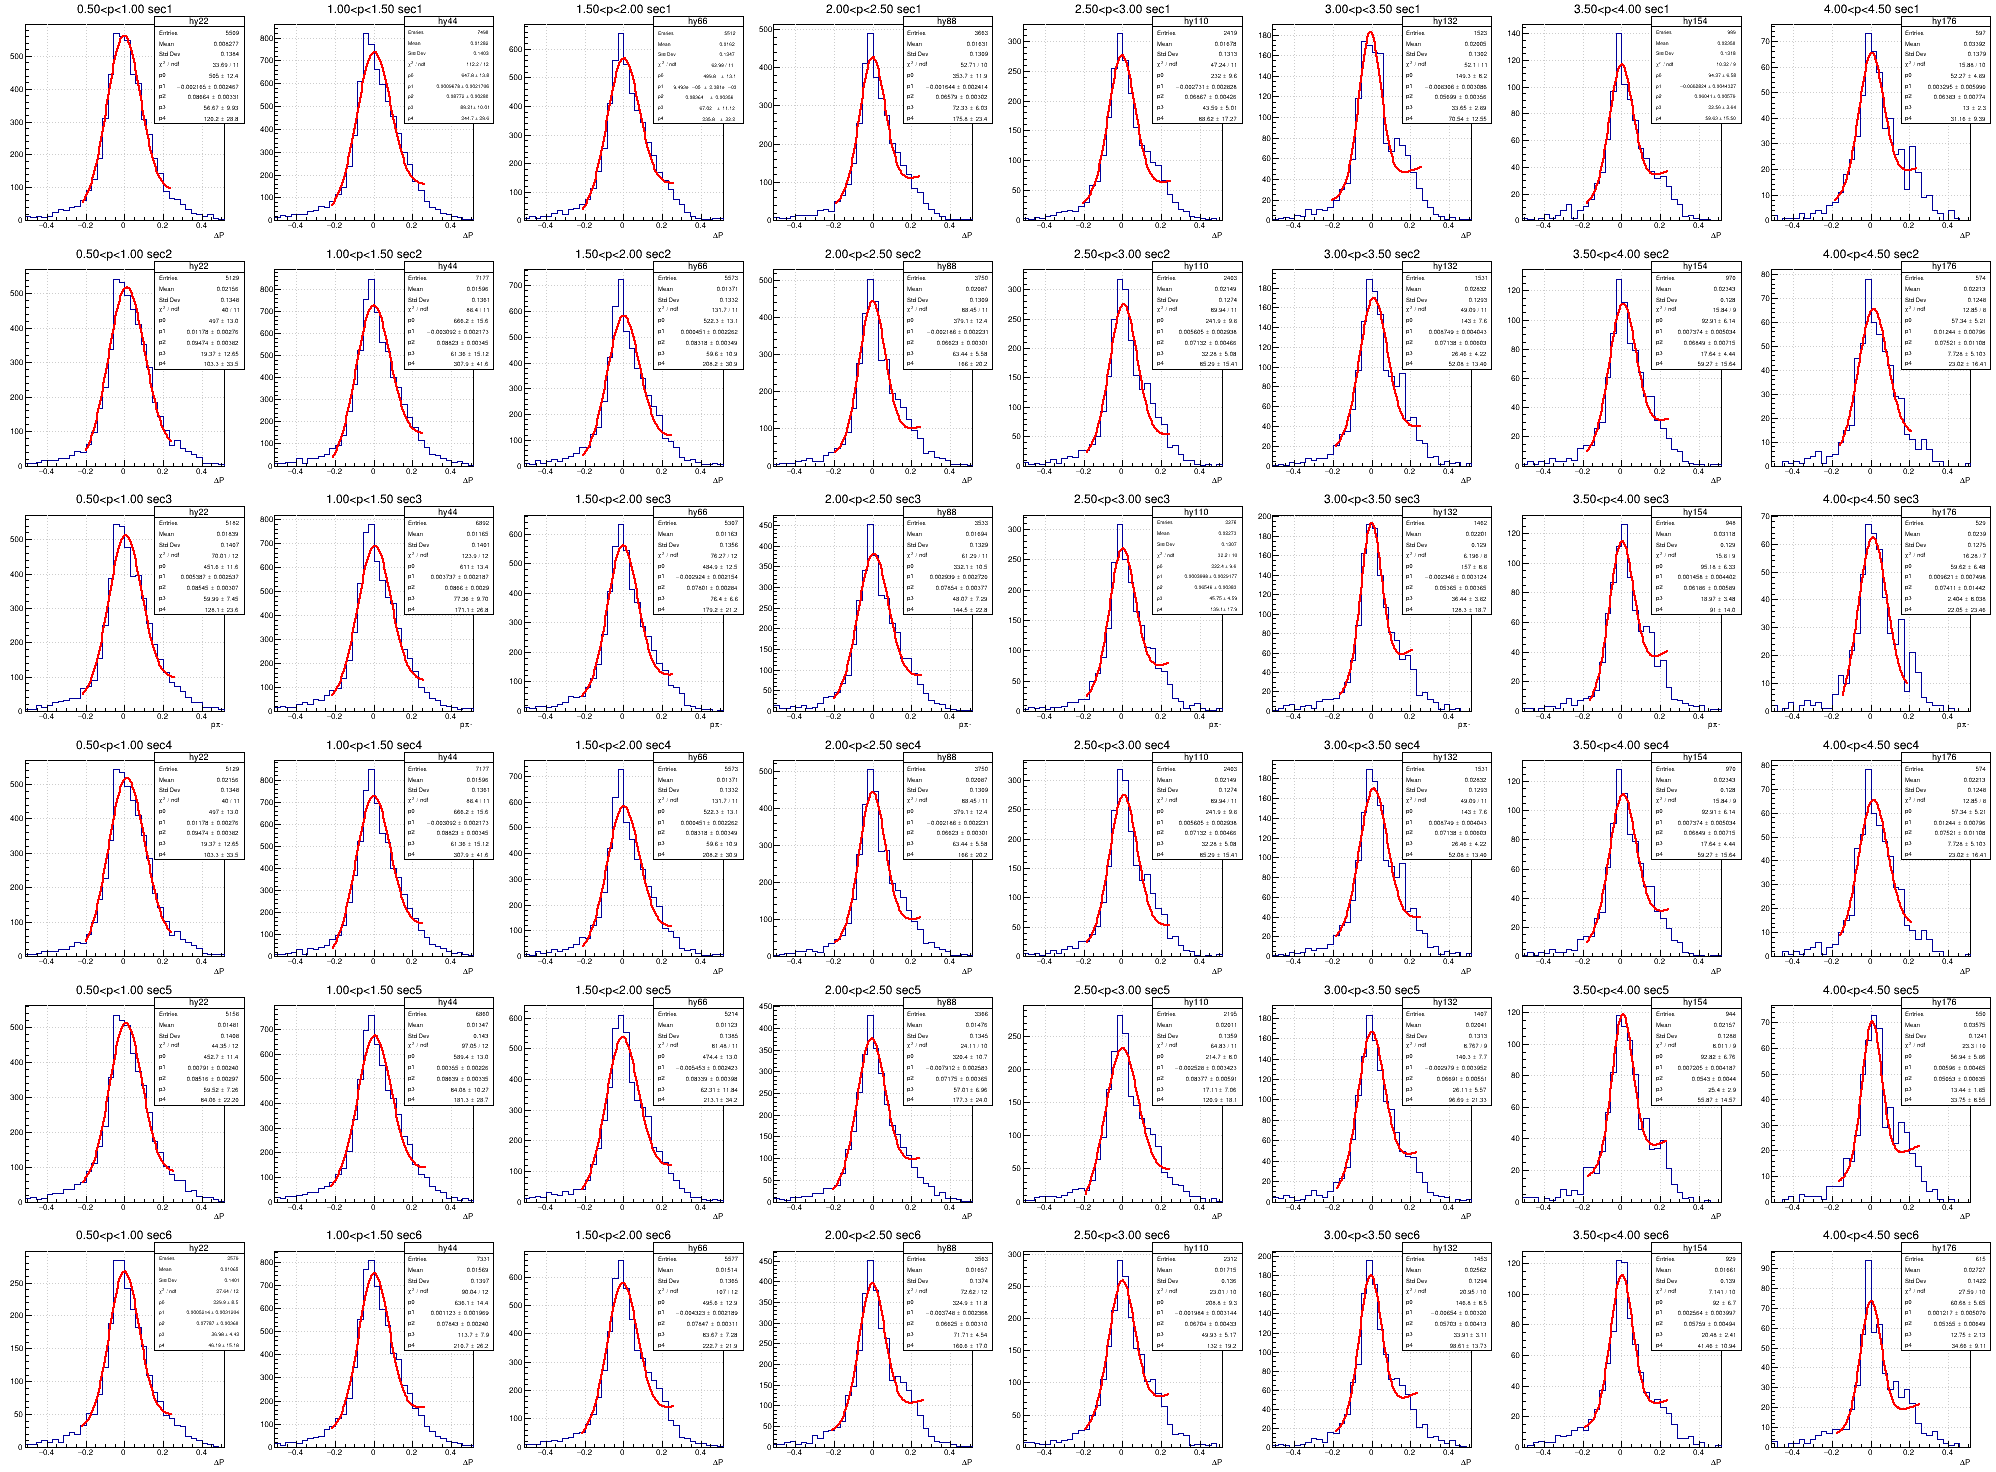

In [17]:
c2 = ROOT.TCanvas("c2","c2",2000,1500)
c2.Divide(8,6,0.0001,0.0001)
c2.Draw()


for i in range(8):
    c2.cd(i+1)
    #dpp11.hys[i].Rebin(2)
    dpp13.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp13.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8+1)
    dpp23.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp23.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*2+1)
    dpp33.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp33.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*3+1)
    dpp43.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp43.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*4+1)
    dpp53.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp53.hys[i].Draw()   
for i in range(8):
    c2.cd(i+8*5+1)
    dpp63.hys[i].GetXaxis().SetRangeUser(-0.5,0.5)
    dpp63.hys[i].Draw()   
    
    
c2.Print("pics/Cont_phi/In_Corr_phi3_1d.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_1.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_1.png


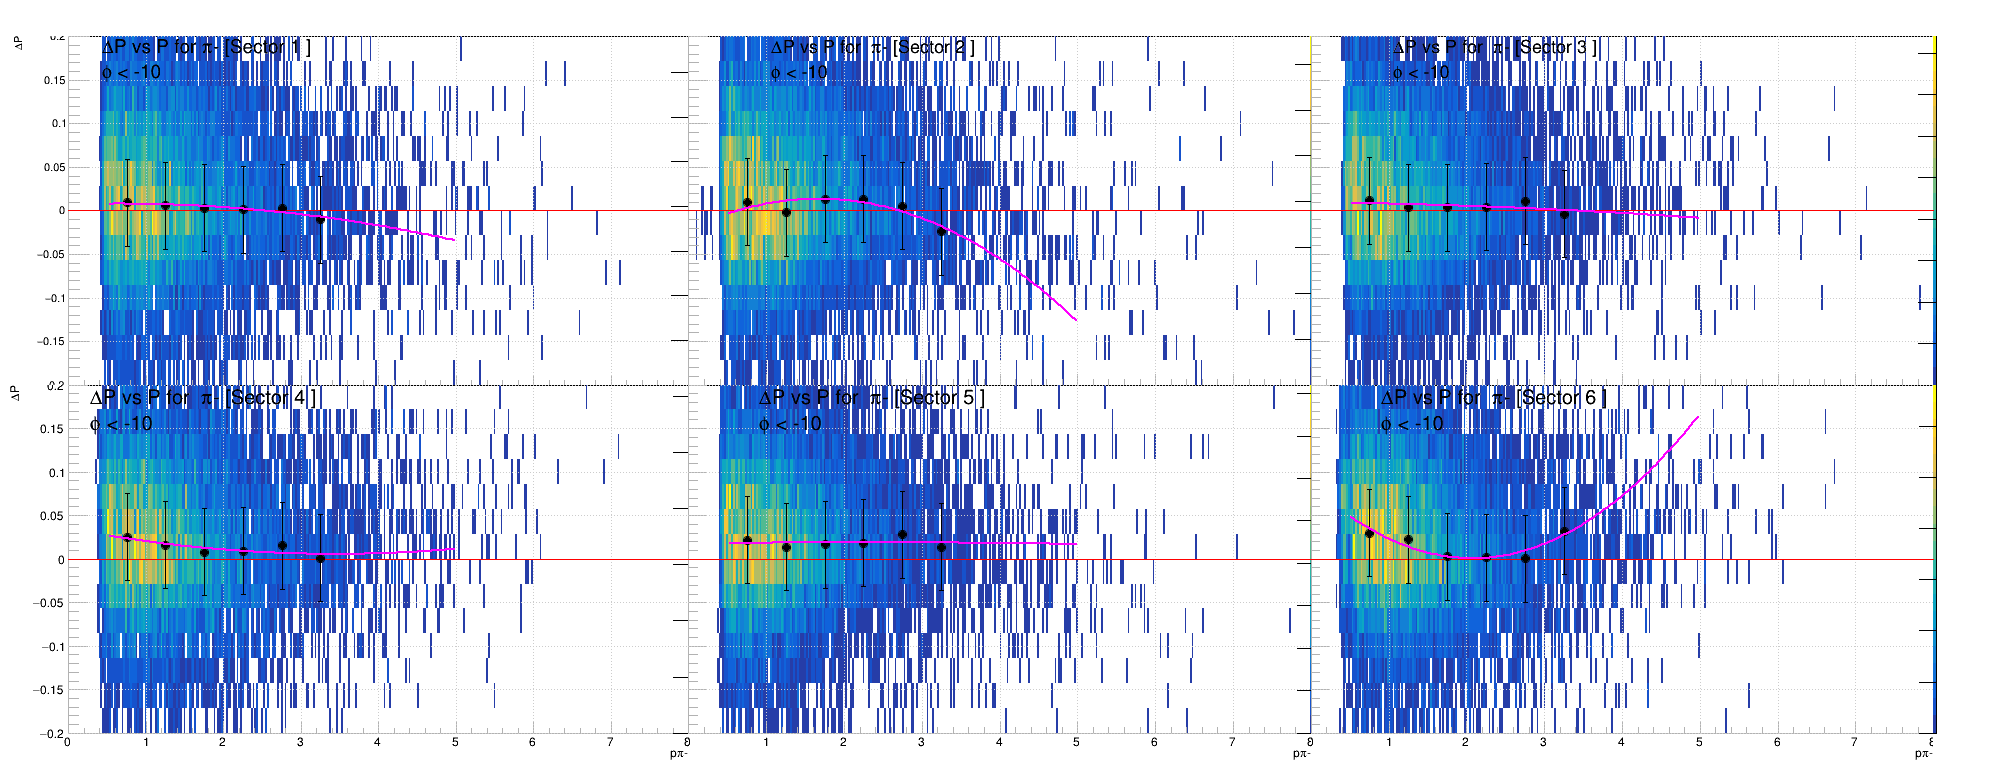

In [14]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
#ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
c1.Draw()
c1.cd(1)
dpp11.Draw("colz")
dpp11.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp11.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp11.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.cd(2)
dpp21.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp21.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp21.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp21.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp31.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp31.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp31.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp31.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp41.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp41.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp41.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp41.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp51.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp51.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp51.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp51.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp61.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp61.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp61.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp61.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)





c1.Print("pics/Cont_phi/phi_dp2d_1.png")

0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_2.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_2.png


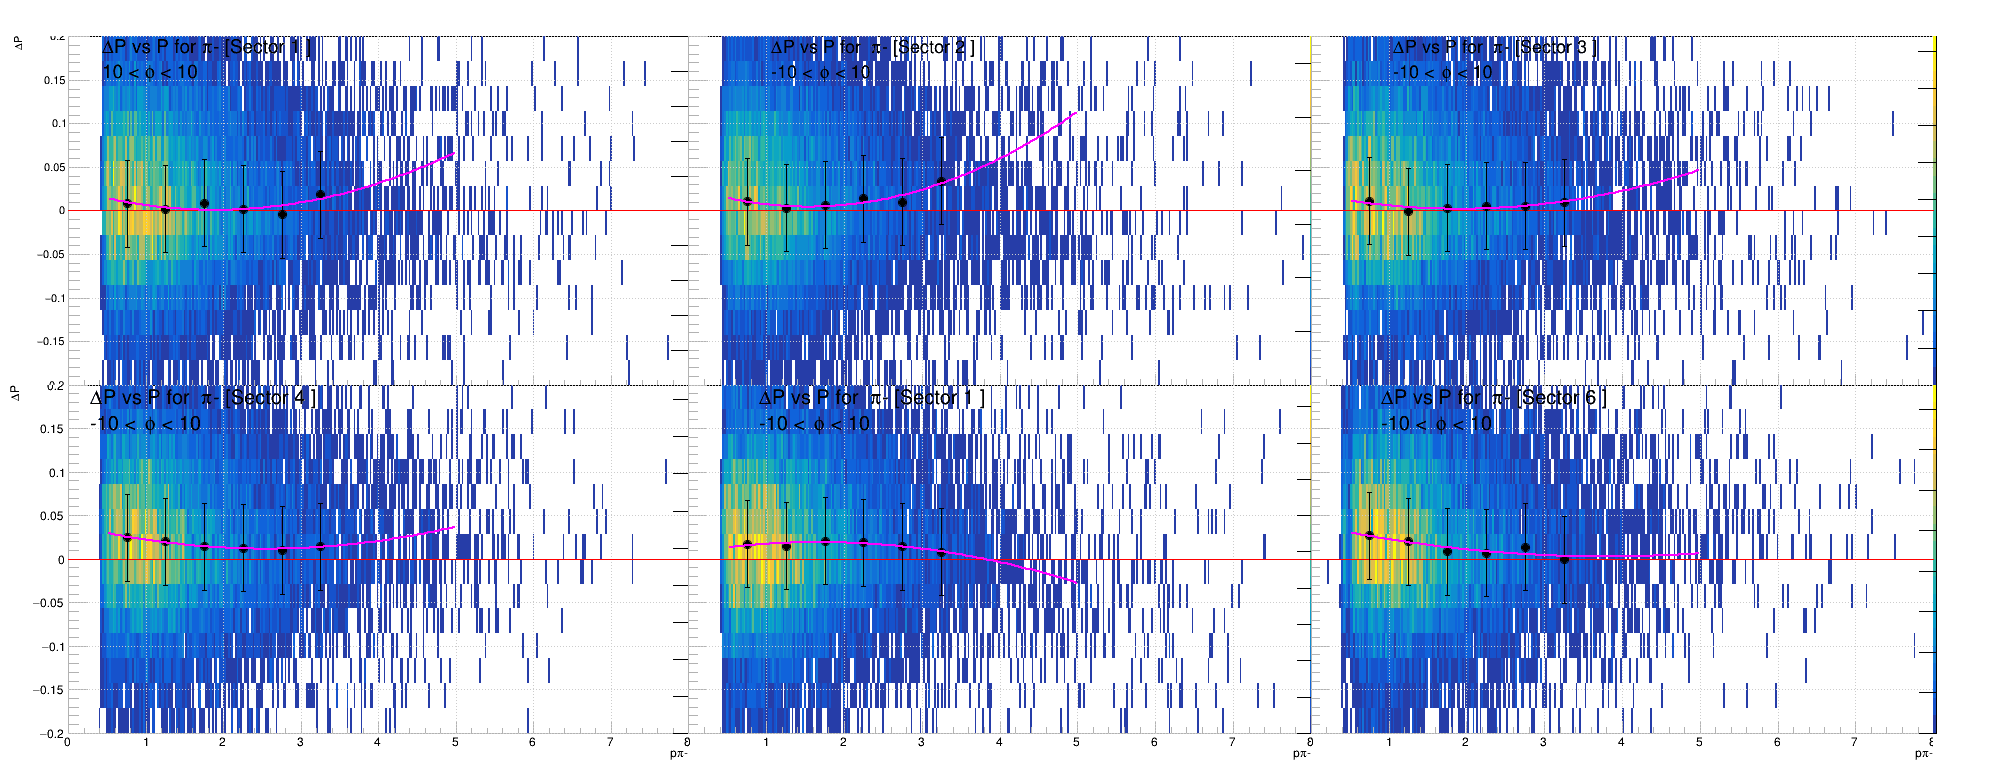

In [15]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp12.Draw("colz")
dpp12.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp12.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp12.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp22.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp22.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp22.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp22.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp32.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp32.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp32.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp32.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(4)
dpp42.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp42.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp42.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp42.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp52.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp52.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp52.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp52.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)

c1.cd(6)
dpp62.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp62.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp62.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp62.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.Print("pics/Cont_phi/phi_dp2d_2.png")


0
1
2
0
1
2
0
1
2
0
1
2
0
1
2
0
1
2


python ERROR: cannot open image file "pics/Cont_phi/phi_dp2d_3.png" for writing. Please check permissions.
Error in <TASImage::WriteImage>: error writing file pics/Cont_phi/phi_dp2d_3.png


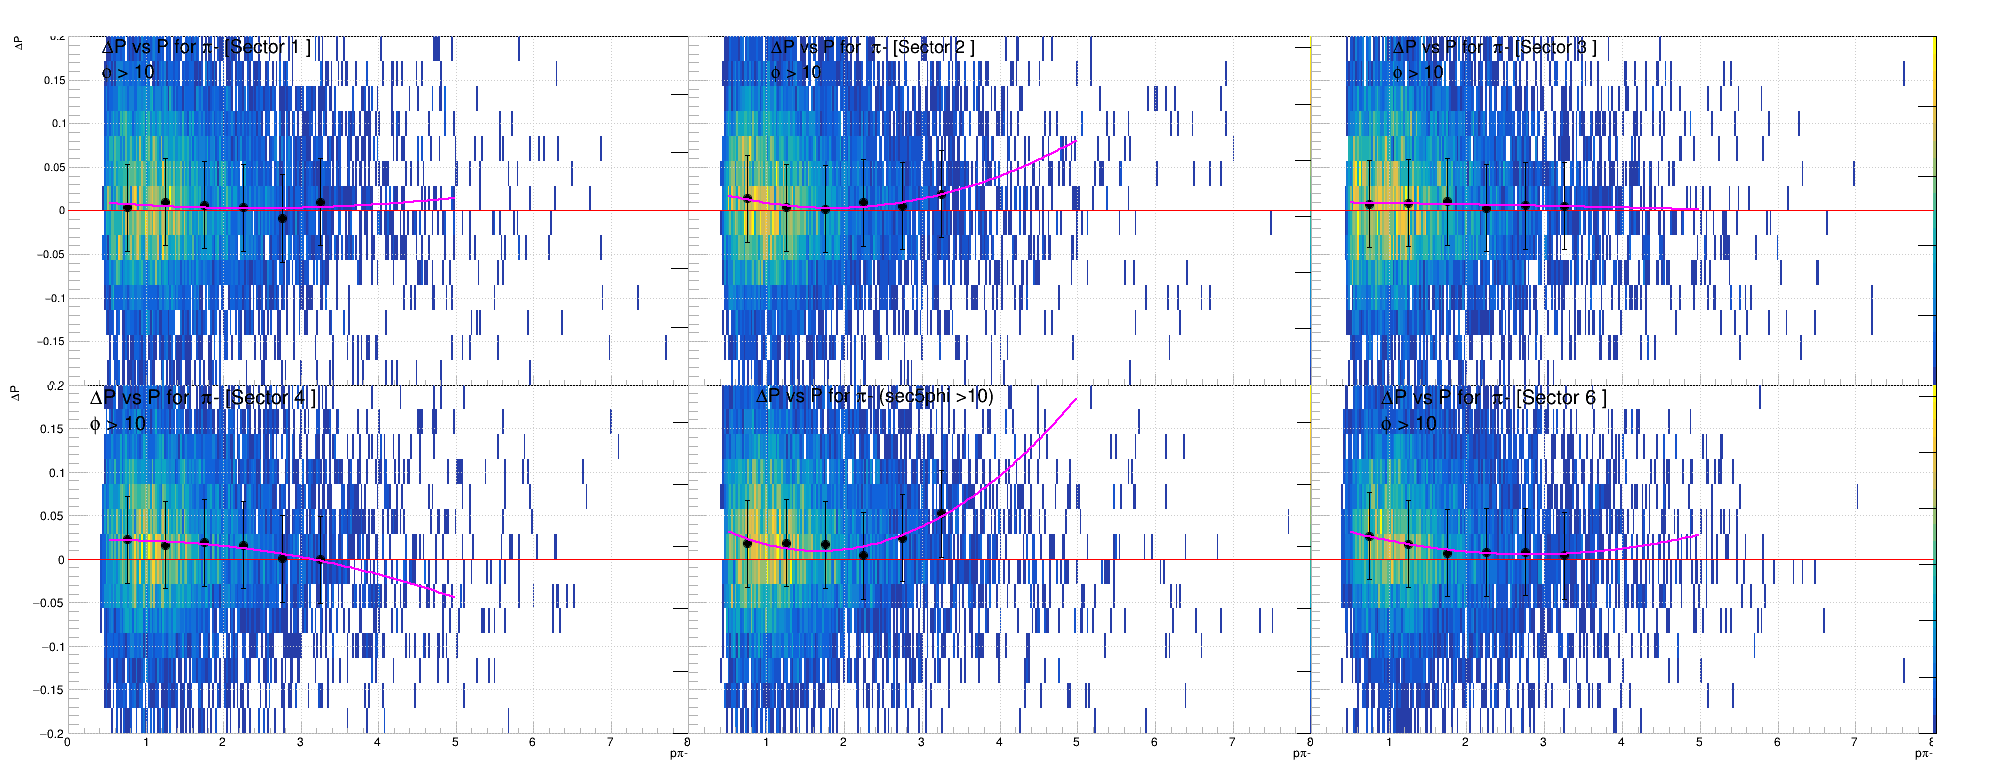

In [16]:
line =  ROOT.TLine(0, 0, 8, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0,0)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)
c1.Draw()
c1.cd(1)
dpp13.Draw("colz")
dpp13.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp11.GetXaxis().SetRangeUser(0,7)

line.SetLineColor(2)
line.Draw("")

dpp13.gr.Draw("P")

for i in range(0,3):
    try:
        palette_histo = dpp13.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)




c1.cd(2)
dpp23.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp21.GetXaxis().SetRangeUser(0,7)
dpp23.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp23.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp23.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)



c1.cd(3)
dpp33.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp31.GetXaxis().SetRangeUser(0,7)
dpp33.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp33.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp33.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(4)
dpp43.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp41.GetXaxis().SetRangeUser(0,7)
dpp43.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp43.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp43.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(5)
dpp53.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp51.GetXaxis().SetRangeUser(0,7)
dpp53.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp53.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp53.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.cd(6)
dpp63.GetYaxis().SetRangeUser(-0.2,0.2)
#dpp61.GetXaxis().SetRangeUser(0,7)
dpp63.Draw("colz")
line.SetLineColor(2)
line.Draw("")
dpp63.gr.Draw("P")
for i in range(0,3):
    try:
        palette_histo = dpp63.GetListOfFunctions().FindObject("palette")
        x_left = 0
        x_right = 0
        y_up = 0
        y_down = 0
        palette_histo.SetX1NDC(0.905 + x_left)
        palette_histo.SetX2NDC(0.925 + x_right)
        palette_histo.SetY1NDC(0.1 + y_down)
        palette_histo.SetY2NDC(0.9 + y_up)
    except:
        print(i)


c1.Print("pics/Cont_phi/phi_dp2d_3.png")



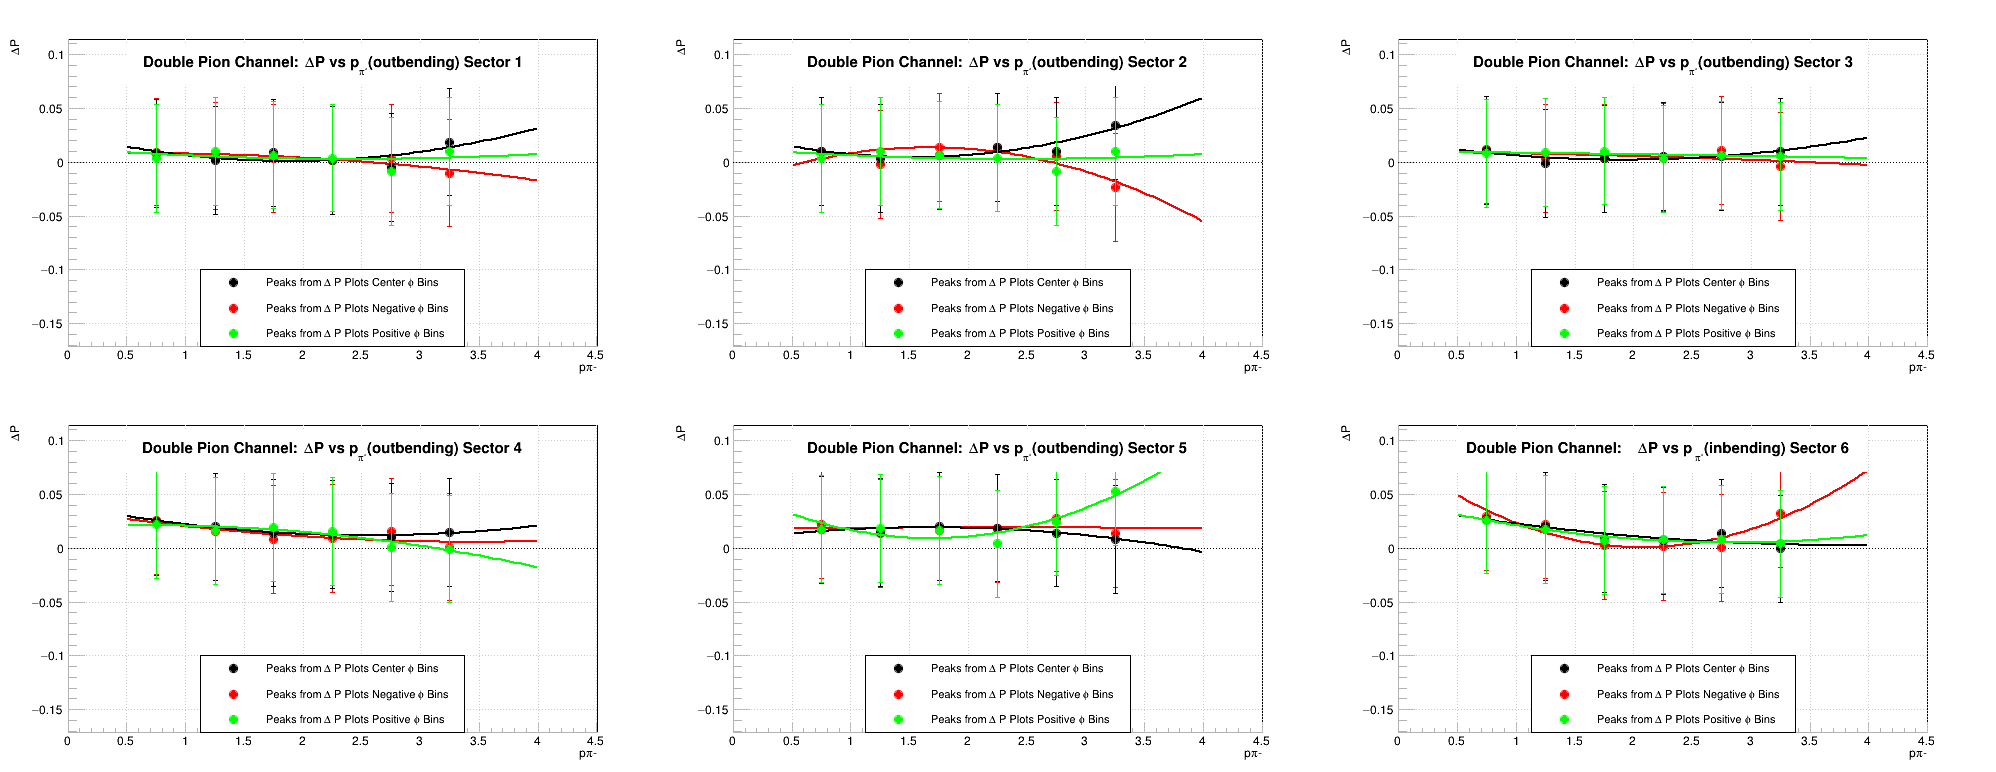

In [4]:
line =  ROOT.TLine(0, 0, 4.5, 0)
c1 = ROOT.TCanvas("c1","c1",2000,800)
c1.Divide(3,2,0.001,0.001)
c1.SetGrid()
ROOT.gStyle.SetAxisColor(16, 'xy')
ROOT.gStyle.SetOptFit(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetStatX(0.3)
ROOT.gStyle.SetStatY(0.35)

ROOT.gStyle.SetTitleY(1)
ROOT.gStyle.SetTitleX(0.3)

legend = ROOT.TLegend(0.3, 0.3, 0.7, 0.1)
legend.SetNColumns(1)
legend.AddEntry(dpp12.gr,"Peaks from #Delta P Plots Center #phi Bins","P")
legend.AddEntry(dpp11.gr,"Peaks from #Delta P Plots Negative #phi Bins","P")
legend.AddEntry(dpp13.gr,"Peaks from #Delta P Plots Positive #phi Bins","P")


c1.Draw()
c1.cd(1)
dpp11.Draw("axis")
dpp11.GetYaxis().SetRangeUser(-0.15,0.1)
dpp11.GetXaxis().SetRangeUser(0,4.5)
dpp11.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")

dpp11.gr.SetMarkerStyle(8)
dpp12.gr.SetMarkerStyle(8)
dpp13.gr.SetMarkerStyle(8)


dpp11.gr.SetMarkerColor(2)
dpp11.gr.SetLineColor(2)
dpp11.gr.Draw("P")

dpp12.gr.SetMarkerColor(1)
dpp12.gr.SetLineColor(1)
dpp12.gr.Draw("P")

dpp13.gr.SetMarkerColor(3)
dpp13.gr.SetLineColor(3)
dpp13.gr.Draw("P")
legend.Draw()

text1 = ROOT.TPaveText(0.5,0.11,4,0.07)
text1.SetBorderSize(0)
text1.SetFillColor(0)
text1.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 1")
text1.Draw()



c1.cd(2)
dpp21.Draw("axis")
dpp21.GetYaxis().SetRangeUser(-0.15,0.1)
dpp21.GetXaxis().SetRangeUser(0,4.5)
dpp21.SetTitle("")



line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp21.gr.SetMarkerColor(2)
dpp21.gr.SetLineColor(2)
dpp21.gr.Draw("P")

dpp22.gr.SetMarkerColor(1)
dpp22.gr.SetLineColor(1)
dpp22.gr.Draw("P")

dpp13.gr.SetMarkerColor(3)
dpp13.gr.SetLineColor(3)
dpp13.gr.Draw("P")
legend.Draw()

text2 = ROOT.TPaveText(0.5,0.11,4,0.07)
text2.SetBorderSize(0)
text2.SetFillColor(0)
text2.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 2")
text2.Draw()


c1.cd(3)
dpp31.Draw("axis")
dpp31.GetYaxis().SetRangeUser(-0.15,0.1)
dpp31.GetXaxis().SetRangeUser(0,4.5)
dpp31.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp31.gr.SetMarkerColor(2)
dpp31.gr.SetLineColor(2)
dpp31.gr.Draw("P")

dpp32.gr.SetMarkerColor(1)
dpp32.gr.SetLineColor(1)
dpp32.gr.Draw("P")

dpp33.gr.SetMarkerColor(3)
dpp33.gr.SetLineColor(3)
dpp33.gr.Draw("P")
legend.Draw()

text3 = ROOT.TPaveText(0.5,0.11,4,0.07)
text3.SetBorderSize(0)
text3.SetFillColor(0)
text3.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 3")
text3.Draw()


c1.cd(4)
dpp41.Draw("axis")
dpp41.GetYaxis().SetRangeUser(-0.15,0.1)
dpp41.GetXaxis().SetRangeUser(0,4.5)
dpp41.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp41.gr.SetMarkerColor(2)
dpp41.gr.SetLineColor(2)
dpp41.gr.Draw("P")

dpp42.gr.SetMarkerColor(1)
dpp42.gr.SetLineColor(1)
dpp42.gr.Draw("P")

dpp43.gr.SetMarkerColor(3)
dpp43.gr.SetLineColor(3)
dpp43.gr.Draw("P")
legend.Draw()

text4 = ROOT.TPaveText(0.5,0.11,4,0.07)
text4.SetBorderSize(0)
text4.SetFillColor(0)
text4.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 4")
text4.Draw()


c1.cd(5)
dpp51.Draw("axis")
dpp51.GetYaxis().SetRangeUser(-0.15,0.1)
dpp51.GetXaxis().SetRangeUser(0,4.5)
dpp51.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp51.gr.SetMarkerColor(2)
dpp51.gr.SetLineColor(2)
dpp51.gr.Draw("P")

dpp52.gr.SetMarkerColor(1)
dpp52.gr.SetLineColor(1)
dpp52.gr.Draw("P")

dpp53.gr.SetMarkerColor(3)
dpp53.gr.SetLineColor(3)
dpp53.gr.Draw("P")
legend.Draw()


text5 = ROOT.TPaveText(0.5,0.11,4,0.07)
text5.SetBorderSize(0)
text5.SetFillColor(0)
text5.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(outbending) Sector 5")
text5.Draw()

c1.cd(6)
dpp61.Draw("axis")
dpp61.GetYaxis().SetRangeUser(-0.15,0.1)
dpp61.GetXaxis().SetRangeUser(0,4.5)
dpp61.SetTitle("")


line.SetLineColor(1)
line.SetLineStyle(3)
line.Draw("")


dpp61.gr.SetMarkerColor(2)
dpp61.gr.SetLineColor(2)
dpp61.gr.Draw("P")

dpp62.gr.SetMarkerColor(1)
dpp62.gr.SetLineColor(1)
dpp62.gr.Draw("P")

dpp63.gr.SetMarkerColor(3)
dpp63.gr.SetLineColor(3)
dpp63.gr.Draw("P")
legend.Draw()

text6 = ROOT.TPaveText(0.5,0.11,4,0.07)
text6.SetBorderSize(0)
text6.SetFillColor(0)
text6.AddText("Double Pion Channel: #DeltaP vs p_{#pi^{-}}(inbending) Sector 6")
text6.Draw()